In [17]:
# Empire AI Automation Setup
# Version: 0.1
#
# Copy and paste this as 1st cell into Your workbook to start making automation notebook
# Use the #Factory# page to create new steps
# More videos and tutorials @link
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)

try:
    test = time.time()
except:
    import pyperclip
    import platform
    import time
    import pyautogui as gui
    import io
    import cv2
    import numpy as np
    import codecs
    import dill
    import re
    import pandas as pd
    import pyarrow.feather as feather
    from ipywidgets import widgets, Image, Output

class step:
    """
    Empire AI step protocol 0.1
    Inputs step('''xxx''', tries=3, timer=1, gate=1, bbox=None)
    Output step.locations (tuples of x,y in screen space)
    
    """
    def __init__(self, payload, tries=3, timer=1, gate=1, bbox=None, kill_on_fail=True):
        self.payloads = dill.loads(codecs.decode(payload.encode(), "base64"))
        self.pattern_img = self.payloads[0]
        self.offset = self.payloads[1]
        self.kill_on_fail = kill_on_fail
        self.version = 0.1
        
        # Try to find the pattern
        for counter in range(tries):
            self._find_()
            # If enough instances have been found break out of the loop and execute next cell
            if len(self.locations) >= gate:
                print("found: "+str(self.locations))
                break
            else:
                time.sleep(timer)
        
        # If the pattern is not found within timeout
        if len(self.locations) < gate:
            pr.style={'bar_color': '#800000'}
            pl.value="[STOPPED] could not find"
            print("EXCEPTION: Gate condition not met!")
            if kill_on_fail:
                pr.style={'bar_color': '#808000'}
                raise Exception("Gate condition not met!")
        
    def _find_(self):
        """
        Find pattern on the screen as many instances as possible
        save all found locations into self.locations with correct click offset
        """
        
        self.locations = []
        locations_found = gui.locateAllOnScreen(self.pattern_img)
        offset = self.payloads[1]
        
        for loc in locations_found:
            self.locations.append((loc.left+offset[0],loc.top+offset[1]))
            
def os_ctrl(short=False):
    """
    Control buton string replacement to be used with pyautogui lib
    in win/linux it is ctrl and osx cmd/command
    """
    if platform.system() == 'Darwin':
        if short:
            return 'cmd'
        else:
            return 'command'
    else:
        return 'ctrl'
    
# Initalize progress bar and show it the notebook is ran standalone
try:
    pr.value = 0
    pr.style={'bar_color': None}
    #pl.value = ""
except:
    pr = widgets.IntProgress(min=0,max=100,layout=widgets.Layout(width='90%'), description="progress: ")
    pl = widgets.Label(description="debug")
    pr.value = 0 
# for cleaness sake lets keep all the return values in one library
r = {}

# right click, create new view for output to have this as progress overview
widgets.VBox([pr,pl])



Next Post

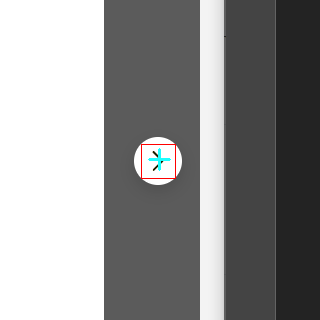

In [18]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVyA0AAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLIksihpROQowNAAD///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v78AAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAAC/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////f398AAAAAAACfn5/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////f398gICCfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLE0sQhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1913, 1124)]


In [19]:
pr.value = 5
pr.description = "progress 5%"

make sure that I have not liked the post yet and get like count

if the hart is read then the outline is not found and the script terminated right here

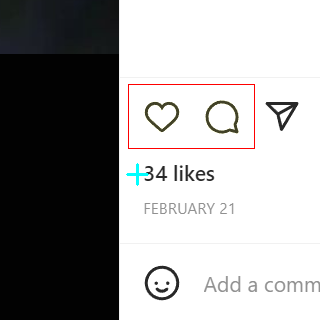

In [22]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVvF4AAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLfktAhpROQoBeAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OTJycmTk5Otra2tra2tra3Jycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OTk5OT////////////////////////////////////////////////k5OTk5OT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUFcXFyTk5PJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5NcXFwmJiYmJiYmJiYmJiZBQUGTk5P///////////////////////+Tk5NcXFwmJiYmJiYmJiZBQUFBQUGTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OR4eHgmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZ4eHjk5OT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P///////+tra0mJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiYmJiYmJiYmJiZBQUFBQUGTk5OTk5N4eHh4eHhcXFwmJiYmJiYmJiYmJiYmJiZBQUGTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiYmJiYmJiYmJiZBQUEmJiYmJiYmJiYmJiYmJiYmJiaTk5Otra0mJiYmJiYmJiYmJiYmJiZBQUEmJiYmJiYmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiZBQUHJycn////////////////////////////k5OStra14eHgmJiYmJiYmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiYmJiZBQUGTk5PJycn////////k5OStra1BQUEmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P////////////k5OStra1BQUEmJiYmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiYmJiZBQUHk5OT////////////////////////////////////////////////k5ORcXFwmJiYmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiZcXFz////////////////////////////k5ORcXFwmJiYmJiYmJiYmJiZcXFz////////////////////////////k5OSTk5MmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////94eHgmJiYmJiYmJiZcXFz///////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8mJiYmJiYmJiZcXFz////////////////////////////////////k5ORBQUEmJiYmJiZBQUH///////////////////////////////////////+Tk5MmJiYmJiZBQUH////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiatra3///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJib////////////////////////////////////////////k5OQmJiYmJibJycn////////////////////////////////////////k5ORBQUEmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiZBQUHk5OT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9BQUEmJiYmJiatra3///////////////////////////////////////////////94eHh4eHj///////////////////////////////////////////////+tra0mJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////////////94eHgmJiYmJiZcXFz////////////////////////////////////////////////////////////////////////////////////k5ORcXFwmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8mJiYmJiYmJibk5OT////////////////////////////////////////////////k5OT////////////////////////////////////////////////////k5OQmJiYmJiYmJib////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJib///////////////////////////////////////////////////////////////////////////////////////////////////////////////9BQUEmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////94eHgmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////9BQUEmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiZcXFz////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////////////9BQUEmJiYmJibk5OT///////////////////////////////////////////////////////////////////////////////////////////////////////8mJiYmJiYmJib////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8mJiYmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////////8mJiYmJiYmJib///////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////94eHgmJiYmJiatra3///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJib///////////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZBQUHJycn////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiatra3////////////////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////////////////////////////94eHgmJiYmJiatra3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORcXFwmJiYmJiZBQUHJycn////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiZcXFz////////////////////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiatra3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiZBQUHJycn////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiZBQUH////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////9BQUEmJiYmJibk5OT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiZBQUGTk5P////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiZBQUHJycn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiYmJib////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiZBQUGTk5P///////////////////////////////////////////////////////+tra0mJiYmJiYmJiZBQUHJycn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiYmJiaTk5P///////////////////////////////////////////////+Tk5MmJiYmJiYmJiZBQUHJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiYmJibk5OT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiYmJiaTk5P///////////////////////////////////////9cXFwmJiYmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJiZBQUH///////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZ4eHj////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiZcXFz///////////////////////////////9cXFwmJiYmJiYmJiZcXFz////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiZBQUH////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiZBQUHk5OT////////////////k5ORcXFwmJiYmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJib///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiZBQUHk5OT////////k5ORBQUEmJiYmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORcXFwmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////9cXFwmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiYmJiZBQUGtra3JyckmJiYmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORcXFwmJiYmJiYmJiZBQUHJycn////////////////////////////////////////////////k5OSTk5Otra3///////////+Tk5MmJiYmJiZ4eHj////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiZBQUEmJiYmJiYmJiZBQUHJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORcXFwmJiYmJiYmJiYmJiZ4eHitra3////////////////////////////////JyclcXFwmJiYmJiYmJiYmJiZBQUF4eHiTk5MmJiYmJiZBQUH////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiYmJiYmJiZBQUHk5OT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiYmJiYmJiZBQUF4eHh4eHiTk5OTk5OTk5NcXFwmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiZ4eHj////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiaTk5NcXFwmJiYmJiYmJiYmJiYmJiYmJiYmJiaTk5P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OStra1cXFwmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P////////////k5OStra14eHhcXFwmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OStra2tra2Tk5N4eHiTk5PJycn////////////////////////////////////////k5OStra3Jycn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLCktbhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)

r['likes'] = -1
# Logic here
i = s.locations[0]                        # to limit the action to 1st found location
gui.click(i, clicks=1, button='left')     # click to start drag
gui.dragRel(xOffset=500,duration=0.2)     # drag 500px to the left NB! Needs 0.2sec to select text
gui.hotkey(os_ctrl(),'c')                 # copy text
#gui.click(i[0]+300,i[1], clicks=1, button='left')       # deselect text to return to normal for next step
try:
    r['likes'] = int(pyperclip.paste())   # convert to number
except:
    r['likes'] = int(re.search(r'\d+', pyperclip.paste()).group())+1 # if the original strig was "digitalsputnik's profile picture\r\nLiked by digitalsputnik and 30 others" re will take the 1st continous int and output that, I added one as one of my friends has liked it before
# add this to stop automation if likes were not found
if r['likes']==-1 and s.kill_on_fail:
    raise Exception("Likes were not found and recovered")
if r['likes']>50 and s.kill_on_fail:
    raise Exception("More than 50 likes")
# print output for debug
print("likes: "+str(r['likes']))          # print output for debug

found: [(1269, 1697)]


Exception: More than 50 likes

In [88]:
pr.value = 10
pr.description = "progress 10%"

Get the address of the current post to be able to come back and post the comment later

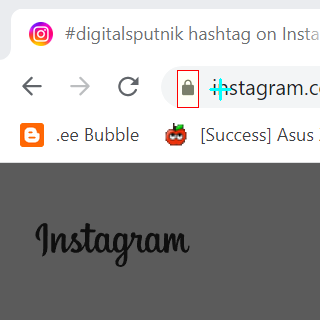

In [6]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVVwkAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLFUslhpROQhsJAADx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Te4OK6vcC6vcDe4OLx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Sws7ZfY2hfY2hfY2hfY2iws7bx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/TMz9FfY2iVmZze4OLe4OKVmZxfY2jMz9Hx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/SVmZxxdXnx8/Tx8/Tx8/Tx8/RobHCeoqTx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/SDhouDhovx8/Tx8/Tx8/Tx8/SDhouDhovx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/TMz9F7foJ7foLMz9HMz9HMz9HMz9F7foJ7foLMz9Hx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/SDhotfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2iEh4vx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/RfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2jx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/SDhotfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2hfY2iDhovx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/TMz9HMz9HMz9HMz9HMz9HMz9HMz9HMz9HMz9HMz9Hx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/Tx8/SUZWJLLEsUhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)

r['weburl'] = -1
# Logic here
i = s.locations[0]                        # to limit the action to 1st found location
gui.click(i, clicks=3, button='left')     # triple click to select the whole address area
gui.hotkey(os_ctrl(),'c')                 # Keypress events
r['weburl'] = pyperclip.paste()           # get the URL from clipboard
# add this to stop automation if likes were not found
if r['weburl']==-1 and s.kill_on_fail:
    raise Exception("URL was not found and recovered")
# print output for debug
print("URL: "+str(r['weburl']))           # print output for debug


found: [(221, 97)]
URL: https://www.instagram.com/p/Co6HO9CScvi/


In [7]:
pr.value = 15
pr.description = "progress 15%"

2 image step

To get to points to copy inbetween we create s as a list and find to steps in a row and use the results to find all the hashtags avaiable in the comments

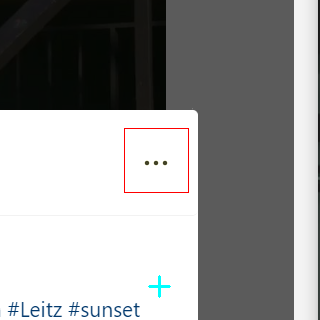
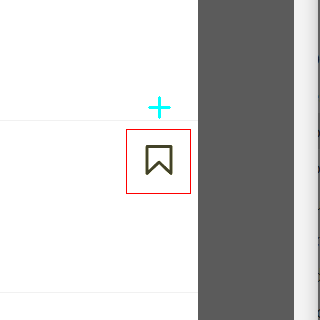

In [8]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = []
s.append(step(
    '''gASVPDAAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLQEtAhpROQgAwAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLJEufhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
))
s.append(step(
    '''gASVPzAAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLQEtAhpROQgAwAAD///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9BQUEmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUHk5OT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P////////////////////////////////////k5OTJycn///////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////94eHgmJiYmJiYmJiYmJiaTk5P///////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////////94eHgmJiYmJiYmJiYmJiYmJiYmJiaTk5P///////////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////////9cXFwmJiYmJiYmJiZcXFyTk5MmJiYmJiYmJiZ4eHj///////////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////////9cXFwmJiYmJiYmJiZcXFz////k5OSTk5MmJiYmJiYmJiZ4eHj///////////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////////9cXFwmJiYmJiYmJiZ4eHj///////////////+Tk5MmJiYmJiYmJiZBQUH///////////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5P///////9cXFwmJiYmJiYmJiZ4eHj///////////////////////+Tk5MmJiYmJiYmJiZBQUH///////+Tk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiaTk5Pk5ORcXFwmJiYmJiYmJiaTk5P///////////////////////////////+Tk5MmJiYmJiYmJiZBQUHk5OSTk5MmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiZ4eHhcXFwmJiYmJiYmJiatra3///////////////////////////////////////+Tk5MmJiYmJiYmJiZBQUF4eHgmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiYmJiYmJibJycn///////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiYmJibJycn///////////////////////////////////////////////////////+tra0mJiYmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////JyckmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJibJycn////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJiatra3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5ORcXFxBQUHJycn////////////////////////////////////////////////////////////////////////////////k5ORcXFxBQUHk5OT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLIkrr////hpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
))
# Logic here
r['hashtags'] = -1
gui.click(s[0].locations[0], clicks=1, button='left')
gui.dragTo(s[1].locations[0][0],s[1].locations[0][1],.4)
gui.hotkey(os_ctrl(),'c')
gui.click(s[1].locations[0], clicks=1, button='left')       # deselect text to return to normal for next step
r['hashtags'] = pyperclip.paste()
# nice way to get hashtags from any string
temp = list({tag.strip("#") for tag in r['hashtags'].split() if tag.startswith("#")})
r['hashtags'] = ', '.join(temp)
# add this to stop automation if likes were not found
if r['hashtags']==-1 and (s[0].kill_on_fail or s[1].kill_on_fail):
    raise Exception("Hashtags waere not found and recovered")
# print output for debug
print("Found hashtags: "+r['hashtags'])               # print output for debug

found: [(1819, 730)]
found: [(1819, 1451)]
Found hashtags: lightingdesign, digitalsputnik, musician, japan, korea, directorofphotography


In [92]:
pr.value = 25
pr.description = "progress 25%"

collect image

* get 3 points to get rough area of the image
* save it in the working directory as temp.png

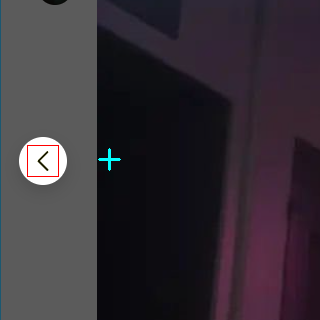
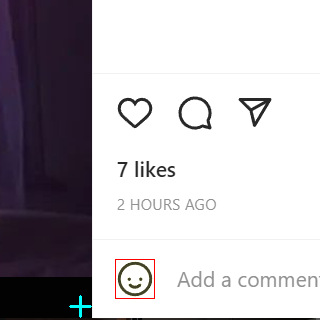
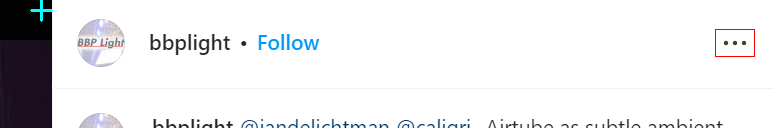

found: [(108, 1124)]
found: [(1239, 1697)]
found: [(1122, 574)]


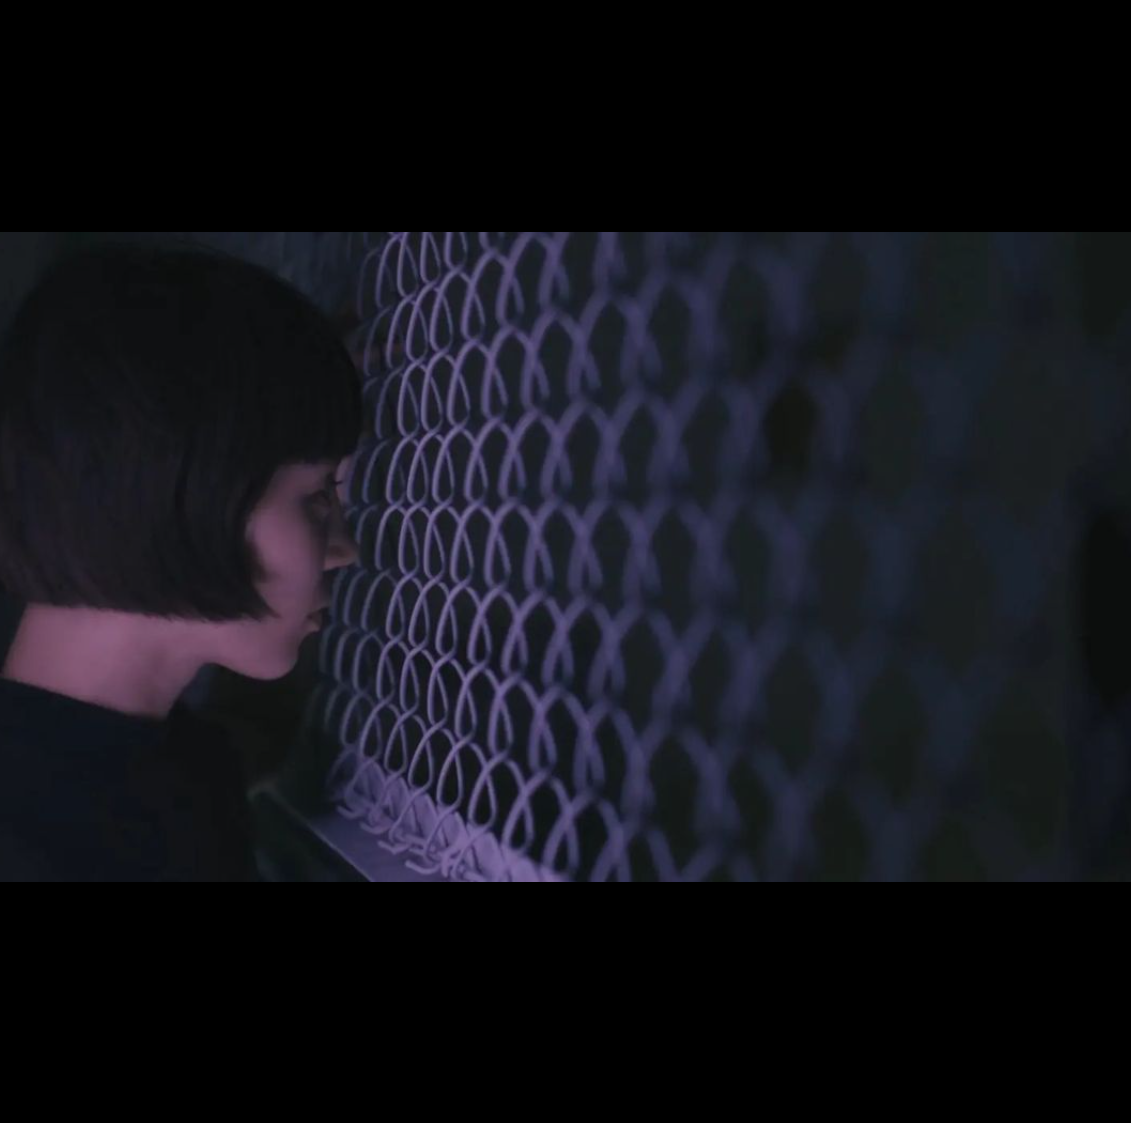

In [9]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = []
s.append(step(
    '''gASVfwsAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLH0sfhpROQkMLAAD///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58gICDf39////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAAC/v7////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACfn5/////////////////////////////////////////////////////////////////////////////////////////////////////////f398AAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////+fn58AAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACAgID///////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAAAAAAAACfn5////////////////////////////////////////////////////////////////////////////////////////////////////////////////+AgIAgICC/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLU0sPhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
))
x1 = s[-1].locations[0][0]
s.append(step(
    '''gASVEhIAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLJ0snhpROQtMRAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OTk5OTJycnk5OT////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////JycmTk5NBQUEmJiYmJiYmJiYmJiYmJiYmJiZBQUF4eHjJycn///////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P///////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUFBQUFcXFxBQUEmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P///////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiZBQUGTk5PJycn////////////////////k5OTJycmTk5NBQUEmJiYmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////9cXFwmJiYmJiYmJiZBQUGTk5P////////////////////////////////////////////k5OSTk5NBQUEmJiYmJiYmJiZBQUHk5OT///////////////////////////////////////////////////9cXFwmJiYmJiYmJiZcXFz////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiZcXFz///////////////////////////////////////////////94eHgmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiaTk5P////////////////////////////////////////JyckmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiatra3///////////////////////////////////9BQUEmJiYmJiZcXFz///////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiZBQUH///////////////////////////////+tra0mJiYmJiYmJib////////////////////////////////////////////////////////////////////////////////////////////k5ORBQUEmJiYmJiatra3///////////////////////////9BQUEmJiYmJiatra3///////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiZBQUH///////////////////////+tra0mJiYmJiYmJib////////////////////////////////////////////////////////////////////////////////////////////////////k5ORcXFwmJiYmJibJycn///////////////////94eHgmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiZ4eHj///////////////////9BQUEmJiYmJibJycn////////////////////////////////////////////////////////////////////////////////////////////////////////JyckmJiYmJiZBQUH///////////////////8mJiYmJiYmJib////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OQmJiYmJiYmJib////////////////k5OQmJiYmJiZBQUH////////////////////////////k5OStra3////////////////////////////////////k5OSTk5PJycn///////////////////////////9BQUEmJiYmJibk5OT////////////JyckmJiYmJiZcXFz////////////////////////JyckmJiYmJiZcXFz///////////////////////////////9cXFwmJiYmJibJycn///////////////////////9cXFwmJiYmJibJycn////////////JyckmJiYmJiZcXFz///////////////////////+tra0mJiYmJiZBQUH///////////////////////////////9cXFwmJiYmJiatra3///////////////////////9BQUEmJiYmJibk5OT////////////k5OQmJiYmJiZBQUH////////////////////////k5OR4eHhBQUHJycn///////////////////////////////+tra1BQUFcXFz///////////////////////////9BQUEmJiYmJibk5OT///////////////8mJiYmJiYmJib///////////////////////////////////////////////////////////////////////////////////////////////////////////////8mJiYmJiYmJib///////////////////9cXFwmJiYmJibJycn///////////////////////////////////////////////////////////////////////////////////////////////////////+tra0mJiYmJiYmJib///////////////////+Tk5MmJiYmJiaTk5P////////////////////////////k5OStra3////////////////////////////////k5OTJycn///////////////////////////94eHgmJiYmJiZ4eHj////////////////////JyckmJiYmJiZBQUH////////////////////////JyckmJiYmJiZcXFzk5OT////////////////k5ORcXFwmJiZBQUHJycn///////////////////////9BQUEmJiYmJiatra3////////////////////k5ORBQUEmJiYmJiatra3////////////////////JyckmJiYmJiYmJiZBQUF4eHitra2Tk5OTk5MmJiYmJiYmJiYmJibk5OT///////////////////+tra0mJiYmJiYmJib///////////////////////////+tra0mJiYmJiZBQUH///////////////////////+Tk5MmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZ4eHj///////////////////////9BQUEmJiYmJiatra3////////////////////////////k5ORBQUEmJiYmJiZ4eHj///////////////////////+tra1BQUEmJiYmJiYmJiYmJiYmJiYmJiZBQUHJycn///////////////////////9cXFwmJiYmJiYmJib///////////////////////////////////+tra0mJiYmJiYmJiaTk5P////////////////////////k5OStra14eHh4eHhcXFyTk5Otra3///////////////////////////+Tk5MmJiYmJiYmJibJycn///////////////////////////////////////+Tk5MmJiYmJiZBQUGTk5P///////////////////////////////////////////////////////////////////////+Tk5MmJiYmJiYmJiaTk5P////////////////////////////////////////////k5ORcXFwmJiYmJiYmJiaTk5P///////////////////////////////////////////////////////////////9cXFwmJiYmJiYmJiZcXFz////////////////////////////////////////////////////k5OR4eHgmJiYmJiYmJiZBQUGTk5P///////////////////////////////////////////////+Tk5MmJiYmJiYmJiYmJiZcXFz////////////////////////////////////////////////////////////k5OSTk5MmJiYmJiYmJiYmJiZBQUF4eHjJycn////////////////////////k5OSTk5NBQUEmJiYmJiYmJiYmJiZ4eHj///////////////////////////////////////////////////////////////////////+Tk5NBQUEmJiYmJiYmJiYmJiYmJiZBQUFBQUFcXFxcXFxBQUEmJiYmJiYmJiYmJiYmJiYmJiZBQUGtra3////////////////////////////////////////////////////////////////////////////////k5OSTk5NBQUEmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5P////////////////////////////////////////////////////////////////////////////////////////////////k5OTJycl4eHhcXFwmJiYmJiYmJiYmJiYmJiYmJiZBQUGTk5PJycn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////k5OTk5OTJycnJycnk5OT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJK3v///0swhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
))
comp = s[-1].locations[0]
s.append(step(
    '''gASVmQwAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLJ0sbhpROQlcMAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT///////////////////////////////////////////////////////////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f////////////////////////////////////////////////////////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT////////////////////////////////////////////////////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT////////////U1NQmJiYmJiYmJiYmJibU1NT///////////////////////////////////////////////////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f///////////////////93d3cmJiYmJiZ3d3f////////////////////////////////////////////////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT////////////////////////////U1NTU1NT///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJKX/3//0ru////hpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
))
y1 = s[-1].locations[0][1]
width = comp[0]-x1
height = comp[1]-y1

gui.screenshot('temp.png',region=(x1,y1,width,height))

In [38]:
pr.value = 40
pr.description = "progress 40%"

Goto stable diffusion window

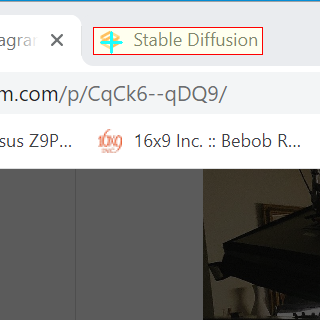

In [10]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
try:
    # If the Jupyter is active then You are running the script step by step in workflow file, 
    # therefore px will not be initalized and we dont have to wait full second to try the alternative image
    test = px
    
    # Step image if the Chrome is active
    s = step(
        '''gASVRBYAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLKEsvhpROQggWAADe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4OXe4ebe4ebe4eXe4eXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebe4ebf2tfg3dve4ebe4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4ebe4ebf2tjkxKfrpmXwvY7m0b/g3N3e4ebe4ebe4eXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebe4ebe4OTjxqzrrHH2p1zwpFz2v4v8xZHww5vm0sHe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4eXe4ebd4OXizLrorXXroFj2qF3wo1rqp2nvv5L2wIz9xpHyvYrsw5zk1crd4OXe4ebe4eXe4OTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebh0sfptYPto1vzplv5qV7tqGfmu5Le2dTe3uDoyrD0w5f8xI/7w4/yvYvtyKXj18/e4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebf1tDmuY/rolv3qF72p13qolznuY7h1Mre4ebe4ebe4ebe4ebg2dfpyq7yvoz8xZD9xZDxvo3rzK/g2NTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebmwZ//r2Prn1fso1/os4LgzsDe4ebe4ebizLrpr3vtw5zk1sre4ebe4ebi2M/tyanzwZPwuIT/vHbmwqDe4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebmvpjxpmDwqWXrwZrf3t3e4ebg0sbpt4jsoVnzpl34wYzxvYzsyani2NHe4ebf2tfqvJLtpF/xpV7nv5re4ebe4OTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OXe4eblxKf/v3/xvIn7x5XsvZDnupLroVz1plzxo1ruolvzvYn4wo77xZLwu4jmvpjoqW70plzqn1f/rmLlwqPe4ebe4OTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe3uHl1snvvY7xsXLupF73qF3rn1nwpFzpr3rg08nh29fsx6PxtXvtpmT2qF7toFfuo1rppWbjx7De3N3e4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe3N3ix7DppWbuo1rtoFf2qF7tpmP1uH3txaHh29jf1MrosX3wpFzroFn2p13vpV/ysXPuvY7m18re3uHe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4eblwqP/rmLqn1f0plzpqW7nvpfvuYb7xJH4wo7zvYnuolzypFv1plzqn1nluY/tvpP6xpTyvIr/v3/lxKfe4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebnvpnxpV7wpmDqvJLe2dbe4ebi19Hrx6fyvYz4wYzypV3soFrotofg0cXe4ebf3t/qwJrwqWXypl/nvpne4ebe4OTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebmwaH/vHfxuITywZLtyafi1s3e4ebe4ebk18rswpvornjjzLre4ebe4ebgz8HptILspF/rn1f/r2LlwJ/e4ebe4OTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebg2tbpzK7xvYz9xZD8xZDwvo3ry63h2tfe4ebe4ebe4ebe4ebg1s7muY7ro132p133qF3rolvluY7f2NLe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebj18/tx6TyvYv7w4//x5Lzw5bpzLDf3uDe29vnu5LtqWn5qV70plzto1vptYTg0cbe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4eXe4ebd4OXk1crtw5zxvIr9xpH2wY3vv5Prp2nwo1r3qF3roFnprHTizLrd4OXe4ebe4eXe4eXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXm0sDvwpr8xZD2v4vxpFz2p1zsrHHjxqze4OTe4ebe4ebe4OTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4ebe4ebf3Nzn0r/vvI3qpWTkxKfe2tfe4ebe4ebe4eXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd3+Te4ebe4ebg3dvf2tfe4ebe4ebd3+Pe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4OXe4ebe4ebe4OXe4eXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eaUZWJLSUsahpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    ) 
except:
    # Step image if Jupyter is active
    s = step(
        '''gASVtTUAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLqUsbhpROQnk1AADo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6ezo6u3o6u3o6uzo6uzo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3o6u3o4t3p5eHo6u3o6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6u3o6u3o497qyavsp2Xxvo7s1sPp5ePo6u3o6u3o6uzo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3o6u3o6evpy7DsrnL2p1zwpFz2v4v8xZHxxZzs18Xo6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2/km1mam1mapW/6u3o6u3o6tmrfm1mam1mfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6uzo6u3n6ezp0r7rr3froFj2qF3wo1rrqGnwwJL2wIz9xpHyvYrvxZ7r287n6ezo6u3o6uzo6evo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmam1mam1mam1mam1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmam1mam1mam1mam1mam1mam2Owu3o6u3o6u3o6u3o6u3o6u2/km1mfrHT6u3o6u3o6u2/km1mfrHT6u3o6u3o6u3o6tmrfm1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3p2c3suIXto1vzplv5qV7uqWjrvpXn4dvo5+fszrP1xJf8xI/7w4/yvYvwyqfq3tTo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6tmrfm1mfrHT6u3o6u3o6u3o1rF6ksXo6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o1rF6am1mapW/6u3o6u3o6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n3tbqvZLrolv3qF72p13rolzqvJDp3NDo6u3o6u3o6u3o6u3o4d3tzrHyvoz8xZD9xZDxvo3v0LLo4Nro6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6tmrfm1mfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3rxaL/r2Prn1fso1/rtoTo1cXo6u3o6u3p0r/rsXzvxZ3r3M/o6u3o6u3q3tXxzKvzwZPwuIT/vHbrxqPo6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3qwpvyp2DwqWXuxJzo5uPo6u3o2czsuorsoVnzpl34wYzxvYzvzKvq39fo6u3o4t3tv5TtpF/ypl7rw53o6u3o6evo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am16rtno6u3o6u3o6u3o6u3o6u3o1rF6am1mam1mam1mam1maoGr1u3o6u3owpVmam1mam1mam1mam2Owu3o6u3o6u3o6u2/km1mksXo1rF6am1mam1mam1mfrHT6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o1rF6am1mam1mam1mfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6sWOam16rtno6u3o6u2/km1mfrHT6u3TroFmam1mam1mam1mam16rtm/km1mam1mam1mam1mam2Owu3TroFmapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3owpVmam1mam1mam1mapW/6u3o6u3TroFmapW/6u3o6u3o6u3o6u3owpVmam1mam1mam1maoGr1u3o6u3o6u3o6u3TroFmfrHT6sWOam1mam1mam1mksXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6ezo6u3qyar/v3/xvIn7x5Xuv5HrvpXroVz1plzxo1ruolvzvYn4wo77xZLwu4jqwZrpq2/0plzqn1f/rmLqx6bo6u3o6evo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmam1mapW/6u3o6u3o6u3o6u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6tmrfpW/6u3o6u3o6u3TroFmaoGr1u3o6u3o6u2/km1mfoF6frHT6u3o6u3o6sWOam1mfrHT6u3o6u3o1rF6am2Owu3o6u3o6u3owpVmam2Owu3o6u3o6tmrfm1mfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6tmrfm1mksXo6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3owpVmaoGr1u3o6u3o6u2/kpW/6u3o6u3TroFmapW/6u3o6u3o6u2/km1maoGr1u3o6u3o6u3TroFmam2Owu3o6u3o6u3TroFmam1mapW/6u3o6u3o1rF6am16rtno6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o5+jr283wvo/xsXLupF73qF3rn1nwpFzssXzo28/q4t3vyaXxtXvtpmT2qF7toFfuo1rqpmfpzLTo5eTo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am1mam1mapW/6u3o6u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6sWOam2Owu3o6u3o6u2/km1mapW/6u3o6u3o6u3o6u3o1rF6am2Owu3o6u3o1rF6am2Owu3o6u3o6tmrfm1mksXo6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6tmrfm1mksXo6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o1rF6aoGr1u3o6u3o6u3o6u3o6u2/km1mfrHT6u3o6u3TroFmaoGr1u3o6u3o6u3o6u2/km1mfrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o5eTozLTqpmfuo1rtoFf2qF7tpmP1uH3vyKPq4t7o29DrtH7wpFzroFn2p13vpV/ysXPvvo/s3M7o5+jo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o1rF6am1maoGr1u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3o1rF6am1mam1mam1mam16rtno6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6sWOam16rtno6u3o1rF6am2Owu3o6u3o1rF6aoGr1u3o6u3o6u3o6u3o6sWOam16rtno6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6tmrfm1mksXo6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3owpVmam1mksXo6u3o6u3o6u3o6u3o6u3TroFmapW/6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3TroFmfrHT6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3qx6b/rmLqn1f0plzqq2/rwZrvuYb7xJH4wo7zvYnuolzypFv1plzqn1npvJHvwJX6xpTyvIr/v3/qyaro6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6tmrfm1mfrHT6u3o6u3TroFmfrHT6u3o6u3o6u3o6sWOam1maoGr1u3o6u3o6sWOam16rtno6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6sWOam16rtno6u3o1rF6am2Owu3o6u3owpVmam1mam1mam1mam1mam1mam1mam16rtno6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3o6sWOam2Owu3o6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o1rF6am1mam1mapW/6u3o6u3o6u3TroFmapW/6u3o6u2/km1mfrHT6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3TroFmfrHT6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3rwpzypl7wpmDtv5Tn4dzo6u3q3tfvyqnyvYz4wYzypV3soFrsuYno2Mvo6u3p5uXtw5zwqWXzp1/rwpzo6u3o6evo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3TroFmfrHT6u3o6u3o6u2/km1mfrHT6u3o6u3o6u3o6sWOam16rtno6u3o6u2/km1mksXo6u3o6u3o6u3o6u3o6sWOam2Owu3o6u3o1rF6am2Owu3o6u3o1rF6aoGr1u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6u3owpVmapW/6u3o6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3owpVmapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o6tmrfm1maoGr1u3o6u3TroFmapW/6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3TroFmfrHT6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3rxqT/vHfxuITywZLwzKrq3dLo6u3o6u3r3c/uxJzqsHnq0r/o6u3o6u3o1sbst4TspF/rn1f/r2LqxaLo6u3o6evo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmapW/6u3o6u3TroFmfrHT6u3o6u3o6u2/km1mfrHT6u3o6u3o6u3owpVmam16rtno6u3o6u2/km1mapW/6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o1rF6am2Owu3o6u3o6sWOam16rtno6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u3o1rF6am16rtno6u3o6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u2/km1maoGr1u3o6u3o6u3o6u3o6u3o6u3o6sWOam2Owu3o6u3TroFmapW/6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3o6u2/km1mfrHT6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3p4tztz7HxvYz9xZD8xZDxvo3vzq/p4t3o6u3o6u3o6u3o6u3o3tTqvJDso132p133qF3rolvpvJHo4Njo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroF6rtno6u3o6u3o6u3o1rF6am16rtno6u3o6u3owpVmaoGr1u3o6u3o6u3TroFmaoGr1u3o6u3o6sWOam1mam16rtno6u3o6u2/km1mam1mksXo6u3o6u3o1rF6am1mksXo6u3o6u3o1rF6am2Owu3o6u3o6u3TroFmam2Owu3o6u3o6u3o6tmrkrHT6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmaoGr1u3o6u3o6u3o6u3TroFmam16rtno6u3o6u3o6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6sWOam1mfrHT6u3o6u3owpVmam1maoGr1u3o6u3TrpWr1u3o6u3o6u3owpVmaoGr1u3o6u3TroFmapW/6u3o6u3o6u2/km1maoGr1u3o6u3o6u3TroFmaoGr1u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3q3tTwyabyvYv7w4//x5L0xJbuz7Po5+fn4+LrvpXuqmn5qV70plzto1vsuIbo2Mzo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3TroFmam1mam1mam1mam1mam2Owu3o6u3o6u3o6u3o6tmrfm1mam1maoGr1u3o6u2/km1mam1mam1mapW/6sWOam16rtno6u3o6u2/km1mksXTroFmam1mam1mam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3owpVmam1mam1mam1mam2Owu3o6u3o6u3o6u3o6u3o6u3o6u3o6u3owpVmam1mam1mam1mam1mam1mfrHT6u3o6u3o6u3o6u3o6u3o6u2/km1mfrHT6u3o6u3o6sWOam16rtno6u3o6u3o6u3o1rF6am2Owu3o6u3o6u3o6u3o1rF6am1mam1mam1mksXowpVmaoGr1u3o6u3TroFmam1mam1mam1maoGr1u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3TroFmam1mam1mam1mapW/6u3o6u3o6u3o6u3TroFmfrHT6u3o6u3o6u3o6u3TroFmapW/6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6uzo6u3n6ezr287vxZ7xvIr9xpH2wY3wwJPsqGnwo1r3qF3roFnrrnbp0r7n6ezo6u3o6uzo6uzo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzs18TwxJv8xZD2v4vxpFz2p1ztrnLpy7Do6evo6u3o6u3o6evo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6u3o6u3o5OLt18PwvY3rpmTqyavn4t3o6u3o6u3o6uzo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n6Ovo6u3o6u3p5eHo4t3o6u3o6u3n6Oro6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6ezo6u3o6u3o6ezo6uzo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u2UZWJLE0sQhpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )
       
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(402, 44)]


add image

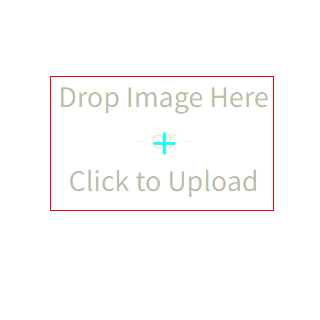
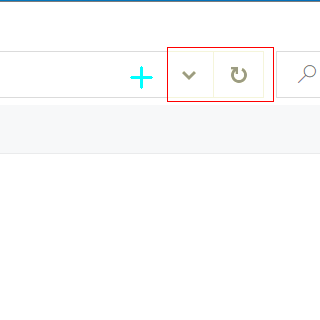
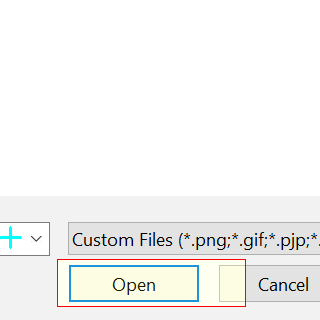

In [ ]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)


try:
    # If there is an image allready in the img box then it needs to be cleared 1st!
    # Step image if there is no image in the image box
    s = step(
        '''gASVKwAAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRL30uGhpROQi5eAQD//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XPusS5usS5usS5usS5usS5usS5usTCydvi6/f////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////y1cm5usS5utHl/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XPusS5usTC1fD/////////////////////////////////4NG5usS5usnZ7v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+co6+cqb7G2/L////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+its7V0NbV0NbV0NbPxcayrbGco6+co6+co6+sxeX8///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////86Na5qq+co6+co6+syvD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////8ti2p6+co6+co7zS8v/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////2cSio6+co6+pxer////////////////lysS5usTP4P//////69i/sbSfo6+cp7fC3f///////////////PLlzMavrLGfo6+cpLGir77CzOXy/P//////////////////////////7tvCusS5wtvy/////PLlzMavrLGfo6+cprGlscTM2/L////////////////////////////////////////////////sxbeco6+co8HZ///////////////////lysS5usTP4P//////7+DMt7mipq+co7GirLy/0Or8///////////86NvCtLefpK+cpLGir8HM3PX/////////////////////////////+fDizMmyr7Sipq+co6+fp7evus7f7/z///////////////////////////////zy2865sbeipq+co6+fqbmyusS5usS5usS5usS5usTP4P/////////////////86NbCtLmip6+co6+fqbmywtbs+f///////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////PLfx8SvrLGfo6+cprGlscTM2/L////////////////////////lysS5usTP4P//////69i/sbSfo6+cp7fC3f///////////////PLfx8SvrLGfo6+cprGlscTM2/L//////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////+rGrK+co6+crMvs///////////////Zt6+co6+yzff23Mmpo6+co6+co6+co7zS9f/////////84s6vp6+co6+co6+co6+co6+co6+co6+cqb7S6/z/////////////////////5supo6+co8HV4s6vqa+co6+co6+co6+co6+co6+co6+pwOD2///////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+pxury1sSlo6+co6+co6+co6+co6+co6+pxej///zvzb6io6+co6+co6+co6+co6+co7G20/X//////////////////PLfxbyio6+co6+co6+co6+co6+co6+co6+cpLnJ4/z//////////////////////PLVubSco6+co6+cpLGip6+co6+co6+co6+co6+co6+co6+20/////////////Xcvbeco6+co6+co6+co6+co6+co6+cpLnJ4/z//////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v//////////////////////49Gvqa+co6+co6+co6+co6+co6+co6+iudj2///////////////////Zt6+co6+yzff23Mmpo6+co6+co6+co7zS9f//////////49Gvqa+co6+co6+co6+co6+co6+co6+iudj2/////////////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////////////////lwLSco6+co77V/P/////////////Zt6+co6+pv8u2pq+cpLe2xdbi4uPZ0ODv////////48upo6+co6+cp7zC1eXy8/f58erizMSppK+co6+cp8HZ8v//////////////////5supo6+co6+co6+co7Svwtvp7vDy7vDs3dO5qq+co6+co7G51vf////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+irbeio6+cqbzC1eXy7vDp1cmvp6+co6+co7zCwrmco6+crMTP3ery7urizMGlo6+co6+cqsnl////////////////8ti2pq+co6+pt8vZ4vDy8/r88/Dp0MGlo6+co6+csNHv//////////////////zpw7eco6+co7S2zOr8////////7+DCra+co6+fscnS0NbV0Nbi7P////////zfvbSco6+co7Svxd3v9vz///z5693GsbGco6+cp8Hc9f///////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v//////////////////7NOvpK+co6+crMTV4vX8////+fXp0MGlo6+co6+pxur////////////////Zt6+co6+pv8u2pq+cpLe2xdbi4uPZ0ODv////////7NOvpK+co6+crMTV4vX8////+fXp0MGlo6+co6+pxur//////////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////////////////5zbyco6+co7fG5v/////////////Zt6+co6+co6+cp8HV7/z///////////////////DMsK+co6+cpr7V7/z/////////////////48upo6+co6+cs9P2////////////////5supo6+co6+cqsHV6/z/////////////////8ti2p6+co6+cqsnl///////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+co6+itNPv/P//////////////2MSfo6+co6+co6+pwOD2///////////////vx7mco6+co7fG4//////////////////v2Nbf7/z////////////////////vx7mco6+co7fG5v///////////////Ni2o6+co6+pxer/////////////////8tOyo6+co7fG5v//////////////2cSio6+co7G20/X//////////////////OjGra+co6+sx/D//////////////////////////////////////9i2o6+co6+its7V0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbVv7mco6+co7fG5v////////////////DMsK+co6+crcvp/P/////////////////208Gio6+cpsTc/P/////////////Zt6+co6+co6+cp8HV7/z///////////////////DMsK+co6+crcvp/P/////////////////208Gio6+cpsTc/P///////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////Zt6+co6+co7G82Pz/////////////////////2cSfo6+co6+sx/D////////////////////////sxbeco6+co7TC4P//////////////5supo6+co6+20//////////////////////////vx7mco6+co7fG5v/////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvp/////////////////////9i2o6+co6+cttj/////////////////////48ulo6+co6+20///////////////////////////////////////////////6M6po6+co6+20vz/////////////38mio6+co7fG4/////////////////////DMsK+co6+pxur///////////fStK+co6+fut3/////////////////////////08Gco6+csNHy/////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co7fG5v//////////////4Mmlo6+co7nM7P///////////////////////+rGrK+co7G82f/////////////Zt6+co6+co7G82Pz/////////////////////4Mmlo6+co7nM7P///////////////////////+rGrK+co7G82f///////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7G82f/////////////Zt6+co6+crMvp///////////////////////lwLSco6+co7zS9f//////////////////////////7tGso6+co6+pxur/////////////5supo6+co6+20///////////////////////////48ulo6+co6+yzff////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////Ni2o6+co6+pxur//////////////////////////////////////////Pf27tOyo6+co6+pxer/////////////1sGco6+co7fG5v/////////////////////Zt6+co6+pxer/////////9dOyo6+co6+51v//////////////////////////5supo6+co8HZ/////////////////////////////////////9i2o6+co6+cprGiqbSiqbSiqbSiqbSiqbSiqbSiqbSiqbSip6+co6+co7fG5v/////////////lwLSco6+crc7v///////////////////////////Zt6+co6+pxer////////////Zt6+co6+crMvp///////////////////////lwLSco6+crc7v///////////////////////////Zt6+co6+pxer//////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////0r6co6+co7fG5v/////////////Zt6+co6+crMvs//////////////////////zVtq+co6+crMvs/////////////////////////////+PCqa+co6+ct9j/////////////5supo6+co6+20////////////////////////////Ni2o6+co6+pxer////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer/////////////////////////9u3i0Mu/tLmip6+co6+co6+co6+co6+pxer/////////////7tGso6+co7G82Pz//////////////////+PCqa+co6+syvD/////////48ulo6+co7S2x9bV0NbV0NbV0NbV0NbV0NbV0NbVx76io6+co8HZ/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v////////////zVtq+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0Na/sK+co6+pxer////////////Zt6+co6+crMvs//////////////////////zVtq+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0Na/sK+co6+pxer//////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////////////////pw7eco6+co7zS9f/////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+crMvs/////////////////////////////+rGrK+co6+ct9j/////////////5supo6+co6+20////////////////////////////9i2o6+co6+pxer////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer/////////////////+erVureco6+co6+co6+fqbmyusbGzMaso6+co6+pxer///////////////XSs6+co6+crcvp/P/////////////20r6fo6+co7nM7P//////////08Gco6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co8HZ/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////+rGrK+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+pxer////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+pxer//////////////////////////////////////////////////////////////9i2o6+co6+pxer///////////////////////////////DMr6+co6+cqcnl///////////////Zt6+co6+crMvs/////////////////////+rJra+co6+crMvs/////////////////////////////+rGrK+co6+ct9j/////////////5supo6+co6+20////////////////////////////Ni2o6+co6+pxer////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer/////////////8ti5qa+co6+cpLe5zOPy+f///////////9i2o6+co6+pxer/////////////////8ti2p6+co6+crMTM2eXy4t3Mvbmio6+co6+pxej/////////////1sGco6+co7S2x9bV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0OPy/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////+rJra+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0Nbc5ff////////////Zt6+co6+crMvs/////////////////////+rJra+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0Nbc5ff//////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////4Mmlo6+co6+fvN3////////////////Zt6+co6+crMvs///////////////////////cua+co6+cpsTf/////////////////////////////Ni2o6+co6+iwOP/////////////5supo6+co6+20///////////////////////////38mio6+co6+20vz////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer///////////zfvLGco6+cp8HZ8v///////////////////9i2o6+co6+pxer///////////////////XcubSco6+co6+co6+co6+co6+cpLe50u3/////////////////6M6po6+co6+51v///////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////cua+co6+crc7v///////////////////////////////////////////////////Zt6+co6+crMvs///////////////////////cua+co6+crc7v/////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer///////////////////////////DMsK+co6+co7fG5v/////////////////Zt6+co6+crMvs///////////////////////5zbyco6+co7TC3///////////////////////////2MSfo6+co6+20/z/////////////5supo6+co6+20//////////////////////////sxbeco6+co7nM7v/////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer//////////+jGrK+co6+lw+j//////////////////////9i2o6+co6+pxer///////////////zpw7eco6+pxej89vLp2dbV0Nvi6PL5/P///////////////////////+PCqa+co6+fut3//////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////5zbyco6+co7nM7P/////////////////////////////////////////////////Zt6+co6+crMvs///////////////////////5zbyco6+co7nM7P///////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////PLVubSco6+co6+ivN3////////////////////Zt6+co6+crMvs////////////////////////9dayo6+co6+cs9P2/////////////////////OjGra+co6+cp8Tf/P//////////////5supo6+co6+20vz/////////////////////8ti2pq+co6+csNHv///////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer//////////9u5o6+co6+pxer/////////////////////686so6+co6+pxer//////////////928pq+co7fG5v/////////////////////////////////////////////lwrSco6+co7fG4/z//////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v//////////////9dayo6+co6+fttj2///////////////////////////////////////////////Zt6+co6+crMvs////////////////////////9dayo6+co6+fttj2/////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////Pf27uXfycasqa+co6+co6+cr87p/P/////////////////////Zt6+co6+crMvs///////////////////////////vyrmco6+co6+lvNvy/P//////////+erPtLGco6+co7G20/X/////////////////5supo6+co6+cpLe50Or8////////////7+DCra+co6+co7TC3/z////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer///////////DMsK+co6+crMnl+f////////////rs0MGlo6+co6+co6+pxer//////////////928pq+co6+vye3//////////////////////////////////////////////N28p6+co6+cp7zG2/L////////////////87N3Gwtbv/////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////////vyrmco6+co6+ludbs+f///////////////Pfp0MbJ2fz////////////////Zt6+co6+crMvs///////////////////////////vyrmco6+co6+ludbs+f///////////////Pfp0MbJ2fz//////////////////////////////////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+co6+co6+pvdvy/P/////////////////////////Zt6+co6+crMvs//////////////////////////////XcvLSco6+co6+cpLGir76yr7SfpK+co6+co6+pxej/////////////////////5supo6+co6+cpK+co6+cpLGiqbSiqbGco6+co6+co6+sxuj////////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer////////////51sGio6+co6+cpLGstMS5trylpq+co6+cr8a8sK+co6+pxer///////////////zlwLSco6+co6+cprGiqbSiqbSiqbSiqbSiqbevtsbG1ej5/P//////////////49Gvp6+co6+co6+cp7myusS5ur6sp7Gco6+co7G20/f//////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v////////////////////XcvLSco6+co6+co7Glsb65usS2sbefpK+co6+crMvs///////////////Zt6+co6+crMvs//////////////////////////////XcvLSco6+co6+co7Glsb65usS2sbefpK+co6+crMvs/////////////////////////////////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+cpLGirLy5xdbi7Pr////////////////////////////////Zt6+co6+crMvs//////////////////////////////////zv0sasqa+co6+co6+co6+co6+cqb7G2/L/////////////////////////5supo6+co7fG4/Lfxbyio6+co6+co6+co6+cqbzG2/L////////////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer///////////////zpyryio6+co6+co6+co6+cpre50Or8///cua+co6+pxer//////////////////OXCqq+co6+co6+co6+co6+co6+co6+co6+co6+co6+crcvp/P//////////////+erVurefo6+co6+co6+co6+co6+cqby/0Oj5/P///////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v////////////////////////zy28uyqa+co6+co6+co6+co6+co7Gpt87f7Pr////////////////Zt6+co6+crMvs//////////////////////////////////zy28uyqa+co6+co6+co6+co6+co7Gpt87f7Pr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////z58eXf0NbV1ePs8ff/////////////////////////////////5supo6+co7fG5v//////+fXs3dvV0N3p7vX8////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fXs3dvV0Nvi6PX8/////////////////////////////////////OjGra+co7S82PX88/Dy7vDy7vDy7vDy7vDp2dPCs7Sco6+co6+syvD/////////////////////+fXy4t3V0NbV1ePs8ff///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////z58eri1dbV0Nbf4vD2+f////////////////////////////////////////////////////////////////////////////////z58eri1dbV0Nbf4vD2+f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////lwrSco6+iv+D//////////////////////////////+PCqa+co6+cudv/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+rJra+co6+20////////////////////////////////+PCqa+co6+pxur/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////DMsK+co6+fttj2//////////////////////////zvzLyfo6+co7nM7P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////2zbyco6+co6+is8nZ4vL5/P////////r26OPPureco6+co7Gyz/D/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////rlx7yio6+co6+co6+co6+co6+co6+co6+co6+cqb7G3PX//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pf27vDy7vD2+f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fDi1dHCusS2sbeiqbmyusS/xdPf4vX8///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////78Ove3N7S1tvR1dvR193X3uXm8Pz///////////////////////////Dh3uLa3ujs//////3w5+PX2NvR1dvS2eXq/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pbn3t3R1dvR1dvR1dvR1dvR1dvR1dvR1dvV4O/1/////////////////////+va1dvR1eDj+Pfq4N7R1dvR1dvR1dvR2+n4//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////fm3dzR1dvR1dvU3unq8ff4+Pjz7uvd29zR1dvR1dvV4vH8/////////////////+va1dvR1d3d4eHS1dvR2OHe5u/t7Ovk7PX////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////86uPS1dvR1dvU4PD7//////////////////fm3dzR1dvR1d3d7P3//////////////+va1dvR1dvR1dvS3erz/P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////bh2tvR1dvR1uPn/P//////////////////////+Ova1tvR1dvR3Or4/////////////+va1dvR1dvR1uPn/P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+OnX1dvR1dvS4O/////////////////////////////p3tzR1dvR1eLm/////////////+va1dvR1dvU4fH///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y////////////////////////////////7+XU1dvR1dva6P/////////////////////////////45uDR1dvR1d3e8P///////////+va1dvR1dvU4vL///////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+va1dvR1dvR1dvR1dvR1dvR1dvR1eLm////////////////////////////////6OLR1dvR1dva6P//////////////////////////////6OLR1dvR1d3e8P///////////+va1dvR1dvU4vL//////////////////////////////////////////////+va1dvR1dvR1dvR1dvR1dvR1dvR1eLm//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y////////////////////////////////6OLR1dvR1dva6P//////////////////////////////6OLR1dvR1d3e8P///////////+va1dvR1dvU4vL///////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8efV1dvR1dvX5Pb////////////////////////////t4d3R1dvR1eDj+P///////////+va1dvR1dvU4vL//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/d19vR1dvR2+n4//////////////////////////Xg2tvR1dvR2OXv/////////////+va1dvR1dvU4vL////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////s4N3R1dvR1d3d7P3////////////////////16OLS1dvR1dvX5PX//////////////+va1dvR1dvU4vL//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////O7b1tvR1dvR1uDg7vz///////////3z6+TV1dvR1dvR2eXt/P///////////////+va1dvR1dvU4vL////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////87+jX1tvR1dvR1dvR193X3ODU19vR1dvR1dvR1uLm9v///////////////////+va1dvR1dvU4vL/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9u/g3N3R1dvR1dvR1dvR1dvR1dvV3urv+v///////////////////////+va1dvR1dvU4vL/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+vjw7Ovk5+rp7vb2+v/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////y3dbV0NbV1uj5////////////////////////////////////////////////////////////////////////////////////////////////////9ejc0NbV0Nvp9f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9ejc0NbV0Nbi7P/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////55dvV0NbV0OPy///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////8t3Csbeir8HS4/z/////////////////////////////////////////////////////////////////////5supo6+co7fG5v//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////PLlzMmyr7Gfo6+co6+co6+cp7m2xdvs+f/////////////////////Zt6+co6+crMvs///////////////sxbeco6+co6+ct9j/////////////////////////////////////////////////////////////////////5supo6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XPusS5usTC1fD/////////////////////////////////4NG5usS5utHl////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////84s6vqa+co6+co6+co6+co6+co6+co6+co6+cpLnC3PX////////////////Zt6+co6+crMvs///////////////yzLyco6+co6+iveD/////////////////////////////////////////////////////////////////////5supo6+co7fG5v//////////////////////////////////////////////////////////////////////////4NG5usS5yuX//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////22MSlo6+co6+co7Gpt8vV3ery7vDy7urizMasqa+co6+cpL7S8f/////////////Zt6+co6+crMvs//////////////////rs2dbV1eXy/P//////////////////////////////////////////////////////////////////////5supo6+co7fG5v/////////////////////////////////////////////////////////////////////////sxbeco6+ct9j//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7NGso6+co6+cp77P6Pr//////////////////////O3StLe20/X////////////////Zt6+co6+crMvs////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co7fG5v/////////////////////////////////////////////////////////////////////////sxbeco6+ct9j//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////fZt7Gco6+co7fG4/z////////////////////////////////////////////////////Zt6+co6+crMvs////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co7fG5v/////////////////////////////////////////////////////////////////////////cua+co6+ct9j//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7M6so6+co6+lwOP////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////7tvCusS5usTP4P///////////////////////////Pfp1cu2r7Sipq+co6+fqbm2xdvs+f//////////////5supo6+co7fG5v////////////////////zpzca5usS5vMvf8f////////////////////////////Di0NHCusSvqq+co6+cqry5usS5usS5usS5yuX///////////////////rs1cu2r7SfpK+co7GirLy5xdvs+f///////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////+XPusS5utHl//////rs1cu2r7SfpK+cpLGir77C0Or8////////////////////////5supo6+co6+20////////////////////////////PLlzMavrLGfo6+cpLGir77CzOXy/P////////////////////////////////ry3dPCtLmip7Gco6+cprGlscTM2/L/////////////////////////////////+erVwr6sqbGco6+cp7evvdPl7/z5zbyco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co7fG5v/////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////////////69O2qa+co6+co6+co6+co6+co6+co6+cpLnG4Pr/////////5supo6+co7fG5v/////////////////208Gio6+co7G20/X//////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+ct9j/////////////79u8qq+co6+co6+co6+co6+co6+co6+cpLnC3PX//////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co7fG3Nu/rK+co6+co6+co6+co6+co6+co6+itNPv/P//////////////////5supo6+co6+20//////////////////////84s6vp6+co6+co6+co6+co6+co6+co6+cqb7S6/z///////////////////zy28uvqa+co6+co6+co6+co6+co6+co6+co6+sxuj////////////////////////23MmspK+co6+co6+co6+co6+co6+co7S5t7mco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////zVtq+co6+cqcnl///////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////////8ti2p6+co6+co7Svwtvp7vX59vLs3dO5rK+cp8Tf/P//////////5supo6+co7fG5v//////////////48upo6+co6+pxej///////////////////////////////////Di0NbV0M62qa+co6+csMbV0NbV0NbV0NbV3fD/////////8ti2p6+co6+co7S5zOPs8ff58/Dp1cmvqa+co6+co7fG4/z//////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+co6+co6+putPi6PDy7vDy4tvCsbGco6+co6+pxur/////////////////5supo6+co6+20///////////////////48upo6+co6+cp7zC1eXy8/f58erizMSppK+co6+cp8HZ8v////////////////XVtrGco6+crMHG1eXy7vX8+fXy4ta5qq+co6+co7nM7P//////////////////48upo6+co6+co7S5zOPs7vDy7vDp1cmvqa+co6+co6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+rGrK+co6+cs9P5///////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20/////////////////DMsK+co6+co7fG4/z//////////////////PLy7/z/////////////5supo6+co7fG5v//////////8ti2p6+co6+it9j2/////////////////////////////////////////////+rGrK+co6+ct9j///////////////////////zfvLGco6+co7fC4vr/////////////////8ti2p6+co6+cqsnl/P///////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+cp7zG3PX//////////////////OjGra+co6+co77S9f//////////////5supo6+co6+20/////////////////DMsK+co6+cpr7V7/z/////////////////48upo6+co6+cs9P2////////////////7N3V2/L/////////////////////7M6so6+co6+pxer///////////////DMsK+co6+co7fG4/z//////////////////PLVtrGco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////928pq+co6+ct9j////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////2cSfo6+co6+pxer/////////////////////////////////////////5supo6+co7fG5v///////OjGra+co6+crcvp/P///////////////////////////////////////////////+rGrK+co6+ct9j/////////////////////7tGso6+co6+fut3////////////////////////508Gfo6+co6+yz/f//////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer/////////////////////////2MSfo6+co6+20/z/////////////5supo6+co6+20///////////////2cSfo6+co6+sx/D////////////////////////sxbeco6+co7TC4P///////////////////////////////////////////+rJra+co6+cttj/////////////4Mmlo6+co6+pxer////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+ct9j////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////lwLSco6+co7zS9f//////////////////////////////////////////5supo6+co7fG5v////zfvLGco6+cp8HZ8v///////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////5zbyco6+co7TC3////////////////////////////928pq+co6+cudv//////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////Ni2o6+co6+iwOP/////////////5supo6+co6+20//////////////lwLSco6+co7zS9f//////////////////////////7tGso6+co6+pxur///////////////////////////////////////z58fDPtq+co6+crMvs///////////pw7eco6+co7nM7v/////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+rGrK+co6+cttj////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20/////////////zVtq+co6+crMvp////////////////////////////////////////////5supo6+co7fG5v/208Gio6+co6+lwuX//////////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////pw7eco6+co8HZ//////////////////////////////fSs6+co6+crMvs/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////+jGrK+co6+ct9j/////////////5supo6+co6+20/////////////zVtq+co6+crMvs/////////////////////////////+PCqa+co6+ct9j//////////////////////Pfv3dbGvb6sqbGco6+co6+co6+co6+crMvs///////////Zt6+co6+crMvp///////////////////////////sxbeco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////DMsK+co6+crMvp///////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20////////////+rGrK+co6+crMvs////////////////////////////////////////////5supo6+co7fG0supo6+co6+co6+co7fJ5v///////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////Zt6+co6+co8HZ///////////////////////////////Zt6+co6+crMvs/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////+rGrK+co6+ct9j/////////////5supo6+co6+20////////////+rGrK+co6+crMvs/////////////////////////////+rGrK+co6+ct9j///////////////rs0MSppK+co6+co6+cp7SstMS/xdO/sK+co6+crMvs/////////+rJra+co6+crMvs///////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////lwLSco6+co7nM7v/////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20////////////+rJra+co6+crMvs////////////////////////////////////////////5supo6+co6+co6+co6+pxeDPs6+co6+csNHv/////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////cua+co6+co8HZ///////////////////////////////Zt6+co6+crMvs/////////////////////////////////////9i2o6+co6+pxer////////////////////////////////5zbyco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////+jGrK+co6+ct9j/////////////5supo6+co6+20////////////+rJra+co6+crMvs/////////////////////////////+rGrK+co6+ct9j///////////XZubSco6+co6+putPi7Pr////////////Zt6+co6+crMvs//////////fSs6+co6+crMvs///////////////////////////sxbeco6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////2MSfo6+co6+sx/D////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////cua+co6+cpsTf////////////////////////////////////////////5supo6+co6+co6+it9j2////7NGso6+co6+syvD//////////////////////////////////////////////+rGrK+co6+ct9j////////////////////vxreco6+co7nM7v///////////////////////////+jGrK+co6+cs9P5/////////////////////////////////////+jGrK+co6+cttj////////////////////////////////lwLSco6+crMvp/////////////////9i2o6+co6+pxer/////////////////////////9dOyo6+co6+lw+j/////////////5supo6+co6+20//////////////cua+co6+cpsTf/////////////////////////////Ni2o6+co6+iwOP/////////2cSio6+co7G20/X////////////////////Zt6+co6+crMvs///////////Zt6+co6+cpsTf///////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XCqq+co6+cp8Hc9f/////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////yyrmco6+co7G82Pz/////////////////////////////////////////5supo6+co6+crcvp/P////////zpw7eco6+co7zS8v///////////////////////////////////////////+rGrK+co6+ct9j/////////////////////38mio6+co6+yzff/////////////////////////7M6so6+co6+pxer////////////////////////////////////////cua+co6+cpsTc/P///////////////////////////+XCqq+co6+ct9j//////////////////9i2o6+co6+pxer/////////////////////////08Gco6+co7G82f//////////////5supo6+co6+20//////////////5zbyco6+co7TC3///////////////////////////2MSfo6+co6+20/z////////pw7eco6+crMvp///////////////////////Zt6+co6+crMvs///////////vxreco6+co7TC4P/////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////508Gfo6+co6+itNPv/P/////////////////////////22MSpr8vp/P/////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////9dayo6+co6+crcvp/P///////////////////////Pz/////////////5supo6+co7fG4////////////////OPCqq+co6+fttj2//////////////////////////////////////////fSs6+co6+crc7v/////////////////////+XCqq+co6+cqsnl/P////////////////////XZt7Gco6+co7nM7P//////////////////////////////////////////2MSfo6+co6+pw+j////////////////////////2zbyco6+co7G82Pz//////////////////9i2o6+co6+lw+j//////////////////////OjGrK+co6+cp8Tf/P//////////////5supo6+co6+20///////////////9dayo6+co6+cs9P2/////////////////////OjGra+co6+cp8Tf/P/////////cua+co6+crMvs/////////////////////O3JsK+co6+crMvs////////////5supo6+co6+ft9j5//////////////////////XVtrGco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////XZt7Gco6+co6+crMTV4vX8////////////9ujVureco6+co6+pw+j////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////////sxreco6+co6+isc7l+f////////////zy28uvqbnM7P//////////5supo6+co7fG5v/////////////////51sGio6+co7G51vf////////////////////////////////////////lwLSco6+co7fG4/z/////////////////////2cSio6+co6+isc7l+f///////////PLfwLeco6+co6+pxej///////////////////////////////////////////////DMsK+co6+co7Gvxd3y+f//////////+fDfxbyio6+co6+csNHv/////////////////////9i2o6+co6+co7SvxeDy/P//////////+erPtLGco6+co6+yzfX/////////////////5supo6+co6+20//////////////////vyrmco6+co6+lvNvy/P//////////+erPtLGco6+co7G20/X////////////yyrmco6+co7fC4vr////////////86Na5qq+co6+co6+crMvs//////////////fStK+co6+co6+sxeX8////////////7+DGsbGco6+co6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////XcvLSco6+co6+co6+co7GiqbSip6+co6+co6+co6+iudjy/P/////////////lwLSco6+co6+pr8nc/P//////////5supo6+co6+20/////////////////////XZubSco6+co6+co7GirLy2tLmip6+co6+co6+ivN38////////5supo6+co7fG5v////////////////////XVtrGco6+cp8Hc9f//////////////////////////////////////5supo6+co6+co7GptMS2sbSftNP5//////////zpyryio6+co6+co7GirLyysbeipq+co6+co6+it9j2////////////////////////////////////////////////////8ti5qa+co6+co6+co6+fp7SiqbGco6+co6+co6+cp8HZ8v///////////////////////9i2o6+co6+cpK+co6+co7GiqbSiqbGfo6+co6+co6+iudj2////////////////////9dOyo6+co6+cqbe2zOr///////////////XcvLSco6+co6+cpLGir76yr7SfpK+co6+co6+pxej/////////////////9du5p6+co6+co6+fr765ur6vqrGco6+cpLm/vLmco6+crMvs////////////////8ti2p6+co6+co6+cprGiqbSiqbGco6+co7GvvL6lo6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////zy2862rbGco6+co6+co6+co6+co6+cqb7C1u3/////////////////////7NOvpK+co6+co7fG4///////////5supo6+co6+20/////////////////////////rs0MSppq+co6+co6+co6+co6+cpre50Or8////////////5supo6+co7fG5v//////////////////////7NGso6+co6+ivN3///////////////////////////////////////zpyryio6+co6+co6+co6+cpMHc/P/////////////23M62rK+co6+co6+co6+co6+cpre50Or8////////////////////////////////////////////////////////////+erVurefo6+co6+co6+co6+co6+co7Gputbs+f///////////////////////////9i2o6+co6+20/rs0MSppK+co6+co6+co6+cpLe50Or8//////////////////////////zfvbSco6+co6+cttj///////////////////zv0sasqa+co6+co6+co6+co6+cqb7G2/L/////////////////////////49Gvqa+co6+co6+co6+co7Gputbs+f//1sGco6+crMvs////////////////////8uDGs7Sco6+co6+co6+co6+cqb7G3PX/9dOyo6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9vLs3dvV0NbV2eXy8/r/////////////////////////////////+fDi1dbV2eX2+f////////////////////////////////////////////////////////r27uXf0NbV0N3p8ff/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fXs3dvV0Nvi6PL5/P/////////////////////////88+ri1dbV0N3p7vX8/////////////////////////////////////////////////////////////////////////////Pf27uXf0NbV0N3p7vL5/P///////////////////////////////////9i2o6+co6+20////////Pf24t3V0Nvi6PL5/P////////////////////////////////////z55d3V0Nvi6/f///////////////////////////z58eXf0NbV1ePs8ff///////////////////////////////////////r26OPZ0NbZ3er2+f//////////////////////////////////////////////////9vLp2dbV0N3p8ff//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////r27vDy7vD29vz///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+VDAAAAAAAAACUZWJLc0tEhpSGlC4=''',
        tries = 1,
        timer = 1,
        gate = 1,
        bbox = None,
    )

    # Logic here
    for i in s.locations:
        gui.click(i, clicks=1, button='left')
        #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
        #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
        #gui.hotkey(os_ctrl(),'v')               # Keypress events
        #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow
except:
    # Step if there is image allready there
    s = step(
        '''gASVe1oAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLl0szhpROQj9aAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Zt6+co6+20///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////2MaiqbSiqbSiqbSiqbSiqbSlsb65wtHf5ff////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Zt6+co6+20///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+cpLGiqbSiqbSiqbGfo6+co6+co6+iudj2/////////////////////////////////////////////////////////////////+jGrK+crMvs///////////////////////////////////////////////////////////////Zt6+co6+20///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j///////////////z55dOyp6+co6+vzPD//////////////////////////////////////////////////////////////9i2o6+crMvs///////////////////////////////////////////////////////////////Zt6+co6+20///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j/////////////////////0r6co6+ct9j//////////////////////////////////////////////////////////////9i2o6+crMvs///////////////////////////////////////////////////////////////Zt6+co6+20///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j/////////////////////38mio6+ct9j//////////////////PLlzMmyr7SfpK+co6+frLy/0u3//////////+XPusS5trmio6+cpre2usS5usS5utHl//////////////rs1cu2r7SfpK+co7Gir8HM2/L////////////Zt6+co7fG4///7+DMt7mfpK+co7Gir8TV6/z/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j////////////////////sxbeco6+pxer////////////83cmppK+co6+cp7Slsb6vrLGco6+co7G20/X//////9i2o6+co6+co6+co6+co6+co6+co8HZ/////////O3StrSco6+co7GirLyvr7Gfo6+co7S82fr////////Zt6+co7e/x8Slo6+cprGiqbSfpK+co6+cp8Tf/P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j///////////r27uXZwryio6+cqcTc9f///////////////ODCs8TP4PL////////////208Gio6+cqsnl////////////5supo6+crMvs//////////////////zlwLSco6+crcnf7/z/////////+eXMxdj2///////////Zt6+co6+co7Gvx+X8/////////OjGrK+co6+yz/f/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+co6+co6+co6+co6+co6+co6+frcnf8////////////////////////////////////////////+PCqa+co7nM7v//////////5supo6+crMvs////////////////7tOvo6+co7nM7P/////////////////////////////////Zt6+co6+vzPX////////////////yyrmco6+iwOP/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+csMbV0NbV0NbV0NHCusSyr7Gco6+co7S2ze3///////////////////////////////z58fDs3dG2qa+co7fG5v//////////5supo6+crMvs///////////////5zbyco6+cs9P5///////////////////////////////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j/////////////////////79i2p6+co7TC3/z///////////////ry3dO/sbefpK+co6+co6+co6+co7fG5v//////////5supo6+crMvs///////////////sxbeco6+pxer////////////////////////////////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j////////////////////////5zbyco6+iwOP//////////OjJr6+co6+crL7Cyd3p7vX8/+rGrK+co7fG5v//////////5supo6+crMvs///////////////sxbeco6+pxer////////////////////////////////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j/////////////////////////08Gco6+ct9j///////zfvLGco6+pw+X8/////////////+rGrK+co7fG5v//////////5supo6+crMvs///////////////vxreco6+fvN3////////////////////////////////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j////////////////////////lwrSco6+lw+j//////+rGrK+co77V/P///////////////+rGrK+co7fG5v//////////5supo6+crMvs////////////////38mio6+cqcbi/P/////////////////////////////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+ct9j///////////////////zy28mpo6+co7fG5v///////+jGrK+co7nM7P/////////////23Mmpo6+co7fG5v//////////7tGso6+cpsTf/////////////////+rGrK+co6+pw+X8///////////////23ODp/P/////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+cqry5usS5usS5usS5trylp6+co6+co7Gvyuj///////////zfvLGco6+cqsHM0NvZ1dPGt7eco7GlqrGco7fG5v///////////+XCqq+co6+ludHV0NbPxdbl////////48upo6+co6+isMbM0NbV0NPGt7eco6+sx+r////////Zt6+co6+20///////////////////08Gco6+ct9j/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////08Gco6+co6+co6+co6+co6+co6+fp7evus7f7Pr//////////////////OjMs7Sco6+co6+co6+crMTV6Prvxreco7fG5v//////////////486spK+co6+co6+co7TC4P//////////69i5rbGco6+co6+co6+co7Gputbs+f/////////Zt6+co6+20///////////////////08Gco6+ct9j////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////88/Dy7vDy8ff//////////////////////////////////////Pf27vDy7vD29vz/////////////////////9vLy7vDy7vD2+f/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////l5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+v////////////////////l5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+v////////////////////l5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+v////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////l5+vl5+vl5+v////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////l5+vl5+vl5+v////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////l5+vl5+vl5+v////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////l5+vl5+vl5+v///////////////////+UZWJLaUtXhpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )
    # Logic here
    i = s.locations[0]
    gui.click(i, clicks=1, button='left')
        
    # And try the original step again
    
    # Open dialog
    s = step(
        '''gASVKwAAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRL30uGhpROQi5eAQD//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XPusS5usS5usS5usS5usS5usS5usTCydvi6/f////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////y1cm5usS5utHl/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XPusS5usTC1fD/////////////////////////////////4NG5usS5usnZ7v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+co6+cqb7G2/L////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+its7V0NbV0NbV0NbPxcayrbGco6+co6+co6+sxeX8///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////86Na5qq+co6+co6+syvD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////8ti2p6+co6+co7zS8v/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////2cSio6+co6+pxer////////////////lysS5usTP4P//////69i/sbSfo6+cp7fC3f///////////////PLlzMavrLGfo6+cpLGir77CzOXy/P//////////////////////////7tvCusS5wtvy/////PLlzMavrLGfo6+cprGlscTM2/L////////////////////////////////////////////////sxbeco6+co8HZ///////////////////lysS5usTP4P//////7+DMt7mipq+co7GirLy/0Or8///////////86NvCtLefpK+cpLGir8HM3PX/////////////////////////////+fDizMmyr7Sipq+co6+fp7evus7f7/z///////////////////////////////zy2865sbeipq+co6+fqbmyusS5usS5usS5usS5usTP4P/////////////////86NbCtLmip6+co6+fqbmywtbs+f///////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////////////////////PLfx8SvrLGfo6+cprGlscTM2/L////////////////////////lysS5usTP4P//////69i/sbSfo6+cp7fC3f///////////////PLfx8SvrLGfo6+cprGlscTM2/L//////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////+rGrK+co6+crMvs///////////////Zt6+co6+yzff23Mmpo6+co6+co6+co7zS9f/////////84s6vp6+co6+co6+co6+co6+co6+co6+cqb7S6/z/////////////////////5supo6+co8HV4s6vqa+co6+co6+co6+co6+co6+co6+pwOD2///////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+pxury1sSlo6+co6+co6+co6+co6+co6+pxej///zvzb6io6+co6+co6+co6+co6+co7G20/X//////////////////PLfxbyio6+co6+co6+co6+co6+co6+co6+cpLnJ4/z//////////////////////PLVubSco6+co6+cpLGip6+co6+co6+co6+co6+co6+co6+20/////////////Xcvbeco6+co6+co6+co6+co6+co6+cpLnJ4/z//////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v//////////////////////49Gvqa+co6+co6+co6+co6+co6+co6+iudj2///////////////////Zt6+co6+yzff23Mmpo6+co6+co6+co7zS9f//////////49Gvqa+co6+co6+co6+co6+co6+co6+iudj2/////////////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////////////////lwLSco6+co77V/P/////////////Zt6+co6+pv8u2pq+cpLe2xdbi4uPZ0ODv////////48upo6+co6+cp7zC1eXy8/f58erizMSppK+co6+cp8HZ8v//////////////////5supo6+co6+co6+co7Svwtvp7vDy7vDs3dO5qq+co6+co7G51vf////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+irbeio6+cqbzC1eXy7vDp1cmvp6+co6+co7zCwrmco6+crMTP3ery7urizMGlo6+co6+cqsnl////////////////8ti2pq+co6+pt8vZ4vDy8/r88/Dp0MGlo6+co6+csNHv//////////////////zpw7eco6+co7S2zOr8////////7+DCra+co6+fscnS0NbV0Nbi7P////////zfvbSco6+co7Svxd3v9vz///z5693GsbGco6+cp8Hc9f///////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v//////////////////7NOvpK+co6+crMTV4vX8////+fXp0MGlo6+co6+pxur////////////////Zt6+co6+pv8u2pq+cpLe2xdbi4uPZ0ODv////////7NOvpK+co6+crMTV4vX8////+fXp0MGlo6+co6+pxur//////////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////////////////5zbyco6+co7fG5v/////////////Zt6+co6+co6+cp8HV7/z///////////////////DMsK+co6+cpr7V7/z/////////////////48upo6+co6+cs9P2////////////////5supo6+co6+cqsHV6/z/////////////////8ti2p6+co6+cqsnl///////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+co6+itNPv/P//////////////2MSfo6+co6+co6+pwOD2///////////////vx7mco6+co7fG4//////////////////v2Nbf7/z////////////////////vx7mco6+co7fG5v///////////////Ni2o6+co6+pxer/////////////////8tOyo6+co7fG5v//////////////2cSio6+co7G20/X//////////////////OjGra+co6+sx/D//////////////////////////////////////9i2o6+co6+its7V0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbVv7mco6+co7fG5v////////////////DMsK+co6+crcvp/P/////////////////208Gio6+cpsTc/P/////////////Zt6+co6+co6+cp8HV7/z///////////////////DMsK+co6+crcvp/P/////////////////208Gio6+cpsTc/P///////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////Zt6+co6+co7G82Pz/////////////////////2cSfo6+co6+sx/D////////////////////////sxbeco6+co7TC4P//////////////5supo6+co6+20//////////////////////////vx7mco6+co7fG5v/////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvp/////////////////////9i2o6+co6+cttj/////////////////////48ulo6+co6+20///////////////////////////////////////////////6M6po6+co6+20vz/////////////38mio6+co7fG4/////////////////////DMsK+co6+pxur///////////fStK+co6+fut3/////////////////////////08Gco6+csNHy/////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co7fG5v//////////////4Mmlo6+co7nM7P///////////////////////+rGrK+co7G82f/////////////Zt6+co6+co7G82Pz/////////////////////4Mmlo6+co7nM7P///////////////////////+rGrK+co7G82f///////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7G82f/////////////Zt6+co6+crMvp///////////////////////lwLSco6+co7zS9f//////////////////////////7tGso6+co6+pxur/////////////5supo6+co6+20///////////////////////////48ulo6+co6+yzff////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////Ni2o6+co6+pxur//////////////////////////////////////////Pf27tOyo6+co6+pxer/////////////1sGco6+co7fG5v/////////////////////Zt6+co6+pxer/////////9dOyo6+co6+51v//////////////////////////5supo6+co8HZ/////////////////////////////////////9i2o6+co6+cprGiqbSiqbSiqbSiqbSiqbSiqbSiqbSiqbSip6+co6+co7fG5v/////////////lwLSco6+crc7v///////////////////////////Zt6+co6+pxer////////////Zt6+co6+crMvp///////////////////////lwLSco6+crc7v///////////////////////////Zt6+co6+pxer//////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////0r6co6+co7fG5v/////////////Zt6+co6+crMvs//////////////////////zVtq+co6+crMvs/////////////////////////////+PCqa+co6+ct9j/////////////5supo6+co6+20////////////////////////////Ni2o6+co6+pxer////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer/////////////////////////9u3i0Mu/tLmip6+co6+co6+co6+co6+pxer/////////////7tGso6+co7G82Pz//////////////////+PCqa+co6+syvD/////////48ulo6+co7S2x9bV0NbV0NbV0NbV0NbV0NbV0NbVx76io6+co8HZ/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v////////////zVtq+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0Na/sK+co6+pxer////////////Zt6+co6+crMvs//////////////////////zVtq+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0Na/sK+co6+pxer//////////////////////////////////////////////////////////////9i2o6+co6+pxer////////////////////////////////pw7eco6+co7zS9f/////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+crMvs/////////////////////////////+rGrK+co6+ct9j/////////////5supo6+co6+20////////////////////////////9i2o6+co6+pxer////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer/////////////////+erVureco6+co6+co6+fqbmyusbGzMaso6+co6+pxer///////////////XSs6+co6+crcvp/P/////////////20r6fo6+co7nM7P//////////08Gco6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co8HZ/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////+rGrK+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+pxer////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+co6+pxer//////////////////////////////////////////////////////////////9i2o6+co6+pxer///////////////////////////////DMr6+co6+cqcnl///////////////Zt6+co6+crMvs/////////////////////+rJra+co6+crMvs/////////////////////////////+rGrK+co6+ct9j/////////////5supo6+co6+20////////////////////////////Ni2o6+co6+pxer////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer/////////////8ti5qa+co6+cpLe5zOPy+f///////////9i2o6+co6+pxer/////////////////8ti2p6+co6+crMTM2eXy4t3Mvbmio6+co6+pxej/////////////1sGco6+co7S2x9bV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0OPy/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v///////////+rJra+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0Nbc5ff////////////Zt6+co6+crMvs/////////////////////+rJra+co6+csMbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0NbV0Nbc5ff//////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////4Mmlo6+co6+fvN3////////////////Zt6+co6+crMvs///////////////////////cua+co6+cpsTf/////////////////////////////Ni2o6+co6+iwOP/////////////5supo6+co6+20///////////////////////////38mio6+co6+20vz////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer///////////zfvLGco6+cp8HZ8v///////////////////9i2o6+co6+pxer///////////////////XcubSco6+co6+co6+co6+co6+cpLe50u3/////////////////6M6po6+co6+51v///////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////cua+co6+crc7v///////////////////////////////////////////////////Zt6+co6+crMvs///////////////////////cua+co6+crc7v/////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer///////////////////////////DMsK+co6+co7fG5v/////////////////Zt6+co6+crMvs///////////////////////5zbyco6+co7TC3///////////////////////////2MSfo6+co6+20/z/////////////5supo6+co6+20//////////////////////////sxbeco6+co7nM7v/////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer//////////+jGrK+co6+lw+j//////////////////////9i2o6+co6+pxer///////////////zpw7eco6+pxej89vLp2dbV0Nvi6PL5/P///////////////////////+PCqa+co6+fut3//////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////5zbyco6+co7nM7P/////////////////////////////////////////////////Zt6+co6+crMvs///////////////////////5zbyco6+co7nM7P///////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////PLVubSco6+co6+ivN3////////////////////Zt6+co6+crMvs////////////////////////9dayo6+co6+cs9P2/////////////////////OjGra+co6+cp8Tf/P//////////////5supo6+co6+20vz/////////////////////8ti2pq+co6+csNHv///////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer//////////9u5o6+co6+pxer/////////////////////686so6+co6+pxer//////////////928pq+co7fG5v/////////////////////////////////////////////lwrSco6+co7fG4/z//////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v//////////////9dayo6+co6+fttj2///////////////////////////////////////////////Zt6+co6+crMvs////////////////////////9dayo6+co6+fttj2/////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////Pf27uXfycasqa+co6+co6+cr87p/P/////////////////////Zt6+co6+crMvs///////////////////////////vyrmco6+co6+lvNvy/P//////////+erPtLGco6+co7G20/X/////////////////5supo6+co6+cpLe50Or8////////////7+DCra+co6+co7TC3/z////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer///////////DMsK+co6+crMnl+f////////////rs0MGlo6+co6+co6+pxer//////////////928pq+co6+vye3//////////////////////////////////////////////N28p6+co6+cp7zG2/L////////////////87N3Gwtbv/////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v/////////////////vyrmco6+co6+ludbs+f///////////////Pfp0MbJ2fz////////////////Zt6+co6+crMvs///////////////////////////vyrmco6+co6+ludbs+f///////////////Pfp0MbJ2fz//////////////////////////////////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+co6+co6+pvdvy/P/////////////////////////Zt6+co6+crMvs//////////////////////////////XcvLSco6+co6+cpLGir76yr7SfpK+co6+co6+pxej/////////////////////5supo6+co6+cpK+co6+cpLGiqbSiqbGco6+co6+co6+sxuj////////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer////////////51sGio6+co6+cpLGstMS5trylpq+co6+cr8a8sK+co6+pxer///////////////zlwLSco6+co6+cprGiqbSiqbSiqbSiqbSiqbevtsbG1ej5/P//////////////49Gvp6+co6+co6+cp7myusS5ur6sp7Gco6+co7G20/f//////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v////////////////////XcvLSco6+co6+co7Glsb65usS2sbefpK+co6+crMvs///////////////Zt6+co6+crMvs//////////////////////////////XcvLSco6+co6+co7Glsb65usS2sbefpK+co6+crMvs/////////////////////////////////////////////////////////////////9i2o6+co6+co6+co6+co6+co6+cpLGirLy5xdbi7Pr////////////////////////////////Zt6+co6+crMvs//////////////////////////////////zv0sasqa+co6+co6+co6+co6+cqb7G2/L/////////////////////////5supo6+co7fG4/Lfxbyio6+co6+co6+co6+cqbzG2/L////////////////////////////////////////////////sxbeco6+co8HZ///////////////////Zt6+co6+crMvs/////////////////////+rGrK+co6+ct9j//////////////////////9i2o6+co6+pxer///////////////zpyryio6+co6+co6+co6+cpre50Or8///cua+co6+pxer//////////////////OXCqq+co6+co6+co6+co6+co6+co6+co6+co6+co6+crcvp/P//////////////+erVurefo6+co6+co6+co6+co6+cqby/0Oj5/P///////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co7fG5v////////////////////////zy28uyqa+co6+co6+co6+co6+co7Gpt87f7Pr////////////////Zt6+co6+crMvs//////////////////////////////////zy28uyqa+co6+co6+co6+co6+co7Gpt87f7Pr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////z58eXf0NbV1ePs8ff/////////////////////////////////5supo6+co7fG5v//////+fXs3dvV0N3p7vX8////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fXs3dvV0Nvi6PX8/////////////////////////////////////OjGra+co7S82PX88/Dy7vDy7vDy7vDy7vDp2dPCs7Sco6+co6+syvD/////////////////////+fXy4t3V0NbV1ePs8ff///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////z58eri1dbV0Nbf4vD2+f////////////////////////////////////////////////////////////////////////////////z58eri1dbV0Nbf4vD2+f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////lwrSco6+iv+D//////////////////////////////+PCqa+co6+cudv/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+rJra+co6+20////////////////////////////////+PCqa+co6+pxur/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////DMsK+co6+fttj2//////////////////////////zvzLyfo6+co7nM7P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////2zbyco6+co6+is8nZ4vL5/P////////r26OPPureco6+co7Gyz/D/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////rlx7yio6+co6+co6+co6+co6+co6+co6+co6+cqb7G3PX//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pf27vDy7vD2+f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fDi1dHCusS2sbeiqbmyusS/xdPf4vX8///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////78Ove3N7S1tvR1dvR193X3uXm8Pz///////////////////////////Dh3uLa3ujs//////3w5+PX2NvR1dvS2eXq/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pbn3t3R1dvR1dvR1dvR1dvR1dvR1dvR1dvV4O/1/////////////////////+va1dvR1eDj+Pfq4N7R1dvR1dvR1dvR2+n4//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////fm3dzR1dvR1dvU3unq8ff4+Pjz7uvd29zR1dvR1dvV4vH8/////////////////+va1dvR1d3d4eHS1dvR2OHe5u/t7Ovk7PX////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////86uPS1dvR1dvU4PD7//////////////////fm3dzR1dvR1d3d7P3//////////////+va1dvR1dvR1dvS3erz/P////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////bh2tvR1dvR1uPn/P//////////////////////+Ova1tvR1dvR3Or4/////////////+va1dvR1dvR1uPn/P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+OnX1dvR1dvS4O/////////////////////////////p3tzR1dvR1eLm/////////////+va1dvR1dvU4fH///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y////////////////////////////////7+XU1dvR1dva6P/////////////////////////////45uDR1dvR1d3e8P///////////+va1dvR1dvU4vL///////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+va1dvR1dvR1dvR1dvR1dvR1dvR1eLm////////////////////////////////6OLR1dvR1dva6P//////////////////////////////6OLR1dvR1d3e8P///////////+va1dvR1dvU4vL//////////////////////////////////////////////+va1dvR1dvR1dvR1dvR1dvR1dvR1eLm//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y////////////////////////////////6OLR1dvR1dva6P//////////////////////////////6OLR1dvR1d3e8P///////////+va1dvR1dvU4vL///////////////////////////////////////////////Xq5+rk5+rk5+rk5+rk5+rk5+rk5+/y////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8efV1dvR1dvX5Pb////////////////////////////t4d3R1dvR1eDj+P///////////+va1dvR1dvU4vL//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/d19vR1dvR2+n4//////////////////////////Xg2tvR1dvR2OXv/////////////+va1dvR1dvU4vL////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////s4N3R1dvR1d3d7P3////////////////////16OLS1dvR1dvX5PX//////////////+va1dvR1dvU4vL//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////O7b1tvR1dvR1uDg7vz///////////3z6+TV1dvR1dvR2eXt/P///////////////+va1dvR1dvU4vL////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////87+jX1tvR1dvR1dvR193X3ODU19vR1dvR1dvR1uLm9v///////////////////+va1dvR1dvU4vL/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9u/g3N3R1dvR1dvR1dvR1dvR1dvV3urv+v///////////////////////+va1dvR1dvU4vL/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+vjw7Ovk5+rp7vb2+v/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////y3dbV0NbV1uj5////////////////////////////////////////////////////////////////////////////////////////////////////9ejc0NbV0Nvp9f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9ejc0NbV0Nbi7P/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////55dvV0NbV0OPy///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////8t3Csbeir8HS4/z/////////////////////////////////////////////////////////////////////5supo6+co7fG5v//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////PLlzMmyr7Gfo6+co6+co6+cp7m2xdvs+f/////////////////////Zt6+co6+crMvs///////////////sxbeco6+co6+ct9j/////////////////////////////////////////////////////////////////////5supo6+co7fG5v///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XPusS5usTC1fD/////////////////////////////////4NG5usS5utHl////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////84s6vqa+co6+co6+co6+co6+co6+co6+co6+cpLnC3PX////////////////Zt6+co6+crMvs///////////////yzLyco6+co6+iveD/////////////////////////////////////////////////////////////////////5supo6+co7fG5v//////////////////////////////////////////////////////////////////////////4NG5usS5yuX//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////22MSlo6+co6+co7Gpt8vV3ery7vDy7urizMasqa+co6+cpL7S8f/////////////Zt6+co6+crMvs//////////////////rs2dbV1eXy/P//////////////////////////////////////////////////////////////////////5supo6+co7fG5v/////////////////////////////////////////////////////////////////////////sxbeco6+ct9j//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7NGso6+co6+cp77P6Pr//////////////////////O3StLe20/X////////////////Zt6+co6+crMvs////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co7fG5v/////////////////////////////////////////////////////////////////////////sxbeco6+ct9j//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////fZt7Gco6+co7fG4/z////////////////////////////////////////////////////Zt6+co6+crMvs////////////////////////////////////////////////////////////////////////////////////////////////////5supo6+co7fG5v/////////////////////////////////////////////////////////////////////////cua+co6+ct9j//////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ////////////////////////////////////////////////////////////////////////////////////5supo6+co6+20//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7M6so6+co6+lwOP////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////7tvCusS5usTP4P///////////////////////////Pfp1cu2r7Sipq+co6+fqbm2xdvs+f//////////////5supo6+co7fG5v////////////////////zpzca5usS5vMvf8f////////////////////////////Di0NHCusSvqq+co6+cqry5usS5usS5usS5yuX///////////////////rs1cu2r7SfpK+co7GirLy5xdvs+f///////////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////+XPusS5utHl//////rs1cu2r7SfpK+cpLGir77C0Or8////////////////////////5supo6+co6+20////////////////////////////PLlzMavrLGfo6+cpLGir77CzOXy/P////////////////////////////////ry3dPCtLmip7Gco6+cprGlscTM2/L/////////////////////////////////+erVwr6sqbGco6+cp7evvdPl7/z5zbyco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////sxbeco6+co7fG5v/////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////////////69O2qa+co6+co6+co6+co6+co6+co6+cpLnG4Pr/////////5supo6+co7fG5v/////////////////208Gio6+co7G20/X//////////////////////////////9i2o6+co6+co6+co6+co6+co6+co6+co6+ct9j/////////////79u8qq+co6+co6+co6+co6+co6+co6+cpLnC3PX//////////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co7fG3Nu/rK+co6+co6+co6+co6+co6+co6+itNPv/P//////////////////5supo6+co6+20//////////////////////84s6vp6+co6+co6+co6+co6+co6+co6+cqb7S6/z///////////////////zy28uvqa+co6+co6+co6+co6+co6+co6+co6+sxuj////////////////////////23MmspK+co6+co6+co6+co6+co6+co7S5t7mco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////zVtq+co6+cqcnl///////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////////8ti2p6+co6+co7Svwtvp7vX59vLs3dO5rK+cp8Tf/P//////////5supo6+co7fG5v//////////////48upo6+co6+pxej///////////////////////////////////Di0NbV0M62qa+co6+csMbV0NbV0NbV0NbV3fD/////////8ti2p6+co6+co7S5zOPs8ff58/Dp1cmvqa+co6+co7fG4/z//////////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+co6+co6+putPi6PDy7vDy4tvCsbGco6+co6+pxur/////////////////5supo6+co6+20///////////////////48upo6+co6+cp7zC1eXy8/f58erizMSppK+co6+cp8HZ8v////////////////XVtrGco6+crMHG1eXy7vX8+fXy4ta5qq+co6+co7nM7P//////////////////48upo6+co6+co7S5zOPs7vDy7vDp1cmvqa+co6+co6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+rGrK+co6+cs9P5///////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20/////////////////DMsK+co6+co7fG4/z//////////////////PLy7/z/////////////5supo6+co7fG5v//////////8ti2p6+co6+it9j2/////////////////////////////////////////////+rGrK+co6+ct9j///////////////////////zfvLGco6+co7fC4vr/////////////////8ti2p6+co6+cqsnl/P///////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+cp7zG3PX//////////////////OjGra+co6+co77S9f//////////////5supo6+co6+20/////////////////DMsK+co6+cpr7V7/z/////////////////48upo6+co6+cs9P2////////////////7N3V2/L/////////////////////7M6so6+co6+pxer///////////////DMsK+co6+co7fG4/z//////////////////PLVtrGco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////928pq+co6+ct9j////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////2cSfo6+co6+pxer/////////////////////////////////////////5supo6+co7fG5v///////OjGra+co6+crcvp/P///////////////////////////////////////////////+rGrK+co6+ct9j/////////////////////7tGso6+co6+fut3////////////////////////508Gfo6+co6+yz/f//////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer/////////////////////////2MSfo6+co6+20/z/////////////5supo6+co6+20///////////////2cSfo6+co6+sx/D////////////////////////sxbeco6+co7TC4P///////////////////////////////////////////+rJra+co6+cttj/////////////4Mmlo6+co6+pxer////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+ct9j////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////lwLSco6+co7zS9f//////////////////////////////////////////5supo6+co7fG5v////zfvLGco6+cp8HZ8v///////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////5zbyco6+co7TC3////////////////////////////928pq+co6+cudv//////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////Ni2o6+co6+iwOP/////////////5supo6+co6+20//////////////lwLSco6+co7zS9f//////////////////////////7tGso6+co6+pxur///////////////////////////////////////z58fDPtq+co6+crMvs///////////pw7eco6+co7nM7v/////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+rGrK+co6+cttj////////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20/////////////zVtq+co6+crMvp////////////////////////////////////////////5supo6+co7fG5v/208Gio6+co6+lwuX//////////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////pw7eco6+co8HZ//////////////////////////////fSs6+co6+crMvs/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////+jGrK+co6+ct9j/////////////5supo6+co6+20/////////////zVtq+co6+crMvs/////////////////////////////+PCqa+co6+ct9j//////////////////////Pfv3dbGvb6sqbGco6+co6+co6+co6+crMvs///////////Zt6+co6+crMvp///////////////////////////sxbeco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////DMsK+co6+crMvp///////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20////////////+rGrK+co6+crMvs////////////////////////////////////////////5supo6+co7fG0supo6+co6+co6+co7fJ5v///////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////Zt6+co6+co8HZ///////////////////////////////Zt6+co6+crMvs/////////////////////////////////////9i2o6+co6+pxer/////////////////////////////////08Gco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////+rGrK+co6+ct9j/////////////5supo6+co6+20////////////+rGrK+co6+crMvs/////////////////////////////+rGrK+co6+ct9j///////////////rs0MSppK+co6+co6+cp7SstMS/xdO/sK+co6+crMvs/////////+rJra+co6+crMvs///////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////lwLSco6+co7nM7v/////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20////////////+rJra+co6+crMvs////////////////////////////////////////////5supo6+co6+co6+co6+pxeDPs6+co6+csNHv/////////////////////////////////////////////////+rGrK+co6+ct9j////////////////////cua+co6+co8HZ///////////////////////////////Zt6+co6+crMvs/////////////////////////////////////9i2o6+co6+pxer////////////////////////////////5zbyco6+co8HZ/////////////////9i2o6+co6+pxer//////////////////////////+jGrK+co6+ct9j/////////////5supo6+co6+20////////////+rJra+co6+crMvs/////////////////////////////+rGrK+co6+ct9j///////////XZubSco6+co6+putPi7Pr////////////Zt6+co6+crMvs//////////fSs6+co6+crMvs///////////////////////////sxbeco6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////2MSfo6+co6+sx/D////////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////cua+co6+cpsTf////////////////////////////////////////////5supo6+co6+co6+it9j2////7NGso6+co6+syvD//////////////////////////////////////////////+rGrK+co6+ct9j////////////////////vxreco6+co7nM7v///////////////////////////+jGrK+co6+cs9P5/////////////////////////////////////+jGrK+co6+cttj////////////////////////////////lwLSco6+crMvp/////////////////9i2o6+co6+pxer/////////////////////////9dOyo6+co6+lw+j/////////////5supo6+co6+20//////////////cua+co6+cpsTf/////////////////////////////Ni2o6+co6+iwOP/////////2cSio6+co7G20/X////////////////////Zt6+co6+crMvs///////////Zt6+co6+cpsTf///////////////////////////sxbeco6+co8HZ/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+XCqq+co6+cp8Hc9f/////////////////////////////////////////////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////yyrmco6+co7G82Pz/////////////////////////////////////////5supo6+co6+crcvp/P////////zpw7eco6+co7zS8v///////////////////////////////////////////+rGrK+co6+ct9j/////////////////////38mio6+co6+yzff/////////////////////////7M6so6+co6+pxer////////////////////////////////////////cua+co6+cpsTc/P///////////////////////////+XCqq+co6+ct9j//////////////////9i2o6+co6+pxer/////////////////////////08Gco6+co7G82f//////////////5supo6+co6+20//////////////5zbyco6+co7TC3///////////////////////////2MSfo6+co6+20/z////////pw7eco6+crMvp///////////////////////Zt6+co6+crMvs///////////vxreco6+co7TC4P/////////////////////////sxbeco6+co8HZ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////508Gfo6+co6+itNPv/P/////////////////////////22MSpr8vp/P/////////////Zt6+co6+crMvs////////////////5supo6+co6+20///////////////9dayo6+co6+crcvp/P///////////////////////Pz/////////////5supo6+co7fG4////////////////OPCqq+co6+fttj2//////////////////////////////////////////fSs6+co6+crc7v/////////////////////+XCqq+co6+cqsnl/P////////////////////XZt7Gco6+co7nM7P//////////////////////////////////////////2MSfo6+co6+pw+j////////////////////////2zbyco6+co7G82Pz//////////////////9i2o6+co6+lw+j//////////////////////OjGrK+co6+cp8Tf/P//////////////5supo6+co6+20///////////////9dayo6+co6+cs9P2/////////////////////OjGra+co6+cp8Tf/P/////////cua+co6+crMvs/////////////////////O3JsK+co6+crMvs////////////5supo6+co6+ft9j5//////////////////////XVtrGco6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////XZt7Gco6+co6+crMTV4vX8////////////9ujVureco6+co6+pw+j////////////Zt6+co6+crMvs////////////////5supo6+co6+20//////////////////sxreco6+co6+isc7l+f////////////zy28uvqbnM7P//////////5supo6+co7fG5v/////////////////51sGio6+co7G51vf////////////////////////////////////////lwLSco6+co7fG4/z/////////////////////2cSio6+co6+isc7l+f///////////PLfwLeco6+co6+pxej///////////////////////////////////////////////DMsK+co6+co7Gvxd3y+f//////////+fDfxbyio6+co6+csNHv/////////////////////9i2o6+co6+co7SvxeDy/P//////////+erPtLGco6+co6+yzfX/////////////////5supo6+co6+20//////////////////vyrmco6+co6+lvNvy/P//////////+erPtLGco6+co7G20/X////////////yyrmco6+co7fC4vr////////////86Na5qq+co6+co6+crMvs//////////////fStK+co6+co6+sxeX8////////////7+DGsbGco6+co6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////XcvLSco6+co6+co6+co7GiqbSip6+co6+co6+co6+iudjy/P/////////////lwLSco6+co6+pr8nc/P//////////5supo6+co6+20/////////////////////XZubSco6+co6+co7GirLy2tLmip6+co6+co6+ivN38////////5supo6+co7fG5v////////////////////XVtrGco6+cp8Hc9f//////////////////////////////////////5supo6+co6+co7GptMS2sbSftNP5//////////zpyryio6+co6+co7GirLyysbeipq+co6+co6+it9j2////////////////////////////////////////////////////8ti5qa+co6+co6+co6+fp7SiqbGco6+co6+co6+cp8HZ8v///////////////////////9i2o6+co6+cpK+co6+co7GiqbSiqbGfo6+co6+co6+iudj2////////////////////9dOyo6+co6+cqbe2zOr///////////////XcvLSco6+co6+cpLGir76yr7SfpK+co6+co6+pxej/////////////////9du5p6+co6+co6+fr765ur6vqrGco6+cpLm/vLmco6+crMvs////////////////8ti2p6+co6+co6+cprGiqbSiqbGco6+co7GvvL6lo6+co8HZ//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////zy2862rbGco6+co6+co6+co6+co6+cqb7C1u3/////////////////////7NOvpK+co6+co7fG4///////////5supo6+co6+20/////////////////////////rs0MSppq+co6+co6+co6+co6+cpre50Or8////////////5supo6+co7fG5v//////////////////////7NGso6+co6+ivN3///////////////////////////////////////zpyryio6+co6+co6+co6+cpMHc/P/////////////23M62rK+co6+co6+co6+co6+cpre50Or8////////////////////////////////////////////////////////////+erVurefo6+co6+co6+co6+co6+co7Gputbs+f///////////////////////////9i2o6+co6+20/rs0MSppK+co6+co6+co6+cpLe50Or8//////////////////////////zfvbSco6+co6+cttj///////////////////zv0sasqa+co6+co6+co6+co6+cqb7G2/L/////////////////////////49Gvqa+co6+co6+co6+co7Gputbs+f//1sGco6+crMvs////////////////////8uDGs7Sco6+co6+co6+co6+cqb7G3PX/9dOyo6+co8HZ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9vLs3dvV0NbV2eXy8/r/////////////////////////////////+fDi1dbV2eX2+f////////////////////////////////////////////////////////r27uXf0NbV0N3p8ff/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+fXs3dvV0Nvi6PL5/P/////////////////////////88+ri1dbV0N3p7vX8/////////////////////////////////////////////////////////////////////////////Pf27uXf0NbV0N3p7vL5/P///////////////////////////////////9i2o6+co6+20////////Pf24t3V0Nvi6PL5/P////////////////////////////////////z55d3V0Nvi6/f///////////////////////////z58eXf0NbV1ePs8ff///////////////////////////////////////r26OPZ0NbZ3er2+f//////////////////////////////////////////////////9vLp2dbV0N3p8ff//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9i2o6+co6+pxer///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////r27vDy7vD29vz///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+VDAAAAAAAAACUZWJLc0tEhpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )

    # Logic here
    for i in s.locations:
        gui.click(i, clicks=1, button='left')
        #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
        #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
        #gui.hotkey(os_ctrl(),'v')               # Keypress events
        #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow       


In [15]:
s = step(
    '''gASVU0MAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLaks2hpROQhRDAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////39/f39/f39/f39/f39/f39/f39/f////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+AgICAgICAgICAgICAgICAgICAgID4+Pj////////////6+vr////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+AgICAgICAgICAgICAgICAgICAgID4+Pj///////////+goKC1tbX8/Pz////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////ExMTCwsKRkZGAgICAgICAgICAgID4+Pj////////g4OCAgICAgICioqL8/Pz////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////+1tbWAgICAgICAgICAgICAgID4+Pj///////+9vb2AgICAgICAgIC1tbX////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////////+/v7+xsbH///////////////////////////////+xsbHAwMD////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////o6OiBgYGAgICAgICoqKiAgICAgID4+Pj////////////CwsKAgICAgICBgYHp6en////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////+/v7+AgICAgICxsbH///////////////////////+xsbGAgICAgIDAwMD////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+1tbWAgICAgICnp6fLy8uAgICAgID4+Pj///////////////+mpqaAgICAgIC2trb////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////+xsbGAgICAgICAgICxsbH///////////////+xsbGAgICAgICAgICxsbH////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+UlJSAgICAgIDe3t7Ly8uAgICAgID4+Pj////////////////g4OCAgICAgICVlZX////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICxsbH///////+xsbGAgICAgICAgICxsbH////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+EhISAgICAgID29vb////////////////////////////////6+vqAgICAgICEhIT////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICxsbGxsbGAgICAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+Dg4OAgICAgID5+fn////////////////////////////////5+fmAgICAgICGhob////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICAgICAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+UlJSAgICAgIDf39/////////////////////////////////f39+AgICAgICVlZX////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+4uLiAgICAgICmpqb///////////////////////////////+mpqaAgICAgIC3t7f////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////p6emBgYGAgICAgIDBwcH////////////////////////BwcGAgICAgICBgYHp6en////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+xsbGxsbH+/v7////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////+1tbWAgICAgICAgICmpqbf39/6+vr6+vrf39+mpqaAgICAgICAgIC1tbX////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////8/PyioqKAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIChoaH8/Pz////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////8/Py1tbWBgYGAgICAgICAgICAgICAgICAgICBgYGzs7P7+/v////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////q6uq3t7eTk5OCgoKFhYWVlZW3t7fp6en////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////Z2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJK5////0sfhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)

EXCEPTION: Gate condition not met!


Exception: Gate condition not met!

In [16]:
s.pattern_img

In [89]:
pr.value = 45
pr.description = "progress 45%"

In [90]:
# get current folder
import os
pyperclip.copy(os.getcwd())

In [91]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVU0MAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLaks2hpROQhRDAAD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////39/f39/f39/f39/f39/f39/f39/f////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+AgICAgICAgICAgICAgICAgICAgID4+Pj////////////6+vr////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+AgICAgICAgICAgICAgICAgICAgID4+Pj///////////+goKC1tbX8/Pz////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////ExMTCwsKRkZGAgICAgICAgICAgID4+Pj////////g4OCAgICAgICioqL8/Pz////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////+1tbWAgICAgICAgICAgICAgID4+Pj///////+9vb2AgICAgICAgIC1tbX////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////////+/v7+xsbH///////////////////////////////+xsbHAwMD////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////o6OiBgYGAgICAgICoqKiAgICAgID4+Pj////////////CwsKAgICAgICBgYHp6en////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////+/v7+AgICAgICxsbH///////////////////////+xsbGAgICAgIDAwMD////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+1tbWAgICAgICnp6fLy8uAgICAgID4+Pj///////////////+mpqaAgICAgIC2trb////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////+xsbGAgICAgICAgICxsbH///////////////+xsbGAgICAgICAgICxsbH////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+UlJSAgICAgIDe3t7Ly8uAgICAgID4+Pj////////////////g4OCAgICAgICVlZX////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICxsbH///////+xsbGAgICAgICAgICxsbH////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+EhISAgICAgID29vb////////////////////////////////6+vqAgICAgICEhIT////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICxsbGxsbGAgICAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+Dg4OAgICAgID5+fn////////////////////////////////5+fmAgICAgICGhob////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICAgICAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+UlJSAgICAgIDf39/////////////////////////////////f39+AgICAgICVlZX////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////+4uLiAgICAgICmpqb///////////////////////////////+mpqaAgICAgIC3t7f////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v6xsbGAgICAgICxsbH+/v7////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////p6emBgYGAgICAgIDBwcH////////////////////////BwcGAgICAgICBgYHp6en////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+xsbGxsbH+/v7////////////////////////////////////////////////////////////////////////////////////////Z2dn///////////////////////////////////////////////////////////////////////+1tbWAgICAgICAgICmpqbf39/6+vr6+vrf39+mpqaAgICAgICAgIC1tbX////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////8/PyioqKAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIChoaH8/Pz////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////8/Py1tbWBgYGAgICAgICAgICAgICAgICAgICBgYGzs7P7+/v////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////q6uq3t7eTk5OCgoKFhYWVlZW3t7fp6en////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Z2dn////////////////////////////////////Z2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dnZ2dn///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJK5////0sfhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    gui.hotkey(os_ctrl(),'v')                # Keypress events
    gui.hotkey('enter')
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1505, 78)]


In [92]:
pr.value = 50
pr.description = "progress 50%"

In [98]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)

# if the window is deselected (going step by step) so the button looks different
try:
    # If the Jupyter is active then You are running the script step by step in workflow file, 
    # therefore px will not be initalized and we dont have to wait full second to try the alternative image
    test = px
    
    # Step image if the Chrome is active
    s = step(
        '''gASVzmcAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLvEsvhpROQoxnAADw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAAAAAAAAAAAAAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAAAAAFqg4eHh4eHh4eHh4cF/MwAAADN/weHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4cF/MwAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHBfzMAAFqg4cF/MwAAAAAAAAAAAABaoOHh4eHh4eHh4eHh4eHhwX8zAAAAAAAAAAAAM3/B4eHh4eHh4eGgWgAAM3/BwX8zAAAAAAAAAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHBfzMAAAAAADN/weHh4eHh4eHBfzMAAABaoOHh4eHh4eHhwX8zAAAzf8Hh4eHh4cF/MwAAWqDh4eHh4eGgWgAAAAAAM3/B4eHh4eHhoFoAAABaoOHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAABaoOHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHBfzMAAABaoOHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4cF/MwAAWqDh4eHh4eHh4eHhoFoAADN/weHh4eGgWgAAADN/weHh4eHh4eHh4cF/MwAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHhwX8zAABaoOHh4eHh4eHh4eHhwX8zAABaoOHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHhwX8zAAAAAAAAAAAAAAAAAAAAAAAAAABaoOHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAzf8Hh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHhwX8zAABaoOHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHBfzMAADN/weHh4eHh4eHh4eHh4cF/MwAAWqDh4eHh4cF/MwAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAAAAM3/B4eHh4eHh4eHh4cF/MwAAADN/weHh4eHh4eHh4eHBfzMAAAAAAFqg4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHhoFoAAABaoOHh4eHh4eHh4aBaM3/B4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAAAAAAAAAAAAAAAzf8Hh4eHh4eHh4eHh4eHh4eHBfzMAAFqgwX8zAAAAAAAAAAAAAFqg4eHh4eHh4eHh4eHh4eHhoFoAAAAAAAAAAAAAAABaoOHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNfh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eEAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PAAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNcAeNfw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCUZWJK0v///0rr////hpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )

except:
    # Step image if Jupyter is active
    s = step(
        '''gASVMmEAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLsEsvhpROQvBgAADw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra3w8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAAAAAAAAAAAAAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAAAAAFqg4eHh4eHh4eHh4cF/MwAAADN/weHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4cF/MwAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHBfzMAAFqg4cF/MwAAAAAAAAAAAABaoOHh4eHh4eHh4eHh4eHhwX8zAAAAAAAAAAAAM3/B4eHh4eHh4eGgWgAAM3/BwX8zAAAAAAAAAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHBfzMAAAAAADN/weHh4eHh4eHBfzMAAABaoOHh4eHh4eHhwX8zAAAzf8Hh4eHh4cF/MwAAWqDh4eHh4eGgWgAAAAAAM3/B4eHh4eHhoFoAAABaoOHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAABaoOHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHBfzMAAABaoOHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4cF/MwAAWqDh4eHh4eHh4eHhoFoAADN/weHh4eGgWgAAADN/weHh4eHh4eHh4cF/MwAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAAAzf8Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHhwX8zAABaoOHh4eHh4eHh4eHhwX8zAABaoOHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHhwX8zAAAAAAAAAAAAAAAAAAAAAAAAAABaoOHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAzf8Hh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHhwX8zAABaoOHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4aBaAAAAWqDh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHBfzMAADN/weHh4eHh4eHh4eHh4cF/MwAAWqDh4eHh4cF/MwAAWqDh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHhwX8zAAAAM3/B4eHh4eHh4eHh4cF/MwAAADN/weHh4eHh4eHh4eHBfzMAAAAAAFqg4eHh4eHh4eGgWgAAAFqg4eHh4eHh4eHhoFoAAABaoOHh4eHh4eHh4aBaM3/B4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGgWgAAAAAAAAAAAAAAAAAzf8Hh4eHh4eHh4eHh4eHh4eHBfzMAAFqgwX8zAAAAAAAAAAAAAFqg4eHh4eHh4eHh4eHh4eHhoFoAAAAAAAAAAAAAAABaoOHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eGgWgAAM3/B4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHBfzMAAFqg4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eGtra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra3h4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHw8PDw8PDw8PDw8PCtra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCtra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra2tra3w8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PDw8PCUZWJKyv///0rq////hpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )

    
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    pyperclip.copy("temp.png")               # Copy selected text, add newline character and copy back to clipboard
    gui.hotkey(os_ctrl(),'v')                # Keypress events
    gui.hotkey('enter')
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1590, 1512)]


In [62]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)

# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

In [43]:
pr.value = 55
pr.description = "progress 55%"

generate text

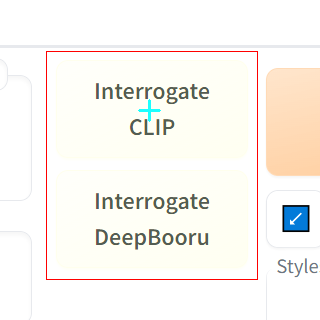

In [63]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVKwAAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRL00vkhpROQsQzAgD////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7+/vy8/Xs7vHo6e3l5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vo6e3s7vHy8/X7+/v////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7+/vt7vHm6Ozt7vHx8vT09vj29/j29/n29/j39/n29/j39/n29/n39/n29/n39/n39/n3+Pn29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vj19vj19vj19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf19ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pbz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy9Pby8/Xz9Pby8/Xz9Pby8/bz9Pby9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTv8fPt7/Hq7O/l5+vt7vH7+/v////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v709fbl5+vt7vH19vj29vj29vj29/j29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j19vf19vf19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fby8/Xz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pbx8vTy8/Xy8vXy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTq7O/l5+v09fb+/v7////////////////////////////////////////////////////////////////////////////////////////////////+/v7y8/Xo6u3z9PX29/j29/j29/j29/j29/n29/j29/n29/j29/n29/j39/n29/n39/n19vj29vj19vj29/j19vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff09ff09ff19vf09ff09fbz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pbz9Pby8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTv8PPn6e3y8/X+/v7////////////////////////////////////////////////////////////////////////////////////////+/v709fbo6u309vf29vj29/j29vj29/j29/j29/j29/j29/j29/j29/j29/j29/j29/j19vj19vf19vj19vf19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pby8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPv8PLn6e309fb+/v7////////////////////////////////////////////////////////////////////////////////+/v76+vrl5+vz9PX29/n29/j29/n29/j39/n29/n39/n29/n39/n29/n3+Pn29/n29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff19ff09ff09ff09ff19vf09ff19vf09ff19vf09ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pbz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vXx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8fTw8fTw8vTw8fTu8PLl5+v6+vr+/v7////////////////////////////////////////////////////////////////////////////+/v7t7vHt7/H29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j19vj19vf19vj19vf19vj19vf19vj19vj19vj19vj29vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pbz9Pbz9Pb09fbz9Pb09fby8/Xz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8vTw8fPw8vTw8fTw8vTw8fTx8vTw8vTx8vTw8vTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPq7O/s7fD+/v7////////////////////////////////////////////////////////////////////////+/v75+fnm6Oz29/n29/j29/n29/j39/n29/n39/n29/n39/n29/n29vj29vj29/j29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy9Pby8/Xz9Pby8/Xz9Pbx8vXy8/Xx8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTw8vTw8fTl5+v5+fn+/v7////////////////////////////////////////////////////////////////////9/f3x8vTs7vD29/j29/j29/j29/j29/j29/j29/n29/j19vj19vf19vj19vj19vj19vj29vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vj09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09ffz9Pb09ffz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/bz9Pbz8/by8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8/Xx8vTy8/Xx8vTy8/Xx8vXy8/Xx8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTx8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTq6+/x8vT9/f3////////////////////////////////////////////////////////////////+/v79/f3r7fDx8vX39/n29/n39/n29/n3+Pn39/n29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf19ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pbz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy9Pby8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTs7vHr7fD9/f3+/v7////////////////////////////////////////////////////////////+/v78/Pzo6e309vf29/j29/j29/j29/j19vf19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fby8/Xz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xy8vXy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPv8PPv8PPu8PLo6e38/Pz+/v7////////////////////////////////////////////////////////////+/v77+/vl5+v29/n39/n29/n29vj19vj29/j19vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff09ff09ff19vf09ff09fbz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pbz9Pby8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPl5+v7+/v+/v7////////////////////////////////////////////////////////////9/f37+/vl5+v29/j19vj19vf19vj19vf19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf09Pb09fb09fb09fb09fb09fb09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPw8fPl5+v7+/v9/f3////////////////////////////////////////////////////////////9/f37+/vl5+v29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vf09ff19vf09ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTl5+v7+/v9/f3////////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vj19vj19vj29vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pbz9Pbz9Pb09fbz9Pb09fby8/Xz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz8/by8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8vTw8fPw8fTw8fTw8vTw8fTx8vTw8vTx8vTw8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09Pbz9Pb09ffy8/Xz9Pbz9PXz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy9Pby8/Xz9Pby8/Xz9Pbx8vXy8/Xx8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8vXx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTw8vTw8fTx8vTw8vTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vj09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/by8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTx8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fbz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xy8vXy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff09fbz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf09Pb09fb09fb09fb09fb09fb09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fbz9Pb09fb09Pbz9Pbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff19vf09ff09fb09Pb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/by8/Xz9Pby8/Xy8/Xy8vXy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8vTw8fPw8fTw8fTw8vTw8fTx8vTw8fTx8vTw8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09dKfW2ZbWmZbfbXh9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy9Pby8/Xz9Pby8/Xz9Pbx8vXy8/Xx8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTw8vTw8fTx8vTw8vTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fb09fbz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz7MGGQVE3QVGMxPbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8dqiWlE3QVFtp97w8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09ff19vf09fb09ff09cuMQVE3QVE3abHi9fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb03bFuQVE3QVGMxPb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8sqLQVE3QVFtp9/x8vTx8vXx8vTx8vXw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fTv8fPw8fTv8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fbz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9PXz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9PbzxJY3QVE3QVGMxPbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xy8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw27BtQVE3QVFtp97w8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vfz9Pb09fbz9Pb09fb09fb09ff09cuMQVE3QVE3abHi9fb09ff09ffisYZbW2ZbbrHb9Pbnz7GGXVY3QVE3QVFDXYuw2Pbz9Pbz9Pb05sued3BbUlY3QVE3QVFDUmZbWmZbWmaeyvbz8/Xz9Pbz9PbhvptzUlY3QVE3QVFDUnyZvuDz9Pbz9Pby8/Xy8/XgsIZbWmZbdrXg8/XmxqBtT1Y3QVE3ebzm8+e2fGZbWmZ5rd/z8ezHmHZJR1E3QVGAtevy8/Xy8/Xy8OvOp4phT1Y3QVE3QVFDUnuYvt/y8/Xy8/Xx8vTx8vTx8vTx8vTx3MWddmtJR1E3QVE3R1taWmZaWmZaWmZbWmaAr+by8/Xw8fTl07uddnBVSVE3QVE3QVE9T3aYvd7x8vTx8vTx8tq2fntaV1s9QVE3QVE9T2ZaWmVaWmZ/ruTw8fTw8fTw8fTw28SXbmBDQVE3QVE3SWByj8Te7vTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf09Pb09fb09fb09fb09Pb09fb09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9MuMQVE3QVE3abHh9Pb09fb09PbhqHY3QVE3QYaeontDQVE3QVE3QVE3QVE3QVE3VZbJ7Pbz9Pbz3bFuQVE3QVE3QVE3QVE3QVE3QVE3QVGMw/Xy8/Xz8N+2eWA3QVE3QVE3QVE3QVE3QVE3QVZtp9/y8/Xy8/Xy8/Xgp3Y3QVE3QZa8w5ZVQVE3QVE3QVFbnNvy89+paFE3QVE3irvHimA3QVE3QVE3QWaj0/Xx8vTy6NCYY1Y3QVE3QVE3QVE3QVE3QVE3QVFVebvY7/Tx8vTx8vTx8vTx2bBtR1E3QVE3QVZVWmBDQVE3QVE3QVE3QVE3QVFtpt7w8eW1dlY3QVE3QVE3QVE3QVE3QVE3QVE3QVZ5seXx8vTw8sqLQVE3QVE3QVE3QVE3QVE3QVE3QVFtpt7w8fPw8fPYsYVVQVE3QVE3QVE3QVE3QVE3QVE9a7DY7vTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vf19ff19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff19vf09ff19vf09Pb09ff09fb09ff09fb09ff09fb09ff09ff09ff09cyMQVE3QVE3abHi9ffz9Pbz9PbhqHY3QVE3QVE3QVFDZpuwx9HQx7WRY1Y3QVE3QVGGufH09Pb07OHJvsWwiGY3QVE3QVFznMbCvsbCvsbV4/bz9PbbpXY3QVE3QVZzotHh7vbz7ufOnHY9QVE3QXap3fXy8/Xy8/Xgp3Y3QVE3QVZDSVE3SXCLp7zCvrzI2vbz9OCpaFE3QVE3SVZDQVFDZpCptcXBtcva8PXy8+u8f1Y3QVE3QVZhjbzU3evm18ujeWA3QVE3QVFhm9rx8vXx8vTx89ujYFE3QVE3VZbB5fXx8vXy5cWLVVE3QVFhm8/l5Orl7PTx8vTrw5VPR2Z5mLTO1url5OrZvZVhR1E3QVE3T5rO8vXx8uXTvcXBm3s3QVE3QVFah7TAvMTAvcTG2O7x8vTw2KptQVE3QVFDcKrN4e7x7+7fy6VtR1E3QVFtpt7w8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9MuMQVE3QVE3abHg8/Xz9Pbz9PXhqHY3QVE3QVFhkMvn8fbz9Pbz9PbzyptPQVE3QVFPk9Hy8/Xy8/Xy8/Xgp3Y3QVE3QVGLw/Xy8/Xy8/Xz8/Xy68CGR1E3QVFPkNHy8/Xy8/Xy8vXy89ujYFE3QVFbnNvy8/Xy8/Xgp3Y3QVE3QVE3R4q85fXy8/Xy8/Xx8vTx8t6oaFE3QVE3QVE9frvl7/Tx8vXx8vTx8/Xx1qphQVE3QVE9f8Dr8vXx8vTw8vTx79qjYFE3QVE3R4rB6vTx8vTx3rBtQVE3QVFnpN7x8vTx8vTx8vTYo3A3QVE3WqXS8fTw8fPw8fTw8enk4/Tw8fTw8vTw8fTw8vTNj1s3QVE3QXCo2fTw8vTw8fPvwpU3QVE3QVFtpt7w8fPw8fPw8fPw8e7AgVY3QVE3T5rN7vTw8fPw8fTv8PPXoGs3QVE3WqXS8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vf19vf19vf19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09cyMQVE3QVE3abHh9Pbz9Pbz9PbhqHY3QVE3QVGMxPb09Pbz9Pb09Pbz3bFuQVE3QVE3isvz8/Xz9Pbz8/XhqHY3QVE3QVGMxPbz9Pbz9Pbz9PbzwZE3QVE3QWaj1PXy8/Xy8/Xy8/Xy8/XIilE3QVE3hMXy8/by8/XgqHY3QVE3QVFzsObz9Pbx8vXy8/Xx8vXy89+paFE3QVE3QXuw4vXy8/Xy8/Xy8/Xy8/XapHA3QVE3QVaLw/Tx8vTx8vXx8vTx8vXfp3Y3QVE3QVGLwPXx8vXy3bBtQVE3QVFtp9/y8/Xw8fTx8vTep3Y3QVE3QZXH8vTx8vTx8vTx8vTx8vTx8vTx7+7l3NXHvcWofls3QVE3QVGKwvTw8fTw8fTwwpU3QVE3QVFtp97w8fTw8vTw8fTx78SKQVE3QVFam9rx8vTv8fPw8fPw8fPwwpU3QVE3QY/A7vPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19vf09ff19vf19ff19vf19ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fb09fbz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9PbhqHY3QVE3QVGMxPbz9Pbz9Pbz9Pby3bBtQVE3QVE3isvy8/Xz8/Xy8/Xhp3Y3QVE3QVGLw/Xz9Pbz8/Xz9Pbhp3Y3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3aLDg8/Xy8/Xgp3Y3QVE3QVGLw/Tx8vTx8vTx8vXx8vTx8t+oaFE3QVE3QZXI8/Xx8vXy8/Xx8vXy8/XIilE3QVE3QXao3PTx8vTx8vTx8vTx8vTxw5U3QVE3QVFtp97x8vTx8tadVVE3QVE9fr/q8fTw8fPw8eWucFE3QVE3c7vk8vTw8fTx8vTw8fTx3MSddmtJR1E3QVE3QVE3QVE3QVE3QVGKwvPw8fPw8fTwwpU3QVE3QVFtpt7w8fPw8fTw8fTw27BtQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QXWn2/Pw8fPv8fPw8fPw8fPw8fPw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vj09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf09ff19vf09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pb09Pbz9PbiqHY3QVE3QVGMxPb09ffz8/Xz9Pbz3bFuQVE3QVE3isvz9Pbz9Pbz9PbhqHY3QVE3QVGMxPbz9Pbz9Pby8/Xgp3Y3QVE3QVZJV2ZbWmZbWmZbWmZbWmZbWmZbWmZbksvz9Pby8/bhqHY3QVE3QVGLw/Xy8/Xy8/Xy8/Xy8/Xy89+paFE3QVE3QZbI8/Xy8/Xy8/Xy8/Xx8vXHilE3QVE3QXao3PXx8vXy8/Xx8vXy8/Xxw5Y3QVE3QVFtp9/x8/Xy8/Xsw5ZVQVE3QVFVbpqor7CQbmA3QVE3QWCQxe7x8vTx8vTx8vXZqXtDQVE3QVE3SWt5j7C6xdXGnnA3QVE3QVGKw/Tw8fTx8vTwwpU3QVE3QVFtp97w8vTx8vTx8vTx3LBtQVE3QVE9T2VaWmZaWmVaWmZaWmVaWmZaWmVaWprG7vTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19vf09ff09fbz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9PXz9PXz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9PbhqHY3QVE3QVGLw/Xy8/Xy8/Xy8/Xy3bBtQVE3QVE3isvy8/Xz8/Xy8/Xhp3Y3QVE3QVGLw/Xy8/Xy8vTy8/Xrt4o3QVE3QVuYzPXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTfp3Y3QVE3QVGLw/Tx8vTx8vTx8vXx8vTx8t+oaFE3QVE3QZXI8/Xx8vXx8vTw8fTx8vTTm2Y3QVE3QVuYy/Tx8vTx8vTx8vTx8vTlsoA3QVE3QVGFt+7x8vTw8fTw7tmiYlE3QVE3QVE3QVE3QVE9T3adxerw8fTw8vTw8fTx4bRyQVE3QVE9a6rY7vPv8fPw8fPepnU3QVE3QVGKwvPw8fPw8fTwwpU3QVE3QVFtpt7w8fPw8fTv8PPv6L+EQVE3QVFPkc/v8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLu7/Lt7/Hu7/Lu7/Hu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vfz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pb09Pbz9PbiqHY3QVE3QVGMw/Xz9Pbz8/Xz9Pbz3bFuQVE3QVE3isvz9Pbz9Pbz9PbhqHY3QVE3QVGLw/Xy8/Xy8/Xy8/Xy3bBtQVE3QVFPhMbs8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXgp3Y3QVE3QVGLw/Xy8/Xy8/Xy8/Xy8/Xy89+paFE3QVE3QZbH8vTx8vTx8vTx8vTx8vXxyJpPQVE3QVFPj9Dx8vXx8/Xx8vXx8+avcFE3QVE3QXuv4fTw8vTx8u7GjGA3QVFyr+Xx6url5Orl5+7x8vTx8vTx8vTx8vTx8vTxw5Y3QVE3QVGKwvPw8fTw8fTw8fTepnY3QVE3QVGKw/Tw8fTx8vTwwpU3QVE3QVFtp97v8fPw8fPw8fPw8d6oaFE3QVE3T4/A5vTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09fb09Pb09fb09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fbz9Pb09fb09Pbz9Pbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pbz9Pby8/Xgp3Y3QVE3QVGLw/Xz8/Xy8/Xz8/Xy3bBuQVE3QVE3isvy8/Xz9Pby8/Xyw5Y9QVE3QVFPhMXm8PXy8PXy8PXy8+u8f1Y3QVE3QVZtnNDm8PXy8/Xy8/Xr2bujtd7x8vTx8vXx8vTfp3Y3QVE3QVGLw/Ty8/Xx8vXy8/Xx8vXy89+paFE3QVE3QZXH8vTx8vTx8vTx8vTx8vTx8t6oaFE3QVE3QWCFtd7x8vXx7+XOm3Y9QVE3QVFPicnq8fTw8fTw8tWdVFE3QVF/serx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTwxZU9QVE3QVFhl9Tw8fPw8fPkwqBnSVE3QVE3QVGKwvTw8fTw8fTw27BtQVE3QVE3aKnX7fPv8fPv7fPw8fPqtoo9QVE3QVE9a6XM4PPw8fPv8fPw6966oLre8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ff09ff09ff19ff09ff19vf09ff19vf09ff19vf09Pb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09fbz9MuMQVE3QVE3abHh8/Xz9Pbz9PbhqHY3QVE3QVGMxPbz9Pbz9Pbz9Pbz3bFuQVE3QVE3isvz9Pby8/Xy8/Xy68uLT1E3QVE3QVE3QVE3QVaRx/by8/Xz6cuLVVE3QVE3QVE3QVZVWmZVSVE3QVE3R4q86PXy8/Xy8/Xgp3Y3QVE3QVGLw/Xy8/Xy8/Xy8/Xy8/Xx8t6oaFE3QVE3QZXH8vXx8vTx8/Xx8vXx8/Xx8vXy2rBySVE3QVE3QVE3QVE3QVE3QVE3QVE9V5XH5/Tx8vTx8vTx8u7BgVY3QVE3QVFDUmZaWmZaWmZaWmZaWnuFlbDG2/Tw8fTw6sqKT1E3QVE3QVE3SWBVSVE3QVE9SVY9QVE3QVGLw/Tx8vTx8vTw8d6oaFE3QVE3QVE3QVE3QVFtqeTw8fTw8enGiWA3QVE3QVE3QVFDUmZaUlY3QVE3QVaEt+nv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9MuMQVE3QVE3aLDg8/Xy8/Xy8/Xgp3Y3QVE3QVGLw/Xz8/Xy8/Xz8/Xy3bBuQVE3QVE3isvy8vXy8/Xy8vXy8/XsyaBoSVE3QVE3QVE3QVFhotvy8/Xy8/Xy8Nu8h3ZJR1E3QVE3QVE3QVE9T3aLr9Xl7/Tx8vXx8vTfp3Y3QVE3QVGLw/Ty8/Xx8vXx8vTw8fTx8t6oaFE3QVE3QZXH8vTx8vTx8vTx8vTx8vTx8vTx8vTx5Mqjc2Y9QVE3QVE3QVE3QVZnhrrY7vTw8fPw8fTw8fTw8vTw4MB/TFE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3R3Ci0vPw8fPqzalySVE3QVE3QVE3R1ttj8Te7smKQVE3QVGKwvTv8PPv8PPv8PPv17p/V1Y3QVE3QVE3QVE3gb/q8fPv8PPw8fPXtI9tT1Y3QVE3QVE3QVE3R1tshrPM4vPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19ff09ff19ff09ff19vf09ff19vfz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8PDm5evm5ezm6O/z9Pby8/Xz9Pbx8vXy8/Xx7+/m5evm5evm6O/y8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw7Orl5Orl5Orr7/Tx8vTx8vTx8vTx8vTx8vTx796oa1Y3QWCLvd7Zy8XBvcTAvMTAvLuohHA9QVE3QVFPks/w8vTw8fTw7+7k4+rl5Orq7vTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPq4+rk4+nk4+7w8fPw8fTw8fTw8fTw8fTv8PPq4unj4unj4unq7vPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fb09fbz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTlsoA3QVE3aLDf8vTw8fPw8fPw8fPw8fPw8cqKQVE3QVFPks/w8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLt7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19vf09ff19vf09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/bx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTfp3Y3QVE3T5DA4/Tw8vTw8fTw8vTw8fTZpHY9QVE3QWCXy/Tx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pbz9PXy8/Xz9PXz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xx8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw269sR1E3QVE3R1thdo+QjJWQhoBhT1Y3QVE3QVZtm9Xq8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLu7/Lt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7/Ht7vHt7/Ht7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09fbz9Pb09fb09Pb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw28SXbWBDQVE3QVE3QVE3QVE3QVZhdqC60urx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fbz9Pb09fb09Pbz9Pbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw7u3k4+rk4+nk4+7w8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09fbz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xy8vXy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09fbz9Pb09fb09fbz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9PXy8/Xz9PXz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xx8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7vHt7vHs7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09Pbz9Pb09Pbz9Pb09fbz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8vXy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pbx8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTx8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPv8PLu8PLv8PLu8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw7uTNrpp5ZWBDQVE3QVFDUnuFnsTe7/Tw8fTx8vTw8fTfr4VaWmZaWmacx/Pw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPeroVaWmVaWmadx/Pw8fTw8fTv8PPGlGVaWmVaWmVaWmVaWmVndo+PjJWcpsPS3+3v8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw1bR/VFE3QVE3QVE3QVE3QVE3QVE3QVE3SXuo1fPw8fTw8fTepnY3QVE3QVGKwfPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPepnU3QVE3QVGKwvPv8PLv8PLv8PPGiVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVZae7rX7fPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw2LBtR1E3QVE3QVFDXYCQp7vAvbSjfnBDQVE3QWCLw+rx8vTw8fPepnU3QVE3QVGKwvPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTepnY3QVE3QVGKwfPv8fPv8PPv8fPGiVE3QVE3QVtthJWPjJWQjJWPfntVSVE3QVE3QVFVicnq8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8vTy8/Xy8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8d6oaFE3QVE3QVZtm9Xq8fPw8fTw8fPw8fTw1bSdsd7v8PPv8PPv8PPepXU3QVE3QVGKwfPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPepXU3QVE3QVGKwfLv8PPv8PLv8PPGiVE3QVE3QXWn2vPv8PPv8PPv8PPv7dmiaFE3QVE3QX+z4vLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8fTw8fTquoo9QVE3QVE9fsDr8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPepnU3QVE3QVGKwvPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPepXU3QVE3QVGKwfPv8fPv8PPw8fPGiVE3QVE3QXWo2/Pv8fPw8fPv8fPv8PPdqHU3QVE3QVGKwfPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPGiVY3QVE3QVuXx/Tw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPepnU3QVE3QVGKwvPw8fPv8fPw8fPw8fPw8fPv8PLv8PPv8PLepXU3QVE3QVGKwfPv8PPv8PPv8PPGiVE3QVE3QXWn2/Pv8PPu8PLu7/Lu8PLptYk3QVE3QVGKwfLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8t6oY1E3QVE3QZDB7/Tx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPepnY3QVE3QVGKwvTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPepnU3QVE3QVGKwvPw8fPv8fPw8fTGiVE3QVE3QXWn2vPv8PLv8PPv8PPv8O3GiVs3QVE3QXCn1/Pv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTx8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8cmKQVE3QVE3aLDe8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPepnU3QVE3QVGKwvPw8fPu8PLv8PLu8PLv8PLv8PLv8PPv8PLepXU3QVE3QVGKwfPv8PPv8PPv8PPGiVE3QVE3QXWn2vLu7/Lu8PLu59jFl3tDQVE3QVE3aK7e8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHr7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8sqLQVE3QVE3aK/e8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPepnY3QVE3QVGKwfPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPepnU3QVE3QVGKwvPw8fPv8fPv8PPFiVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3SXuu1/Pv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8M+XT1E3QVE3R5XG8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPepnU3QVE3QVGKwfLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPepXU3QVE3QVGKwfPu8PLu7/Lu8PLFiFE3QVE3QVE3QVE3QVE3QVE3QVE3R1tshrPM4vPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/bz9Pbz9Pby8/Xx8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8em1c1E3QVE3QXao2/Pw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPepnU3QVE3QVGKwfPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPepnY3QVE3QVGKwfLv8PPv8PPv8PPGiVE3QVE3QXCizOnj4unj4unj4u3v8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPepnU3QVE3QVFgoNnw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8PLv8PLv8PLepXU3QVE3QVGKwfLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPdpXU3QVE3QVGJwPLu8PLu7/Lu8PLFiFE3QVE3QXWn2vLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw4Lt5R1E3QVE3R3Wo2PTw8fPw8fTw8fTw8fTv7em/pbrX7fPv8fPv8PPepnU3QVE3QVGKwfPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLepXU3QVE3QVGKwfLv8PPv8PPv8PPGiVE3QVE3QXWn2vPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vHs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPXpnU9QVE3QVE3R2V/oMnY4+nj4ujXwa+KYlY3QVFUicjq8PPv8PPepXU3QVE3QVFymsO/vMO/vMO/vMO/vMO+vMO+w93p8PLu7/LdpXU3QVE3QVGJwfLv8PLu8PLv8PPFiVE3QVE3QXWn2vPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8erNknA9QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVZsm9Tq8fPv8fPepnU3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3aK/e8PPv8PPepXU3QVE3QVGKwfPv8PPv8PPv8fPGiVE3QVE3QXWn2vLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTx8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPizK6EXVY3QVE3QVE3QVE3QVFDXYmnzOnv8PLv8PPv8PPepXU3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3Z67d8PLu7/LdpXU3QVE3QVGJwfLv8PLu8PLv8PPEiFE3QVE3QXWn2fLu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDr7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv6unj4+nj4unj6fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPu8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDr7O/l5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vXx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vHs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDr7O/q7O/r7O/r7O/r7O/r7O/r7O/r7O/r7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lt7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHr7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7O/r7fDr7fDr7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDr7O/r7O/r7O/r7O/r7PDr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDq7O/q7O/l5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vro6e3v8fTy8/Xx8vXy8/Xw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7vHt7/Lt7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vHs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDq7O/r7O/r7O/q7PDo6e36+vr9/f3+/v7////////////////////////////////////////////////////////9/f37+/vq7O/t7/Hx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDr7fDr7fDr7fDr7fDq7O/q7O/q7O/q7O/q7O/p6+7q7O/7+/v9/f3////////////////////////////////////////////////////////////9/f37+/vv8PLq7O/x8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fHr7O/r7PDr7O/r7fDr7O/r7fDr7PDo6u3v8PL7+/v9/f3////////////////////////////////////////////////////////////+/v77+/v29vbl5+vw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDr7O/q7O/r7O/r7O/r7O/r7O/r7O/r7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDq7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/l5+v29vb7+/v+/v7////////////////////////////////////////////////////////////+/v78/Pz5+fnr7O/r7O/x8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPu7/Lu7/Lt7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHr7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDq7O/r7O/r7O/r7PDr7O/r7PDr7O/r7fDr7O/r7fDo6e3q6+/5+fn8/Pz+/v7////////////////////////////////////////////////////////////+/v79/f36+vr19fXl5+vu7/Lx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Hs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vDs7vHr7e/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7O/r7fDr7fDr7fDr7fDr7fDq7O/q7O/q7O/q7O/q7O/r7O/q7O/r7O/q7O/r7O/q7O/q6+7l5+v19fX6+vr9/f3+/v7////////////////////////////////////////////////////////////////9/f37+/v4+Pjw8fLn6e3v8fTx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTw8vTw8fTx8vTw8vTx8vTw8vTx8vTw8vTx8vTw8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fDr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDr7fDr7fDq7fDn6ezw8fL4+Pj7+/v9/f3////////////////////////////////////////////////////////////////////+/v78/Pz6+vr39/fu7/Hn6e3u8PLx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDr7O/r7O/r7O/r7O/r7PDr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDq7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/r7O/q7O/r7O/q7O/q6+7n6ezu7/H39/f6+vr8/Pz+/v7////////////////////////////////////////////////////////////////////////+/v78/Pz5+fn39/fv8PHl5+vq7O/w8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDq7O/r7O/r7O/r7PDr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDo6u3l5+vv8PH39/f5+fn8/Pz+/v7////////////////////////////////////////////////////////////////////////////+/v79/f37+/v5+fn39/fz8/Pq6+7l5+vq6+7s7vHv8PPw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Hu7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7O/r7fDr7fDr7fDr7fDr7fDq7O/q7O/q7O/q7O/q7O/r7O/q7O/r7O/q7O/r7O/q7O/r7O/q7O/p6+7n6e3l5+vq6+7z8/P39/f5+fn7+/v9/f3+/v7////////////////////////////////////////////////////////////////////////////////+/v79/f37+/v5+fn39/f29vbz8/Pt7vDq7O/n6Ozl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vn6Ozq7O/t7vDz8/P29vb39/f5+fn7+/v9/f3+/v7////////////////////////////////////////////////////////////////////////////////////////+/v79/f38/Pz6+vr4+Pj39/f29vb19fX19fX09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT19fX19fX29vb39/f4+Pj6+vr8/Pz9/f3+/v7////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v78/Pz7+/v6+vr5+fn4+Pj39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f4+Pj5+fn6+vr7+/v8/Pz+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v79/f39/f38/Pz7+/v7+/v7+/v6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr7+/v7+/v7+/v8/Pz9/f39/f3+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v7+/v79/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f3+/v7+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7+/vy8/Xs7vHo6e3l5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vo6e3s7vHy8/X7+/v////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7+/vt7vHm6Ozt7vDx8vT09vf29/j29/j29/j29/n29/j29/n29/j39/n29/j39/n29/n39/n19vj29vj29vj29/j29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pbz9Pby8/Xz9Pbz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy9Pby8/Xy9Pby8/Xz9Pby8/Xz9Pbx8/Xy8/Xx8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTx8vTx8vTx8vTx8vTv8fPt7/Hq7O/l5+vt7vH7+/v////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v709fbl5+vt7/H29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/j29/j29/j19vf19vj19vf19vj19vj29vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09ffz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9PXy8/Xz9Pby8/Xz9Pbz8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8vTw8fTx8vTw8fTw8vTw8fTx8vTw8vTx8vTq7O/l5+v09fb+/v7////////////////////////////////////////////////////////////////////////////////////////////////+/v7y8/Xo6u3z9PX29/n29/j29/n29/j39/n29/j39/n29/n39/n29/n39/n39/n3+Pn29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vj19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf19ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09ffz9Pb09ff09Pbz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXv8PPn6e3y8/X+/v7////////////////////////////////////////////////////////////////////////////////////////+/v709fbo6u309ff29vj29/j29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j19vf19vf19vf19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09fb09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fby8/Xz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pbx8vTy8/Xy8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vXy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTv8fPw8fPu8PLn6e309fb+/v7////////////////////////////////////////////////////////////////////////////////+/v76+vrl5+vz9PX29/j29/j29/n29/j29/n29/j39/n29/j29/n29/n39/n29/n29vj19vj29/j19vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff09fbz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pbz9Pby8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fTw8fTw8fTu7/Ll5+v6+vr+/v7////////////////////////////////////////////////////////////////////////////+/v7t7vHt7/H29vj29/j29/j29/j29/j29/j29/j29/j29/j29/j29/j19vj19vf19vj19vf19vj19vf19vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTq7O/s7fD+/v7////////////////////////////////////////////////////////////////////////+/v75+fnm6Oz29/n29/j29/n29/n39/n29/n39/n29/n3+Pn29/n29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff19vf09ff19vf09ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pbz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vXy8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTl5+v5+fn+/v7////////////////////////////////////////////////////////////////////9/f3x8vTs7vD29/j29vj29/j29/j29/j29/j29/j29/j19vj19vf19vj19vf19vj19vf19vj19vj29vj19vj19vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fby8/Xz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8/Xx8vTx8/Xx8vTy8/Xx8vXy8/Xx8/Xx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTx8vTw8fTw8vTw8fTx8vTw8vTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPq6+7x8vT9/f3////////////////////////////////////////////////////////////////+/v79/f3r7fDx8vT39/n29/j39/n29/n39/n29/n29vj29vj29/j29vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pbz9Pby8/Xz9Pbz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy9Pby8/Xy9Pby8/Xz9Pby8/Xz9Pbx8/Xy8/Xx8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTw8vTw8fTw8vTw8vTx8vTw8vTx8vTw8vTs7vHr7fD9/f3+/v7////////////////////////////////////////////////////////////+/v78/Pzo6e309vf29/j29/j29/j29/j19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09ffz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9PXy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/by8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8vTw8fTx8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPu8PLo6e38/Pz+/v7////////////////////////////////////////////////////////////+/v77+/vl5+v39/n3+Pn29/n29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vj19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf19ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pbz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXx8vXw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTl5+v7+/v+/v7////////////////////////////////////////////////////////////9/f37+/vl5+v29/j19vf19vf19vf19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fby8/Xz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xy8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPv8PPv8PPv8PPv8PPv8PPv8PPv8fPl5+v7+/v9/f3////////////////////////////////////////////////////////////9/f37+/vl5+v19vj29/j19vj29/j29vj29/j29vj29/j29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff09fbz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXx8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTl5+v7+/v9/f3////////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vj29vj19vj29vj19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vfz9Pb09fb09fb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29/j29/j29/j29/j29/j29/n29/j29/n29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vf09ff19vf09ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vXy8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj19vj19vj19vj19vj29vj19vj29vj09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09fby8/Xz9Pby8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8/Xx8vTx8vXx8vTy8/Xx8vXy8/Xx8/Xx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8vTw8fTx8vTw8fTw8vTw8fTx8vTw8vTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPv8PPv8PPv8fPv8PPv8PPv8PPv8fPv8PPv8fPv8fPw8fPv8PPw8fPv8fPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29/j29/j29/j29/j29/j29/n19vf19vj19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff09fbz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09fbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy9Pby8/Xy8/by8/Xz9Pby8/Xz9Pbx8/Xy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8fTw8fTw8vTw8fTw8vTw8vTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj29/j19vj29/j19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09ff09fbz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/by8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fTw8fPv8PPv8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29/j29/n19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj29/j19vj29/j29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vj19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf19ff09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXx8vXw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xx8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vj19vj19vj19vj19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff09fbz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXx8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19ff09ff19vf19ff19vfz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fb09fbz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj29vj19vj29vj19vj29vj19vj29/j29vj19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vf09ff19vf09dKfW2ZbW2Zbfbbi9fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vf19vf19vf19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ffz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9Pby8/Xz9Pbz9PXz9Pbz9PXz7MGGQVE3QVGMxPbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vXy8/Xx8vXx8vTw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fPw8fTw8fPw8fTw8fPw8fTw8dmiWlE3QVFtp97w8fTw8vTw8fTx8vTw8vTx8vTv8fPw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj29vj19vj29vj19vj19vf09ff19vf19ff19vf19ff19vf19vf19vf19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vfz9Pb09fb09MuMQVE3QVE3abHi9fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz3bFuQVE3QVGMxPb09fbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8sqLQVE3QVFtp9/x8vTx8vXx8vTx8vXw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPu8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf19ff19vf09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pb09fbz9Pb09fbz9Pb09ff09fbz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9PbzxJY3QVE3QVGMxPbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/by8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw27BtQVE3QVFtp97w8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fTw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v29vj19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vf09ff19vf19ff19vf09fb09ff09fb09ff09fb09ff09cuMQVE3QVE3abHi9ff09ff09ffisYZbW2ZbbrHb9Pbnz7GGXVY3QVE3QVFDXYuw2Pb09Pbz9Pb058yed3BbUlY3QVE3QVFDUmZbWmZbWmaeyvbz9Pbz9Pbz9PbhvptzUlY3QVE3QVFDUnyZvuDz9Pbz9Pby8/Xy8/XgsIZbWmZbdrXg8/XmxqFtT1Y3QVE3ebzn9Oe2fGZbWmZ5reDz8ezImHZJR1E3QVGAtevy8/Xy8/Xy8OvOp4phT1Y3QVE3QVFDUnuYvt/y8/Xy8/Xx8vTx8vTx8vXx8vTx3MWddmtJR1E3QVE3R1taWmZbWmZaWmZbWmaAsOby8/Xw8vTl07uddnBVSVE3QVE3QVE9T3aYvd7x8vTx8vTx8tq2fntaV1s9QVE3QVE9T2ZaWmZaWmZ/ruXw8vTw8fTw8vTw28SYbmBDQVE3QVE3SWByj8Te7/Tx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTw8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vfz9Pb09fb09Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pb09fbz9PbhqHY3QVE3QYaeontDQVE3QVE3QVE3QVE3QVE3VZbJ7Pbz9Pbz3bFuQVE3QVE3QVE3QVE3QVE3QVE3QVGLw/Xy8/Xy8N+2eWA3QVE3QVE3QVE3QVE3QVE3QVZtp9/x8vTy8/Xy8vXgp3Y3QVE3QZa8w5ZVQVE3QVE3QVFbnNvy89+paFE3QVE3irvHimA3QVE3QVE3QWaj0/Tx8vTx59CYY1Y3QVE3QVE3QVE3QVE3QVE3QVFVebvY7vTx8vTw8vTx8vTx2bBtR1E3QVE3QVZVWmBDQVE3QVE3QVE3QVE3QVFtpt7w8eW1dlY3QVE3QVE3QVE3QVE3QVE3QVE3QVZ5seXw8vTw8cqLQVE3QVE3QVE3QVE3QVE3QVE3QVFtpt7w8fPw8fPYsYVVQVE3QVE3QVE3QVE3QVE3QVE9a6/Y7vTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19ff19vf19ff19vf19vf19vf19vf19vf19vf19vj19vf19vj09fb09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vfz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09cuMQVE3QVE3abHi9ffz9Pbz9PbhqHY3QVE3QVE3QVFDZpuwx9HPx7WRY1Y3QVE3QVGGufDz9Pb07OHIvsWwiGY3QVE3QVFznMXCvsbCvsbV4/bz9PbbpXY3QVE3QVZzotHh7vbz7ufOnHY9QVE3QXap3fXy8/Xy8/Xgp3Y3QVE3QVZDSVE3SXCLp7zCvrzI2vXz9OCoaFE3QVE3SVZDQVFDZpCptcXBtcva8PXy8+u8f1Y3QVE3QVZhjbzU3evm18ujeWA3QVE3QVFhm9rx8vXx8vTx8tujYFE3QVE3VZbB5fXx8vXx5cWLVVE3QVFhm8/l5Ork7PTx8vTqw5VPR2Z5mLTO1url5OrZvZVhR1E3QVE3T5rO8vTx8uXTvcXBm3s3QVE3QVFahrTAvMTAvMTG2O7w8vTw2KptQVE3QVFDcKrN4O7x7+7ey6VtR1E3QVFtpt7w8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19ff09ff19ff09ff19ff09ff19vf09ff19vfz9Pb09fb09Pb09fb09fb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9MuMQVE3QVE3abHh8/Xz9Pbz9PXhqHY3QVE3QVFhkMvn8fbz9Pbz9PbzyptPQVE3QVFPk9Hy8/Xy8/Xy8/Xgp3Y3QVE3QVGLw/Xz8/Xy8/Xz9Pby68CGR1E3QVFPkNHz8/Xy8/Xy8/Xy89ujYFE3QVFbnNvy8/Xy8/Xgp3Y3QVE3QVE3R4q85fXy8/Xy8/Xx8vTx8t6oaFE3QVE3QVE9frzl7/Ty8/Xx8vTy8/Xx1qthQVE3QVE9f8Dr8/Xx8vTx8vTx79qjYFE3QVE3R4rB6vTx8vTx3rBtQVE3QVFnpN7x8vXx8vTx8vXYo3A3QVE3WqXS8fTw8fTw8vTw8erk5PTw8fTx8vTw8fTx8vTNj1s3QVE3QXCo2fTx8vTw8fPwwpU3QVE3QVFtpt7w8fPw8fTw8fPw8e7AgVY3QVE3T5rN7vTw8fTw8fTv8PPXoGs3QVE3WqXS8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vf19vj19vf19vj09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19ff09ff19vf09ff19vf09fb09ff09Pb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09cyMQVE3QVE3abHh9Pbz9Pbz9PbiqHY3QVE3QVGMxPb09ffz9Pb09ff03bFuQVE3QVE3isvz9Pbz9Pbz9PbhqHY3QVE3QVGMxPbz9Pbz9Pbz9PbzwZE3QVE3QWaj1PXy8/Xy8/Xy8/Xy8/XIilE3QVE3hMXz9Pby8/XhqHY3QVE3QVFzsOfz9Pby8/Xy8/Xy8/Xy89+paFE3QVE3QXuw4vXy8/Xy8/Xy8/Xy8/XapHA3QVE3QVaLw/Tx8vTx8vXx8vTx8vXfp3Y3QVE3QVGLwPXx8vXy3bBtQVE3QVFtp9/y8/Xw8vTx8vTfp3Y3QVE3QZXH8vTx8vTx8vTx8vTx8vTx8vTx7+/l3NXHvcWofls3QVE3QVGKwvTw8fTw8vTwwpU3QVE3QVFtp97w8fTx8vTw8vTx78SKQVE3QVFam9rx8vTw8fPw8fPw8fPwwpU3QVE3QZDA7vPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19ff09ff19ff09ff19vf09ff09fb09Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9Pby88uMQVE3QVE3abHh9PXz9Pbz9PbhqHY3QVE3QVGMxPbz9Pbz9Pbz9Pby3bBtQVE3QVE3isvy8/Xy8/Xy8/Xgp3Y3QVE3QVGLw/Xz9Pby8/Xz9Pbgp3Y3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3aLDg8/Xy8/Xgp3Y3QVE3QVGLw/Tx8vTx8vTx8vTx8vTx8t6oaFE3QVE3QZXH8vXx8vTy8/Xx8vXy8/XHilE3QVE3QXao3PTx8vTx8vTx8vTx8vTxw5U3QVE3QVFtp97x8vTx8tWdVVE3QVE9fr/q8fTw8fPw8eWucFE3QVE3c7rk8vTw8fTw8vTw8fTw3MSddmtJR1E3QVE3QVE3QVE3QVE3QVGKwvPw8fPw8fPwwpU3QVE3QVFtpt7w8fPw8fTw8fPw27BtQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QXWn2vPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vf19vj19vf19vj19vf09ff09ff09ff09ff09ff09ff09ff09ff19ff09ff19ff09ff19vf09ff19vfz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9PbiqHY3QVE3QVGMxPb09ffy8/Xz9Pbz3bBuQVE3QVE3isvz9Pbz9Pbz9PbhqHY3QVE3QVGMxPbz9Pbz9Pby8/Xgp3Y3QVE3QVZJV2ZbWmZbWmZbWmZbWmZbWmZbWmZbksvz9Pby8/XhqHY3QVE3QVGLw/Xy8/Xy8/Xy8/Xy8/Xy89+paFE3QVE3QZbI8/Xy8/Xy8/Xy8/Xx8vTHilE3QVE3QXao3PXx8vTx8vXx8vTx8/Xxw5Y3QVE3QVFtp9/x8vXy8/Xrw5ZVQVE3QVFVbpqor7CQbmA3QVE3QWCQxe7x8vTx8vTx8vTZqXtDQVE3QVE3SWt5j7C6xdXGnnA3QVE3QVGKwvTw8fTw8vTwwpU3QVE3QVFtp97w8fTx8vTw8vTx3LBsQVE3QVE9T2VaWmVaWmVaWmVaWmVaWmZaWmVaWprG7vTw8fTw8fTw8fTw8fTv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19ff19vf19ff09fb09fb09fb09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fb09fbz9Pbz9PXz9Pbz9PXz9Pbz9MuMQVE3QVE3abHh9Pbz9Pbz9PbhqHY3QVE3QVGLw/Xy8/Xy8/Xy8/Xy3bBuQVE3QVE3isvy8/Xz9Pby8/XhqHY3QVE3QVGMw/by8/Xy8/Xy8/XsuIo3QVE3QVuYzPXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTfp3Y3QVE3QVGLw/Tx8vXx8vTy8/Xx8vTy89+oaFE3QVE3QZbI8/Xy8/Xx8vTx8vTx8vTTm2Y3QVE3QVuYy/Tx8vTx8vTx8vTx8vTlsoA3QVE3QVGFt+/x8vTw8fTw7tmiYlE3QVE3QVE3QVE3QVE9T3adxerw8fTx8vTw8vTx4bRyQVE3QVE9a6rY7vPw8fPw8fPepnU3QVE3QVGKwvTw8fPw8fTwwpU3QVE3QVFtpt7w8fTw8fTv8PPv6b+EQVE3QVFPkc/w8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v19vj09ff09ff09ff09ff09ff09ff19ff09ff19vf09ff19vf09ff19vf09ff19vf09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9MuMQVE3QVE3abHh9Pb09ff09PbiqHY3QVE3QVGMxPbz9Pbz9Pbz9Pbz3bFuQVE3QVE3isvz9Pbz9Pbz9PbhqHY3QVE3QVGLw/Xy8/Xy8/Xy8/by3bBtQVE3QVFPhcbs8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xgp3Y3QVE3QVGLw/Xy8/Xy8/Xy8/Xy8/Xy89+paFE3QVE3QZbH8vTx8vTx8vXx8vTx8vXxyJpPQVE3QVFPkNDx8vXy8/Xx8vXy8+avcVE3QVE3QXuv4fTx8vTx8u7HjGA3QVFyr+Xx6url5Orl5+7x8vTx8vXx8vTx8vXx8vTxw5Y3QVE3QVGKwvTw8vTw8fTw8vTepnY3QVE3QVGLw/Tw8vTx8vTww5U3QVE3QVFtp97w8fPw8fPw8fPw8d6oaFE3QVE3T4/A5vTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTw8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09Pb09fbz9Pb09fb09fb09fb09fb09ff09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9PXz9Pbz9MuMQVE3QVE3abHh9Pbz9Pby8/Xgp3Y3QVE3QVGLw/Xy8/Xy8/Xy8/Xy3bBuQVE3QVE3isvy8/Xz9Pby8/Xyw5Y9QVE3QVFPhMXm8PXy8PXy8PXy8+u8f1Y3QVE3QVZtnNDm8PXy8/Xy8/Xr2bujtd7x8vTx8vTx8vTfp3Y3QVE3QVGLw/Tx8vXx8vTy8/Xx8vTy89+oaFE3QVE3QZXH8vTw8vTx8vTx8vTx8vTx8t6oaFE3QVE3QWCFtd7x8vTx7+XOm3Y9QVE3QVFPicnq8fTw8fPw8dWdVFE3QVF/serw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTwxZU8QVE3QVFhl9Tw8fPw8fPkwp9nSVE3QVE3QVGKwvTw8fPw8fTw269tQVE3QVE3aKnX7fPv8PPv7fPv8fPqtoo8QVE3QVE9a6XM3/Pw8fPv8fPw6966oLre8PLv8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ff09ff09ff09ff09ff09ff09ff19vf09ff19vfz9Pb09fbz9Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9MuMQVE3QVE3abHg8/Xz9Pbz8/XhqHY3QVE3QVGMxPbz9Pbz9Pbz9Pbz3bFuQVE3QVE3isvz9Pby8/Xy8/Xy68uLT1E3QVE3QVE3QVE3QVaRxvby8/Xy6MuLVVE3QVE3QVE3QVZVWmZVSVE3QVE3R4q86PXy8/Xy8/Xgp3Y3QVE3QVGLw/Xy8/Xy8/Xy8/Xy8/Xx8t6oaFE3QVE3QZXH8vTx8vTx8vXx8vTx8vXx8vXx2rBySVE3QVE3QVE3QVE3QVE3QVE3QVE9V5XG5/Tx8vTx8vTx8u7BgVY3QVE3QVFDUmZaWmZaWmZaWmZaWnuFlbDG2/Tw8fPw6cqKT1E3QVE3QVE3SWBVSVE3QVE9SVY9QVE3QVGLw/Tw8vTx8vTv8d6oaFE3QVE3QVE3QVE3QVFtqeTw8fTw8enGiWA3QVE3QVE3QVFDUmZaUlY3QVE3QVaEtunv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09fb09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09Pbz9Pb09fbz9Pb09fb09Pbz9Pbz8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9MuMQVE3QVE3aLDg8/Xy8/Xy8/Xgp3Y3QVE3QVGLw/Xz9Pby8/Xz9Pby3bBuQVE3QVE3isvy8/Xy8/Xy8/Xy8/XsyaBoSVE3QVE3QVE3QVFhotvy8/Xy8/Xy8Nu8h3ZJR1E3QVE3QVE3QVE9T3aLr9bl7/Ty8/Xx8vTgp3Y3QVE3QVGLw/Xy8/Xx8/Xx8vTx8vTx8t6oaFE3QVE3QZXH8vTx8vTx8vTx8vTx8vTx8vTx8vXx5Mqjc2Y9QVE3QVE3QVE3QVZnhrvY7/Tw8fTw8vTw8fTx8vTw4MCATFE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3R3Ci0vPw8fPqzalySVE3QVE3QVE3R1ttj8Te7sqKQVE3QVGKwvTv8PPv8fPv8PPv2Lp/V1Y3QVE3QVE3QVE3gb/q8fPv8fPw8fPYtI9tT1Y3QVE3QVE3QVE3R1tshrPM4vPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19vf09ff19ff09ff19vf09ff19vf09Pb09ff09Pb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8fDm5evn5uzm6PDz9Pby8/bz9Pby8/Xy8/Xy8O/m5evm5evm6O/y8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx7Orl5Orl5Orr7/Tx8vTx8vTx8vTx8vTx8vTx79+oa1Y3QWCLvd7Zy8XBvcTAvMTAvLuohHA9QVE3QVFPks/x8vTw8fTx7+7k5Orl5Orq7/Tx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPq4+rk4+nk4+7w8fTw8fTw8fTw8fTw8fTv8fPq4unj4+nj4unq7vPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/by8/Xz9Pby8/Xy8/Xy8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vXy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTlsoA3QVE3aLDe8vTw8fPv8fPw8fPw8fPw8cmKQVE3QVFPks/w8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff19vf09ff19vfz9Pb09fb09Pb09fb09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTx8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTfp3Y3QVE3T5DA4/Tw8fTw8fTw8fTw8fTYpHY9QVE3QWCXyvTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPt7/Hu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pb09fbz9Pb09fb09fbz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw269tR1E3QVE3R1thdpCQjJWQhoBhT1Y3QVE3QVZtm9Xq8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLt7vHt7/Ht7vHt7/Ht7/Hu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw28SXbmBDQVE3QVE3QVE3QVE3QVZhdqC60+rx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9PXz9PXz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xx8vTy8/Xy8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw7u3k4+rk4+nk4+7w8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLu7/Lt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fb09ff09fb09ff09fb09ff09fb09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pbx8vXy8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09Pbz9Pb09Pbz9Pb09fbz9Pb09fb09Pbz9Pbz8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ff09ff09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09fbz9Pb09fbz9Pbz9PXy8/Xz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xy8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09ff09ff09ffz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXy8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+v09fbz9Pbz9PXz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbz8/Xz9Pbz8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vXy8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Lt7/Hu7/Lt7/Ht7/Lt7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9PXz9Pbz8/Xz9Pbz9PXz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xy8/Xx8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pb09Pbz9Pb09Pbz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Lt7/Ht7/Lt7/Ht7/Lt7/Lu7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Ll5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09fbz9Pb09ff09Pb09ffz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pb09ffy8/Xz9Pbz8/Xz9Pbz8/Xz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXx8vXy8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fTw8fTw8fTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pbz8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPw8fPv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy89CeWmZbWmZbWmZbWnB5h5aQjJWjr8vT4fTx8vXx8vTy8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8c+dWmVaWmZaWmVaWmZaWmVyfpWQjJ+otM/Y6/Tw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Lt7/Hu7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz8/Xy8/Xz9Pby8/Xz9Pbx8vTy8/Xx8vTy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8sqLQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVZafLDO5PTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTw8fPv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTv8PPv8PPv8PPv8MmKQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVZyqd7v8fPv8PLu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy88uLQVE3QVE3T3aFjJWQjJWLdmtJR1E3QVE3QVE3VZbH6PXx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8cmKQVE3QVE3Wo+uvMTAvMO6pqCQfnBDQVE3QVE3QWCXyfPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Lt7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Hl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8sqLQVE3QVE3aLDf8vTx8vTx8vTx79qveWA3QVE3QVE9c7zl8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTv8PPv8fPv8PPv8fPv8PPw8fPv8PPv8cmKQVE3QVE3aK/e8fPv8fPw8fPv8fPqtok8QVE3QVFamtjv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pbz9Pbz9Pbz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/Xz9Pby8/Xz9Pby9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8sqLQVE3QVE3aLDf8vTx8/Xx8vXy8/Xx79+paFE3QVE3QVuYzPXx8vTx8vTx8vTx8vTx5NWofmtJR1E3QVE3R1thfrDO5PXx8vTx8vXx8vTx8vXx8vTw7urNpophT1Y3QVE3QVZJYIqozurw8fTx8vTw8vTx8uW1fGZaWmZyp9rx5Nq6j3VJR1E3QVE3SWByj8Pe7vTw8fPw8fTw8fPw8cqKQVE3QVE3aLDe8fTw8fTw8vTv8PPv269sQVE3QVE8jMnv8fPv8fPw8fPv8fPw7unMpophT1Y3QVE3QVFDUnuXvN7v8PLv8PPv8PPv8PPv8PPv8PPv8PPevJpyUlY3QVE3QVE8T2uEpdTj7vPu7/Lu8PLu7/Lu8OOze2VaWmV4q93v7ejFl3VIR1E3QVF/s+nv8OO0e2VaWmVae7Pd7/Lu7/Lu7/Lu7/LFk2VaWmVaWoWz3PLu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xz9Pby8/Xz9Pbx8vTy8/Xy8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTx8vTx8vTx8sqLQVE3QVE3aLDf8vTx8vTx8vTx8vTx8vTrt4o3QVE3QVFam9nw8fTw8fPw8fTqx5phR1E3QVE3QVE3QVE3QVE3QVE3VZXG5vTx8vTw8vTw8fPv5s+XYlY3QVE3QVE3QVE3QVE3QVE3QWCKwunw8fTw8fPw8d6oaFE3QVE3XXBnSVE3QVE3QVE3QVE3QVE3QVFDebrj8PPw8fPv8PPw8cmKQVE3QVE3aK/e8fPv8PLv8PPv8PLqwZVPQVE3QVaEuezv8PPv8PPv8PPv5c+XYlY3QVE3QVE3QVE3QVE3QVE3QVFUeLrW7fLu7/Lu8PLu7/Lu7d2zeGA3QVE3QVE3QVE3QVE3QVE3QVE8YpnL5PLu7/Lu7/Lu792nZ1E3QVE3iLrFiGA3QVE3QVE3QWWh0fLu792mZ1E3QVE3Z67c7vHt7/Ht7vHt7/HEiFE3QVE3QXWn2fLt7/Hu7/Lt7/Hu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHr7fDs7fDs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/by8/Xy8/by8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vXx8vTx8vXx8sqLQVE3QVE3aLDf8vXx8/Xx8vXy8/Xx8vXx3LBtQVE3QVE3fsDr8vTx8vTx58SLT1E3QVE9V5C71u7x8vTr1ruFVVE3QVFPisrq8fTw8fTw8erAhFs3QVE3R2aKtdrq7vTw6tq6gWA3QVE3T5XH6vTw8vTx8t6naFE3QVE3QVE3SXCXrs/Y4+nYwql/VFE3QVE3QVuKwu3w8fTw8fPw8cqKQVE3QVE3YqXM4unj4unj29TGrpVgR1E3QVE8a6/X7fPw8fPv8fPw8em6flY3QVE3QVZgjLrR2ujj1MmieGA3QVE3QVFgmtnv8PPv8PPv8PPSmms3QVE3QVFUeKnG1Oni2dO5jHA8QVE3QVE8fb7p8PLu7/Lu8N2naFE3QVE3SVZDQVFDZY+ns8O+s8jW7PLu792nZ1E3QVE3Z67d7/Lu7/Lu7/Lu7/LFiFE3QVE3QXWn2fLu7/Lu8PLt7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hu7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ls7fDs7vHs7fDs7vHs7vHs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8sqLQVE3QVE3aLDf8vTx8vXx8vTw8fTw8fPw8cqKQVE3QVE3aLDe8vTw8fTZoWs3QVE3QXuu4fTx8vTw8vTx8vTruoo9QVE3QYq66fPw8fPw1aphQVE3QVFyruTw8fTw8fPw8fTw6cCFR1E3QVGFt+7v8PPv8d6naFE3QVE3QXuu3vPv8PPw8fPv8fPwx5pPQVE3QVE3fr/q8fPw8fPw8cmKQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVFIc6/X6vPv8PPv8PPv8PPv1algQVE3QVE8fb7p8PLu7/Lu8PLu7diiX1E3QVE3R4m+6PLv8PPu6L6ER1E3QVE3X6XR7PHu7/Lu7/Lu7+i5fVY3QVE3QWuh1PLu7/Lu792nZ1E3QVE3QVE8frri7PLt7/Ht7vHt7/Ht79ynZ1E3QVE3Z67c7/Hu7/Lt7/Hu7/LEiFE3QVE3QXWn2fLt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/bz9Pby8/bz9Pbz9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8suLQVE3QVE3aLDf8/Xx8vTx8vTx8vTx8vTx8sqLQVE3QVE3aLDf8vTx8t6oY1E3QVE3fsDr8vTx8vXx8vTw8fTw27BtQVE3QXCo2fTw8fTZpHA3QVE3QYq66vTx8vTw8vTx8vTx8t6oaFE3QVFno97w8fPw8d6oaFE3QVE3QZXG8fTw8fPw8fTw8fTw8cqKQVE3QVE3WqXS8vTv8PPv8cmKQVE3QVE3R1taWmVaWmVaV1s8QVE3QVE3QVE3SXun1fPw8fTw8fPXo3A3QVE3QVaKwfPv8PPv8PPv8PPv8PPepXU3QVE3QVGKvvPv8fPvvo83QVE3QVFspd3u7/Lu8PLu8PLv8PLuwZU8QVE3QVFno97u8PLv8N6naFE3QVE3QXut3/Lu7/Lu7/Lu7/Lu7/Lu792nZ1E3QVE3Z67d7/Lu8PLu7/Lu8PLFiFE3QVE3QXWm2fHt7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8sqLQVE3QVE3aLDe8fPw8fTw8fPw8fTw8fPw3rBtQVE3QVE3c7vk8vTw8cqLQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVGKwvPw8fPGiVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3icnv8PPv8d6naFE3QVE3QZXG8fPv8PPv8fPv8fPw8d6naFE3QVE3QZXG8PLu8PLv8MiKQVE3QVE3aK7e8PPv8PPv8PPv8PPjya9/VFE3QVE3T5XF5/Lu7/LFiVE3QVE3QXWn2fLu8PLu7/Lu8PLu8PLvwZU3QVE3QVFspd3v8PPcpXU3QVE3QVGJwPLu7/Hu7/Lu7/Lu7/Lu2a5sQVE3QVE3iMju7/Lu792nZ1E3QVE3QZTE7/Ht7vHt7/Ht7vHt7/Ht79ymZ1E3QVE3Z67c7/Hu7/Lt7/Hu7/LDiFE3QVE3QXWm2PHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHr7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xz9Pby8/Xz9Pby8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8suLQVE3QVE3aLDe8vTx8vTx8vTx8vTx8vTxw5U9QVE3QVFPks/x8vTx8sqLQVE3QVE3SWBaWmVaWmZaWmVaWmZaWmZaWmZaWoCu3PTw8fTHilE3QVE3QVZVWmZaWmZaWmVaWmVaWmVaWmVaWmV5rN7w8fPw8d6oaFE3QVE3QZXG8fTw8fPw8fTw8fTw8d6naFE3QVE3QZXG8fPv8PPv8cmKQVE3QVE3aK/e8fPv8fPw8fPv8fPw8fPqt4o3QVE3QVGKwfPv8PLGiVE3QVE3QXWn2vPv8PPv8PPv8PPv8PPvwZU3QVE3QVFspd3u8PLdpXU3QVE3QVGJwfLu7/Lu8PLu8PLv8PLu2q5sQVE3QVE3icnu8PLu792nZ1E3QVE3QZXF7/Lu7/Lu7/Lu7/Lu7/Lu792nZ1E3QVE3Z67d7/Lu8PLt7vHt7/HEiFE3QVE3QXWm2fLt7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8cmKQVE3QVE3aLDe8fTw8vTw8fTx8vTw8eq7flY3QVE3QVaKw/Tx8vTx8tqiWlE3QVE3c7rk8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPSm2Y3QVE3QYC14/Tv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8d6naFE3QVE3QZXG8fPv8fPw8fPv8PLv7cOKQVE3QVE3YqnX8PPv8PLv8MmKQVE3QVE3aK/e8PPv8PPv8fPv8PPu8PLuwJU3QVE3QVFsqOPu8PLSmmU3QVE3QVuWyfLv8PPu8PLv8PPv8PLjsIA3QVE3QVGEtezu7/LptYk3QVE3QVF4sOju7/Lu7/Lu7/Lu8PLuyZlPQVE3QVFamtft7vHt79ymZ1E3QVE3QZTF7/Lt7/Hu7/Lt7/Hu7/Lt792nZ1E3QVE3Z67c7vHt7vHt7vHt7vHEiFE3QVE3QXWm2PHt7vHt7/Ht7vHt7/Ht7vHt7/Ht7vHs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHs7fDs7vHs7vDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xz9Pby8/Xz9Pby9Pby8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8sqLQVE3QVE3aLDf8vTx8vTx8vTx8vXZpHY9QVE3QVE3YKbT7/Tw8fTw8fTGilY3QVE3QXao2PTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTxw5U9QVE3QVFto97w8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8d6oaFE3QVE3QZXG8vTv8PPv8fPv8PPqt4o8QVE3QVFPks/w8fPv8fPw8cmKQVE3QVE3aK/e8fTw8fPv8PPv8PLv8PPSmms3QVE3QVaPxPPv8PPvx5pPQVE3QVFPjs/v8fPv8PPv8fPu7+OtcFE3QVE3QXut3/Lv8PLu37NyQVE3QVE3cLTi8PLv8PPu8PLv8PPMjls3QVE3QVuWxvLu7/Lu792nZ1E3QVE3QZXF7/Lu7/Lu8PLu7/Lu8PLu792naFE3QVE3QY++7PHt7/Lt7/Ht7N2mZ1E3QVE3QXWn2fLt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8cmKQVE3QVE3Y6XN4+rk3NXGtLCLZVY3QVE3QVE3QWCQxe3v8fPw8fPw8fPw0qVhQVE3QVE3VIq62O7w8fPw8fTw7uTNprDG6fPw8fTw8fTv7dmiX1E3QVE3QWCEtN7q7fPv8fPv8PPkyq+uxO3w8fPv8fPw8d6naFE3QVE3QVZgjMPX6PLv8PPjzKlySVE3QVE3QWui1PPv8PPv8PPv8MmKQVE3QVE3YqXL4eji4eji4uji1MinhnBDQVE3QVE3VJnL7fLu8PLv8N2naFE3QVE3QWCEs97t7/Hu7OPLmnU8QVE3QVFPiMjp7/Lu7/Lu7+zFiFs3QVE3QVZsmtPi7PLu7OzVs4lUQVE3QVE3Z67c7/Ht7vHt79ymZ1E3QVE3QZTF7/Lt7/Hu7/Lt7/Hu7/Lt7vHEiFY3QVE3QVZsmc3c5uvh08ibb1Y3QVE3QVE3QXWm2PHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/by8/Xx8vXy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXx8/Xx8vXx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8sqLQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3SXCdx+nw8fTw8fPw8fTw8fTw8vTYpnY9QVE3QVE3QVE9T2ZaV1s9QVE3QVFhm9rw8fPw8fPw8fPw2K9tR1E3QVE3QVE3R1taWmZJR1E3QVE3YKXS7vTw8fTw8d6naFE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVZtpt7v8fPw8fPv8fPw8cmKQVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3QVE3SXuu1/Pv8PPv8PPv8PPv169ySVE3QVE3QVE3QVE3QVE3QVE3QVE8V5XF5fLu8PLv8PPu8PLv5cmPV1Y3QVE3QVE3QVE3QVE3QVE3QVE3SXut1vLu7/Lu7/Lu792nZ1E3QVE3QZXF7/Lu7/Lu8PLt7vHt7/Ht7vHowJRPQVE3QVE3QVE3QVE3QVE3QWCJiIU3QVE3QXWn2fLt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vXx8vTx8vXx8vTy8/Xx8vTy8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8cqLQVE3QVE3QVE3QVE3QVE3R1taZYCQpsne7vPw8fPw8fPw8fPw8fPw8fPw8fTw8fPkxaV5XVY3QVE3QVE3QVE3QVZgdp+/2vPv8fPv8PPw8fPv8PPw48midmtDQVE3QVE3QVE3QVFDXYCcvN7w8fPv8PLv8N6naFE3QVE3QYmuvJpnSVE3QVE3QVE3R2V/pdTq8PPv8PPv8fPv8PPu8MiJQVE3QVE3QVE3QVE3QVE3QVE3R1taZX+Ppcje7fPu8PLv8PPv8PLv8PPu7/Hu4cihcmU8QVE3QVE3QVE3QVZnhrrW7PLu7/Lu7/Lu8PLu7/Lu8PLu7Ni4hm9DQVE3QVE3QVE3QVZacqTF4fLt7/Hu7/Lt7/Hu792mZ1E3QVE3QZXF7/Lt7vHt7vHt7vHt7vHt7vHt7ufKlm9DQVE3QVE3QVE8T3+hy+ft1ahmQVE3QXWl2PHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTr5+rl5Ork4+nq7vPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw6+rk4+rk4+rk6fTw8vTv8PPv8fPv8PPv8d6naFE3QVE3QZXG8fPv7u3k4+nj4+nq7vTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv6uji4ujj4unp7fLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7Ozi4eji4eji6vLu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu6ujh4eji4ezt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vXx8vTx8vXx8vTx8/Xx8vTy8/Xx8vXy8/Xw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PLu8PLv8PLv8PLv8N6naFE3QVE3QZXG8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHs7vDs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDr7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8d6naFE3QVE3QZXG8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLu7/Lt7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vXy8/Xx8vXy8/Xx8/Xy8/Xw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8N6naFE3QVE3QZXG8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vDs7vHr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/l5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vy8/Xy8/Xy8/Xy8/Xx8vTx8vXx8vTx8vXx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8enGoJWQjJWQjLrX8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vXy8/Xw8fTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7O/l5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vXx8/Xx8vXx8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Lt7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPw8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xx8/Xy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDr7O/q7O/r7O/r7O/r7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8/Xx8vTx8/Xx8vXy8/Xx8vXy8/Xw8vTx8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPv8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLu7/Lt7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDr7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDl5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vrl5+vx8vTx8vTx8vTx8vTx8vTx8vXw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vDs7vHr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7O/r7fDr7fDr7fDr7fDr7fDq7O/q7O/l5+v6+vr9/f3+/v7////////////////////////////////////////////////////+/v79/f36+vro6e3v8vTy8/Xx8/Xy8/Xx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8vTx8vTw8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fHr7O/r7PDr7O/q7fDo6e36+vr9/f3+/v7////////////////////////////////////////////////////////9/f37+/vq7O/t7/Hx8vXw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/q7O/r7O/r7O/r7O/r7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDq7O/q7O/q7O/q7O/q7O/o6+7q7O/7+/v9/f3////////////////////////////////////////////////////////////9/f37+/vv8PLq7O/x8vTw8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PLu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7vHt7/Lt7/Ht7/Lt7/Ht7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vHs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDq7O/r7O/r7O/r7PDr7O/r7PDr7O/o6u3v8PL7+/v9/f3////////////////////////////////////////////////////////////+/v77+/v29vbl5+vw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7PDr7fDr7fDr7fDr7fDr7fDq7O/q7O/q7O/q7O/q7O/r7O/q7O/r7O/q7O/l5+v29vb7+/v+/v7////////////////////////////////////////////////////////////+/v78/Pz5+fnr7O/r7O/x8vTx8vTx8vTx8vXx8vTx8vXx8vTx8vXx8vTx8vXw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTx8vTx8vTx8vTw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fTv8fPw8fTw8fPv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fHr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDo6u3q6+/5+fn8/Pz+/v7////////////////////////////////////////////////////////////+/v79/f36+vr19fXl5+vu7/Lw8vTw8fTx8vTw8fTx8vTw8vTx8vTv8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lt7vHs7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDr7O/q7O/r7O/r7O/r7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7PDr7fDq7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/r7O/q7O/q6+7l5+v19fX6+vr9/f3+/v7////////////////////////////////////////////////////////////////9/f37+/v4+Pjw8fLn6e3v8fPx8vTx8vXx8vTx8vXw8fPw8fTw8fPw8fTw8fTw8vTw8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTw8fPw8fPw8fPv8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTv8PPv8PPv8PPv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPv8PPu8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPt7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lt7/Ht7vHt7/Ht7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Ls7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDr7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDq7O/r7O/r7O/r7PDr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDq7PDn6ezw8fL4+Pj7+/v9/f3////////////////////////////////////////////////////////////////////+/v78/Pz6+vr39/fu7/Hn6e3v8PLx8vTw8fPw8fPw8fPw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8fPv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fPv8PLv8PPv8PLv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPu8PLv8PPv8PLv8PPu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLt7vHt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Ht7vHt7/Ls7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHt7vHt7vHt7vHs7fDs7fDs7fDs7fDs7fDs7fDs7vDs7fDs7vDs7fDs7vHs7fDs7vHs7vDs7vHr7fDr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/r7O/r7O/r7O/r7fDr7O/r7fDr7O/r7fDr7O/r7fDr7fDr7fDr7fDr7fDq7O/q7O/q7O/q7O/q7O/r7O/q7O/r7O/q7O/r7O/q7O/r7O/r7O/q6+/n6ezu7/H39/f6+vr8/Pz+/v7////////////////////////////////////////////////////////////////////////+/v78/Pz5+fn39/fv8PHl5+vq7O/w8fTw8vTw8fTx8vTw8fTx8vTw8vTx8vTw8vTx8vTw8vTx8vTw8vTw8fPw8fPw8fPw8fPw8fTw8fPw8fTw8fPw8fTw8fTw8fTw8fTw8fTw8fTw8vTv8PPv8fPv8PPv8fPv8PPv8fPv8fPw8fPv8fPw8fPv8fPw8fPv8fPw8fTw8fPv8PPv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8fPv8PPv8fPu7/Lu8PLu7/Lu8PLu8PLu8PLu8PLv8PLu8PLv8PPu8PLv8PPu8PLv8PPu8PPv8PPu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lt7/Ht7/Ht7/Lt7/Ht7/Lt7/Hu7/Lt7/Hu7/Lt7/Lu7/Lt7/Lu7/Lu7/Lu7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Ht7vHt7/Lt7vHt7/Lt7/Hs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHt7vHs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHs7fDs7vHs7vHs7vHs7vHr7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDs7fHr7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDr7fDr7fDr7fDr7fDo6u3l5+vv8PH39/f5+fn8/Pz+/v7////////////////////////////////////////////////////////////////////////////+/v79/f37+/v5+fn39/fz8/Pq6+7l5+vq6+7s7vHv8PPw8fPw8fTw8fPw8fTw8fPw8fTw8fTv8PPv8PPv8PPv8PPv8fPv8PPv8fPv8PPw8fPv8PPw8fPv8fPw8fPv8fPw8fPu8PLv8PLu8PLv8PLv8PLv8PPv8PLv8PPv8PPv8PPv8PPv8PPv8PPv8PPv8PPu7/Lu7/Lu8PLu7/Lu8PLu7/Lu8PLu7/Lu8PLu8PLv8PLu8PLv8PLu8PLv8PPt7/Hu7/Lu7/Hu7/Lu7/Hu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu7/Lu8PLt7vHt7/Ht7vHt7/Ht7vHt7/Ht7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Hu7/Lt7/Lt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7vHt7/Ht7vHt7/Hs7fDs7vHs7fDs7vHs7vDs7vHs7vDs7vHs7vHt7vHs7vHt7vHs7vHt7vHs7vHs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7fDs7vHs7fDs7vHs7fDs7vHr7O/r7fDr7fDr7fDr7fDr7fDr7fDs7fDr7fDs7fDr7fDs7fDr7fDs7fDs7fDr7O/q7O/r7O/r7O/r7O/r7O/r7PDr7O/r7fDr7O/r7fDr7PDr7fDr7PDr7fDq7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/q7O/r7O/q7O/r7O/p7O/p6+7n6ezl5+vq6+7z8/P39/f5+fn7+/v9/f3+/v7////////////////////////////////////////////////////////////////////////////////+/v79/f37+/v5+fn39/f29vbz8/Pt7vDq7O/n6Ozl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vl5+vn6Ozq7O/t7vDz8/P29vb39/f5+fn7+/v9/f3+/v7////////////////////////////////////////////////////////////////////////////////////////+/v79/f38/Pz6+vr4+Pj39/f29vb19fX19fX09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT19fX19fX29vb39/f4+Pj6+vr8/Pz9/f3+/v7////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v78/Pz7+/v6+vr5+fn4+Pj39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f4+Pj5+fn6+vr7+/v8/Pz+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v79/f39/f38/Pz7+/v7+/v7+/v6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr6+vr7+/v7+/v7+/v8/Pz9/f39/f3+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v7+/v79/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f39/f3+/v7+/v7+/v7////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7+/v7///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+VDAAAAAAAAACUZWJLaEs8hpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1378, 410)]


In [92]:
pr.value = 60
pr.description = "progress 60%"

collect description text

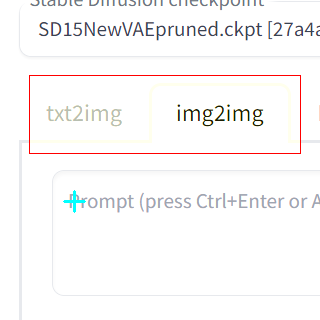

In [50]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
time.sleep(5)
s = step(
    '''gASV8/cAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRNDwFLToaUTkK29wAA/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pz88/T27O7x6Ont5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr6Ont7O7x8/T2/Pz8/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pz87u/y5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr7u/y/Pz8////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9fb35efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr9fb3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8/T25efr5efr5efr5efr7e7x9fb4/Pz9/v7+/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////v7+/Pz99fb47e7x5efr5efr5efr5efr8/T2////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9fb35efr5efr5efr6uzv+Pn6////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Pn66uzv5efr5efr5efr9fb3/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pz85efr5efr5efr7e7x/v7+/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////v7+7e7x5efr5efr5efr/Pz8////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7u/y5efr5efr6uzv/v7+/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////v7+6uzv5efr5efr7u/y/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pz85efr5efr5efr+Pn6////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+Pn65efr5efr5efr/Pz8////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8/T25efr5efr7e7x////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7e7x5efr5efr8/T2////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////7O7x5efr5efr9fb4////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9fb45efr5efr7O7x////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////6Ont5efr5efr/Pz9/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////Pz95efr5efr6Ont////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/v7+/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////v7+5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////zt1cLEucLY7/z/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr//////////////////////////////////////////////////////////////////////////////////////////////////////PWrZKMlK7W9///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////99etlIqUrdf3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8+eXdzMLEubrEucLR3+X3/////////////////////9bBnKOvnKOvudb/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////56paAAAAAABaref/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////79e9pZKMjIqMlKa91uv////////////////////nrV0AAAAAAF2t5///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////////////////9K+nKOvttP/////////////////////////////////////////////////////////////6cO3nKO3xub///////////////////nlzLO0nKOvnKOvnKOvnKOvnKOvornY8vz///////////////XbvKmvnKnE3PX/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OtYywhKWWt5////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+/OlFUhAAAAAAAAAAAAAAAAAAAhY6be////////////////565jKSQpY67n////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////7MW3nKOvttP/////////////////////////////////////////////////////////////2bevnKO3xub///////////////jgv6qvnKOvrL3b6fb8///8+eXWuaqvnKOvqcbq////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+e1czgAABhCe67W7/v/////78+lazgAAAA5hMv3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////7MW3nKOvttP/////////////////////////////////////////////////////////////2bevnKO3xub////////////////88tLGv9Ly/////////////////+zOrKOvnKnJ5f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////3qaMpd///////////////////8+MMQAAAHW99///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////8tXJubrEr6qvnKOvpbHEubrEubrEwtXw/N3RvLrEucXd9v///////////////+PTv7rEucPb3srEubq+rKevnKOxqbbEubrEubrEz+D////////////////////////////////oxqyvnKPB2f/////////////lz7rEubrR5f///////////+7bwrrEwtXw///14sfBrKevnKOvn6y+xtz1///////67NDErKevnKOvn6q+xtvy///////////////////////67NDGr6yxnKOvnKaxrLTEubrEubrEubrEwtXw////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+/GnIqMjJ7G7////////////+/GnIqMnMfv///31q6EYzghAAAhOVVzpdf3////////576MYzghAAAYKU1zpdPv//////////////////////vnvZJrUjghAAAYKUFjc4qMjIqMjIqMjIqcxu/////////////////////////////////GewAAAFWl5///////////78ecjIqMnMfv////////////78ecjIqcxu////PWrYJjOSQAACQ5UnWl1vP///////vnvYpjOSQAABgpSnWl1u////////////////////////vnvZJrUjghAAAYKUFjc4qMjIqMjIqMjIqcxu//////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////7MW3nKOvnKOvnKOvnKOvnKOvnKOvqcXq///qya2vnKOxudb3///////////wzLCvnKO0wt/82bevnKOvnKOvnKOvnKOvnKOvnKOvttP////////////////////////////////oxqyvnKPB2f/////////////YtqOvnKPB2f///////////+bLqaOvpcLWya+vnKOxoqm0oqevnKOvnKO3yePy1bm0nKOvn6m0oqevnKOvnKO0wt/8///////////////12bexnKOvnKy+v8XLwra5oqOvnKOvn6e0oqm0r8nq////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAUp69rWEhABgpQkVCQjghAAAAABhard/vxoZCGAAhOUVCQjghAAAAAABKnNv///////////////PGhDgAAAAhUnWUpaace2VCGAAAABgpQkVCQkVztef////////////////////////////////GewAAAFWl5///////////56ZSAAAAUqbn////////////56ZSAABSnL6tYyQAGCxCQkVCOSQAAAAAGF2t3u/GhEEYACQ5QkVCOSQAAAAAAEmc3v////////////////PGhDgAAAAhUnWUpaace2VCGAAAABgpQkVCQkVztef/////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP//////////////////+PLqaOvnKrJ5fz/////+dPBn6Ovorzd///////////qxqyvnKO3xub//////////////////////////////////////////+zOrKOvnKzL7P/////////////YtqOvnKPB2f///////////+bLqaOvnKOvnK/J3+/8///////11baxnKOvnKOvnKrE3O/8///////64r+0nKOvnLfY/////////////9jEn6OvnLPT8vz/////////9tPBoqOvpcLl////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAAAAIWGc1u/////////3xn0xAAAAGBgYGE2Mzu//////////1pZKAAAAGILG////////////zooxAAAYc7bv///////////3xoI5AABKnNv//////////////////////////////////////8+MMQAAGILG////////////56ZSAAAAUqbn////////////56ZSAAAAAAAhY57W7/////////PGezAAAAAYGBgYSo7O7/////////vWlEkAAAAYhMf/////////////zooxAAAYc7bv///////////3xoI5AABKnNv/////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP////////////////////86cO3nKOvqcXq//zjwqqvnKa+1fL////////////qxqyvnKO3xub////////////////////////////////////////837yxnKOvrMrw///////////////YtqOvnKPB2f///////////+bLqaOvnKnG4vz//////////////9/JoqOvnKnG3/n//////////////+PLpaOvnKzL7P//////////37yxnKOvttL8///////////////oxqyvnKbE3///////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAEWU1v///////////////9ucQgAAAEWU1vv//////////////9+lUgAAAFWl5//////////OjDAAAAB7xv///////////////9+lUgAAMY7O///////////////////////////////////vtWkYAAA5jM//////////////56ZSAAAAUqbn////////////56ZSAAAAQpbW////////////////3ppCAAAAQpLW////////////////3qJSAAAAUqbn///////////OjDAAAAB7xv///////////////9+lUgAAMY7O////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP///////////////////////zjwqqvnKO8yce8nKOvss31///////////////qxqyvnKO3xub//////////////////////////////////////9/JpaOvnKrJ5fz////////////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P////////////////zYtqOvnKzL7P//////////2bevnKOvttP////////////////qxqyvnKPB2f//////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GewAAAFWl5//////////GhAAAAACExv///////////////+OlUgAAAILG////////////////////////////////97pzGAAAGHW99///////////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8N7AAAAUqbn///////////GhAAAAACExv///////////////+OlUgAAAILG////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP//////////////////////////9nEoqOvnKOvnLDR7//////////////////qxqyvnKO3xub///////////////////////////////////LYtqevnKO3xuP8///////////////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P//////////8sq5nKOvpcLl//////////////LTsqOvnKzL7P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5//////////vtWkAAABKnNv/////////////97pzGAAAUqbn/////////////////////////////9+lWhgAADiExvP/////////////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn///////////vtWkAAABKnNv/////////////97pzGAAAUqbn////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP/////////////////////////9s28nKOvnKOvn7fY+f/////////////////qxqyvnKO3xub///////////////////////////////zoxq2vnKOvr8zw///////////////////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P////////////zoxqyvnKO0udDo+fz//Ozdwq+vnKOxttP1////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5////////////9+lUgAAGE2EveP3////78+cYyQAADiExvP///////////////////////////PGhDgAABhClM//////////////////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn/////////////9+lUgAAGE2EveP3////78+cYyQAADiExvP/////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP///////////////////////LYtqavnK3JwrOvnKOxudb3///////////////qxqyvnKO3xub///////////////////////////zoxq2vnKOvqcXo///////////////////////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P//////////////9tXBoqOvnKOvnKOvnKOvnKS0ts3t////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5//////////////3xoI5AAAAAAAAAAAAAAAAIUmEvev///////////////////////////PGhDgAAAA5hMf3////////////////////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn///////////////3xoI5AAAAAAAAAAAAAAAAIUmEvev/////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////2bevnKOvttP////////////////////33LmxnKO0wt/8/+zRrKOvnKfE3/z////////////qxqyvnKO3xub///////////////////////zozLGxnKOvorfY9v/////////////////////////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P///////////+zRrKOvqcPo/Pby8u7w8u7y+fz/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5///////////77JrGABSpd//9+/v7+/v7+/3//////////////////////////////POjE0YAAAYWqbe////////////////////////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn////////////77JrGABSpd//9+/v7+/v7+/3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////37yxnKOvrMrw/////////////////9nEoqOvn7fY+f//////7Ma3nKOvorzd///////////wzLCvnKOxvNn///////////////////zt0rSxnKOvorTT7/z////////////////////////////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P///////////M++nKOxvNn/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5///////////vXkAADCMzv////////////////////////////////////////PWnF0YAAAYWprW9///////////////////////////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn////////////vXkAADCMzv//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////+c++nKOvnKe8wszW1dDRzNXw//zjwqqvnKO5zOz///////////zoxqyvnKO0wt/8////////5cK0nKOvnKrBzNDW1czL0uD////w0rSxnKOvnKO0rLnEubq+r6y0oqm0oqm0oqm0orPR7//////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P///////////+DJpaOvnKm5ucXT1dDW1dDW1dDW1dDb4uj1/P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5///////////3p5KAAAYQmWMpba9vb69vb69vb69vcfW5/P///////////fenF0YAAAAAChSc4qMjIpzY0VCQkVCQkVCQkVCQpLO////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn////////////3p5KAAAYQmWMpba9vb69vb69vb69vcfW5/P/////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////12bm0nKOvnKOvnKOvnLTU58O3nKOvqcPo/////////////////9/JpaOvnKrJ5fz///////zoya+vnKOvnKOvnKOvpcLl///YtqOvnKOvnKOvnKOvnKOvnKOvnKOvnKOvnKOvnKzL7P/////////YtqOvnKPB2f///////////+bLqaOvnKzL7P///////////////+bLqaOvnKzL7P/////////////////YtqOvnKzL7P/////////////64r+0nKOvnKOvnKOvnKOvnKOvnKOvnKOvnKrE3PL/////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////+OlUgAAAFWl5////////////+OlUgAAAFWl5////////////////+OlUgAAAFWl5//////////////////GhAAAAFWl5/////////////vWlE0AAAAAAAAAAAAAAAAAAAAAAAAAAAAYSo7O9////+OlUgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAILG////////56ZSAAAAUqbn////////////56ZSAAAAUqbn////////////////56ZSAAAAUqbn/////////////////8eEAAAAUqbn//////////////vWlE0AAAAAAAAAAAAAAAAAAAAAAAAAAAAYSo7O9///////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////PPw8u7w8u71/P/////////////////////////////////////////////////////////8+fHw8u7w8vH3////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9tPBoqOxttP1/PPw8u7w8u7w8u7w7N3WvK2vnKOvpcLl////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////3xoI5ADiExvP/9+/v7+/v7+/v7+/n1r6UWhgAAABKnNv////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////3xoI5ADiExvP/9+/v7+/v7+/v7+/n1r6UWhgAAABKnNv/////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////dvKavnLPT+f///////////////////////9PBnKOvnLfY////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8+MMQAAc7r3////////////////////////xoIAAAAAhMf//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////8+MMQAAc7r3////////////////////////xoIAAAAAhMf/////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////XTsqOvnLPT9v/////////////////////85cC0nKOvr8zw////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////97pzAAAAa7b3///////////////////////enEkAABhrte//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////97pzAAAAa7b3///////////////////////enEkAABhrte//////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////wzLCvnKOvpbnW6fP6/////////PPl1bq3nKOvnK/O6fz/////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+u1axgAABhKhL7e9/v/////////99+9jFUhAAAhY6re/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+u1axgAABhKhL7e9/v/////////99+9jFUhAAAhY6re////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////LgxrS0nKOvnKOvnKOvnKOvnKOvnKS0ssXg8vz/////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////99elc0khAAAAAAAAAAAAAAAAAAAAIUlzpdPv////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////99elc0khAAAAAAAAAAAAAAAAAAAAIUlzpdPv////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////by7N3b1dDW1dDd6e71/P//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9+/n1se9vb69vc/e7/P/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////9+/n1se9vb69vc/e7/P/////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr////////////////////////////////////5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr5efr////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////lGViSy5Lf4aUhpQu''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=3, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    gui.hotkey(os_ctrl(),'c')                # Keypress events
    gui.hotkey('delete')
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow
    
r['description'] = pyperclip.paste()

found: [(87, 406)]


In [92]:
pr.value = 85
pr.description = "progress 95%"

Back to instagram

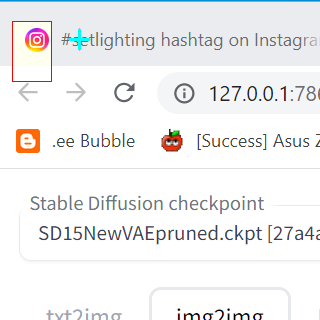

In [99]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
try:
    # If the Jupyter is active then You are running the script step by step in workflow file, 
    # therefore px will not be initalized and we dont have to wait full second to try the alternative image
    test = px
    
    # Step image if the Chrome is active
    s = step(
        '''gASVqBsAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLJ0s8hpROQmwbAADo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n6O3o6u3o6u3Pv++rf+6MQ+p+GuV8B+CHBt6cGN+zP+HOfubfvuno6u3o6u3o6Ozo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n6e3o6u3Qwe+bYPVzFvN4CvV8B+eDBN6OA9maAtenAdm0ANzDAOPHCtrYWd7kwOjo6u3o6e3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n6e3o6u26lPOAJf1+Ev9/Eu6JD+WRCd2bBdWnA9K0AtC/AtHIA9PPBtTUBNTmAt/jFdTmkN/o6u3o6e3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n6e3o6u20g/SBFf+DFfmIDe6KAeKYANmnAdG0AcnAAMTLAMTUAcfaAcjdAMfiAsfmBsnrAcruAMbpf9bo6u3o6e3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3m6O3o6u3El/SNF/+NGPeOC+2mM+nMgO3fovDlqu3qq+vurOvxq+vzqur0p+v1n+rzeeDwI8nvA7vxAbv1ALbqk9To6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3cwvCnKPqgGviaDuzAY+/47f3//Pz41vL3xev5wuj6wOj8wOn8wen+w+v+0u//+fz+6vr5Ucv2A6z7Aqv1FKjrwd7o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n5uzNZfLEHf2xFOq9O+j57/zuu+3MHMLTBrHfBafoBaHwAJ31AKD5AKX6AKf7Caz8IrT+uOX+6/f8I676Bpv/AZ3wW7Lo5+vo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3lwOzcJu/SIerECdrhiOn++/zPILvVCafiD53rBY/yAIf5EpP9Dpb9AI79AJb+qd/+tuT9Iaj/+v39dsX9Aob+B436Donqv9jo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3phOXxHeTfIdPWEcXwqun31u3ZE5ziFpDqDIH0M5P8stj+3e/+3e/9rNr8IJr9g8X+otT+B47+1u3/ms7+AXz9BoH/AH7wf7bo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3yT8/0H8PpILXhGaX0tOD2x9/jGn7pFHHzPIX96PH/6vD9lb39lb/+7PP+4vD9IJD8AH39AH7+yOP+pM/9AHT9Anf+AXX0QpPo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u36L6f2IZnvI43qIX/3utX3xdXpIWDvFFP7usz/6u/9Lm39Blr9AV/9KH3+7PP+q9D9AGz+AHT+w97+p87+AW79AnH9AHD4Gn3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u39Jnr4J3D1K2jvJ1v4vcv5xs3uJkT0NFL+5Ob+nbD8E0b+Jlz+ImH8BVb9nL793ur9EG79AGj+w9z+p839AGr/A3H8AHL8CHno6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3+LFn7L1D5NEr0MT77wMT6yMjzMTH3P0L95Ob9oqr8Hzj+L1H+LFb8EEn9oLn+3+n8F2T8BV/9xdr+qM39AGn+A3b9AHv9CIXo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u38Q07+ODr7PDX3PCz8xL37zcX1QSX6Nx7+xL3+7O39S0z9KDL9Izj9QV7+7fD+s8T9DE39EVv+x9n9qc39AW3+AX3/AIn8Gpvo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u34Z13/RCr7SSX5Rxj7xbT81MX5Txj7TBn9akT+7un+7e79qan9qKz+7vD+5+n+RWL+HUz8GVX9ztr9p8z8AHL+A4j/AZz5Qrjo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3zm4j/URn8WBj8UQX+wqX+49T8Xgr8YRX9WhT9dD/+y7j+6eH+6OH+w7v9V1b+MT39L0r9IU/+3+P/ocf+AXb+DZb/Aa/yf9Lo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3rzL/9YhP+Zgv+XgL9s3z//fv9eRL8bQD+cRD+aQ/9Xg79aCv9YjD9SSD+SC7+RTv8Mzv+QVr///z9hbT+B3r/FaL+FLjswOTo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3n5+n1lVf/dgH+dQX9kin99u7+2rb9jBH9ggD9gQj9fQ/9dBL9bBf9ZiH9XSf9UC39VEn+zM797fL9RoP+H4f/GLH1ZMvo5+zo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3r08D9hRH/iQL+iAP+t1b++Ov//P3+69f948f+4MX+38f+3cn+28r928/+49///f7+8O/+e4z+LWj/K5H8L63sxOTo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6ezo6u3vw5D/lwD/ngL+ngP9sSb90Xj/353+4ab+4aj+4Kn+3av+2a3+1K3/y6n9ro79bFj+Q0z+Pmz+MYzwotHo6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6u3yxnz/rAD/sgH+sQb+rQL9rgD+sAH+rQH9pgD9nwD9lwX9iQv9eA/9ZBj+YDX/Vkz/RmXxmbro6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6uzo6u3x1ZD8wBT/ygL+wAT+wQb+vwP+vQL+uAL/swH9qQX+ng7+khr9gCP/dTL9alLwrrTo6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6ezo6u3r4cD20Vj9yQr/0QD/ygD/xgD+wQD9vAD/tQD/rAT/oQ79jSP1onTs083o6u3o6ezo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6evo6u3o6u3s47/z3X751UD8zxn+yQX+xQX8whn4wEDxyYPs2cTo6u3o6u3o6Ovo6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3o6u3///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLREsThpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )
except:
    # Step image if Jupyter is active
    s = step(
        '''gASVRBYAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLKEsvhpROQggWAADe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd3+be4ebe4ebHt+mmeuuJQOl9GeR8B+CHBt6bF9+wPN/IeeLXtuPe4ebe4ebe3+Xe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd4Obe4ebIuemXXfNzFfJ4CvV8B+eDBN6OA9maAtenAdm0ANzDAOPHCtnUVtzbueLe4ebe4Obe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd4Obe4ea0j++AJPx+Ev9/Eu6JD+WRCd2bBdWnA9K0AtC/AtHIA9PPBtTUBNTmAt/iFdPgitre4ebe4Obe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd4Obe4eavfvCBFf+DFfmIDe6KAeKYANmnAdG0AcnAAMTLAMTUAcfaAcjdAMfiAsfmBsnrAcruAMbke9Le4ebe4Obe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebc3+be4ea+kvCNF/+NGPeOC+2mM+nMgO3fovDlqu3qq+vurOvxq+vzqur0p+v1n+rzeeDwI8nvA7vxAbv1ALbkjc/e4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebUuuqmJ/qgGviaDuzAY+/47f3//Pz41vL3xev5wuj6wOj8wOn8wen+w+v+0u//+fz+6vr5Ucv2A6z7Aqv1E6fiutje4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd3eXJYu/EHf2xFOq9O+j57/zuu+3MHMLTBrHfBafoBaHwAJ31AKD5AKX6AKf7Caz8IrT+uOX+6/f8I676Bpv/AZ3sV6/e3uTe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebduefcJu/SIerECdrhiOn++/zPILvVCafiD53rBY/yAIf5EpP9Dpb9AI79AJb+qd/+tuT9Iaj/+v39dsX9Aob+B435DoniuNLe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebkgOHxHeTfIdPWEcXwqun31u3ZE5ziFpDqDIH0M5P8stj+3e/+3e/9rNr8IJr9g8X+otT+B47+1u3/ms7+AXz9BoH/AH7re7Le4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebwTc30H8PpILXhGaX0tOD2x9/jGn7pFHHzPIX96PH/6vD9lb39lb/+7PP+4vD9IJD8AH39AH7+yOP+pM/9AHT9Anf+AXXxQJHe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eb6Lqb2IZnvI43qIX/3utX3xdXpIWDvFFP7usz/6u/9Lm39Blr9AV/9KH3+7PP+q9D9AGz+AHT+w97+p87+AW79AnH9AHD3GX3e4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eb9Jnr4J3D1K2jvJ1v4vcv5xs3uJkT0NFL+5Ob+nbD8E0b+Jlz+ImH8BVb9nL793ur9EG79AGj+w9z+p839AGr/A3H8AHL7B3ne4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eb+LFn7L1D5NEr0MT77wMT6yMjzMTH3P0L95Ob9oqr8Hzj+L1H+LFb8EEn9oLn+3+n8F2T8BV/9xdr+qM39AGn+A3b9AHv8B4Xe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eb8Qk3+ODr7PDX3PCz8xL37zcX1QSX6Nx7+xL3+7O39S0z9KDL9Izj9QV7+7fD+s8T9DE39EVv+x9n9qc39AW3+AX3/AIn7GZve4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eb2ZVv/RCr7SSX5Rxj7xbT81MX5Txj7TBn9akT+7un+7e79qan9qKz+7vD+5+n+RWL+HUz8GVX9ztr9p8z8AHL+A4j/AZz2QLbe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebuloT/URn8WBj8UQX+wqX+49T8Xgr8YRX9WhT9dD/+y7j+6eH+6OH+w7v9V1b+MT39L0r9IU/+3+P/ocf+AXb+DZb/Aa/te87e4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebjxbr9YhP+Zgv+XgL9s3z//fv9eRL8bQD+cRD+aQ/9Xg79aCv9YjD9SSD+SC7+RTv8Mzv+QVr///z9hbT+B3r/FaL9E7jjud7e4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebd3uLxklT/dgH+dQX9kin99u7+2rb9jBH9ggD9gQj9fQ/9dBL9bBf9ZiH9XSf9UC39VEn+zM797fL9RoP+H4f/GLHxYMje3uXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebjy7r8hBH/iQL+iAP+t1b++Ov//P3+69f948f+4MX+38f+3cn+28r928/+49///f7+8O/+e4z+LWj/K5H8Lqzjvd7e4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OXe4ebpvoz/lwD/ngL+ngP9sSb90Xj/353+4ab+4aj+4Kn+3av+2a3+1K3/y6n9ro79bFj+Q0z+Pmz+MYzqnc3e4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4ebtwXn/rAD/sgH+sQb+rQL9rgD+sAH+rQH9pgD9nwD9lwX9iQv9eA/9ZBj+YDX/Vkz/RmXslLbe4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eXe4ebr0Iz8vxP/ygL+wAT+wQb+vwP+vQL+uAL/swH9qQX+ng7+khr9gCP/dTL8alHpqK/e4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OXe4ebj2bryzlb9yAn/0QD/ygD/xgD+wQD9vAD/tQD/rAT/oQ79jSLxnnHjzMfe4ebe4OXe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4OTe4ebe4ebk27nt2Hv20z77zhn+yQX+xQX7wRn1vj7sxH/k0b7e4ebe4ebe3+Te4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4ebe4eb///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////+UZWJLQ0sShpSGlC4=''',
        tries = 3,
        timer = 1,
        gate = 1,
        bbox = None,
    )    
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(92, 40)]


In [92]:
pr.value = 100
pr.description = "progress 100%"